# ***NOTEBOOK FOR ANALYSING THE `SYNTHEA` DATA***

- ***GOAL IS TO FIND STRONG REASONS BEHIND PATIENTS READMISSION***

## **Starting of Analysis**

### **Data Import, Creating Connection and Checking the data**

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis"))

import src.plots as P
import src.stat_tests as S

plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\my-personal-projects\synthea readmission analysis\data\processed_data\processed_synthea_data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

encounter_start encounterclass  base_encounter_cost  payer_coverage  \
0  2010-11-09 15:06:37       WELLNESS               129.16          129.16   
1  2011-11-15 15:06:37       WELLNESS               129.16          129.16   
2  2012-08-03 15:06:37     AMBULATORY               129.16           54.16   
3  2012-10-14 15:06:37     AMBULATORY               129.16           54.16   
4  2012-11-20 15:06:37       WELLNESS               129.16          129.16   

   duration  total_procedures  avg_procedure_cost  total_medicines  \
0  same_day                 1              648.01                0   
1  same_day                 0                0.00                0   
2  same_day                 1             2230.40                0   
3  same_day                 0                0.00                1   
4  same_day                 1              590.58                0   

   avg_base_medicine_cost  avg_total_medicine_cost  reasons_for_medications  \
0                    0.00                     0.00                        0   
1                    0.00                     0.00                        0   
2                    0.00                     0.00                        0   
3                   20.48                    20.48                        1   
4                    0.00                     0.00                        0   

   is_ongoing_condition  total_conditions  is_ongoing_careplan  \
0                    -1                 0                   -1   
1                    -1                 0                   -1   
2                     0                 1                   -1   
3                     0                 1                   -1   
4                    -1                 0                   -1   

   total_careplans  age_as_2022  marital   race    ethnicity patient_gender  \
0                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
1                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
2                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
3                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
4                0           18  UNKNOWN  WHITE  NONHISPANIC              M   

  provider_gender  utilization  caused_readmission condition_duration  \
0               M           25                   0                NaN   
1               M           25                   0                NaN   
2               M         1616                   0             8 days   
3               M         1616                   0            11 days   
4               M           25                   0                NaN   

  careplan_duration  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   encounter_start          53346 non-null  object 
 1   encounterclass           53346 non-null  object 
 2   base_encounter_cost      53346 non-null  float64
 3   payer_coverage           53346 non-null  float64
 4   duration                 53346 non-null  object 
 5   total_procedures         53346 non-null  int64  
 6   avg_procedure_cost       53346 non-null  float64
 7   total_medicines          53346 non-null  int64  
 8   avg_base_medicine_cost   53346 non-null  float64
 9   avg_total_medicine_cost  53346 non-null  float64
 10  reasons_for_medications  53346 non-null  int64  
 11  is_ongoing_condition     53346 non-null  int64  
 12  total_conditions         53346 non-null  int64  
 13  is_ongoing_careplan      53346 non-null  int64  
 14  total_careplans       

In [6]:
data.head()

encounter_start encounterclass  base_encounter_cost  payer_coverage  \
0  2010-11-09 15:06:37       WELLNESS               129.16          129.16   
1  2011-11-15 15:06:37       WELLNESS               129.16          129.16   
2  2012-08-03 15:06:37     AMBULATORY               129.16           54.16   
3  2012-10-14 15:06:37     AMBULATORY               129.16           54.16   
4  2012-11-20 15:06:37       WELLNESS               129.16          129.16   

   duration  total_procedures  avg_procedure_cost  total_medicines  \
0  same_day                 1              648.01                0   
1  same_day                 0                0.00                0   
2  same_day                 1             2230.40                0   
3  same_day                 0                0.00                1   
4  same_day                 1              590.58                0   

   avg_base_medicine_cost  avg_total_medicine_cost  reasons_for_medications  \
0                    0.00                     0.00                        0   
1                    0.00                     0.00                        0   
2                    0.00                     0.00                        0   
3                   20.48                    20.48                        1   
4                    0.00                     0.00                        0   

   is_ongoing_condition  total_conditions  is_ongoing_careplan  \
0                    -1                 0                   -1   
1                    -1                 0                   -1   
2                     0                 1                   -1   
3                     0                 1                   -1   
4                    -1                 0                   -1   

   total_careplans  age_as_2022  marital   race    ethnicity patient_gender  \
0                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
1                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
2                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
3                0           18  UNKNOWN  WHITE  NONHISPANIC              M   
4                0           18  UNKNOWN  WHITE  NONHISPANIC              M   

  provider_gender  utilization  caused_readmission condition_duration  \
0               M           25                   0                NaN   
1               M           25                   0                NaN   
2               M         1616                   0             8 days   
3               M         1616                   0            11 days   
4               M           25                   0                NaN   

  careplan_duration  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [7]:
data['condition_duration']= data['condition_duration'].str.replace(' days',"").astype('Int64')

In [8]:
data['careplan_duration']= data['careplan_duration'].str.replace(' days',"").astype('Int64')

In [9]:
data[['careplan_duration','condition_duration']] = data[['careplan_duration','condition_duration']].fillna(0)

In [10]:
data.shape

(53346, 25)

In [12]:
data.describe().round(2).T

count     mean      std    min     25%     50%  \
base_encounter_cost      53346.0   128.75     4.58  77.49  129.16  129.16   
payer_coverage           53346.0     62.0    43.61    0.0   17.49   69.16   
total_procedures         53346.0     0.66      1.7    0.0     0.0     0.0   
avg_procedure_cost       53346.0  2129.45  5596.18    0.0     0.0     0.0   
total_medicines          53346.0      0.8      1.2    0.0     0.0     1.0   
avg_base_medicine_cost   53346.0   162.61   406.75    0.0     0.0     6.8   
avg_total_medicine_cost  53346.0  1431.68  9931.92    0.0     0.0    7.22   
reasons_for_medications  53346.0      0.5     0.61    0.0     0.0     0.0   
is_ongoing_condition     53346.0     -0.8     0.53   -1.0    -1.0    -1.0   
total_conditions         53346.0     0.16     0.41    0.0     0.0     0.0   
is_ongoing_careplan      53346.0    -0.91     0.38   -1.0    -1.0    -1.0   
total_careplans          53346.0     0.07     0.25    0.0     0.0     0.0   
age_as_2022              53346.0    55.66    25.87    0.0    35.0    58.0   
utilization              53346.0   1329.7  1427.73    1.0    86.0   821.0   
caused_readmission       53346.0     0.39     0.49    0.0     0.0     0.0   
condition_duration       53346.0     7.46   156.34    0.0     0.0     0.0   
careplan_duration        53346.0     7.07   117.48    0.0     0.0     0.0   

                             75%         max  
base_encounter_cost       129.16      129.16  
payer_coverage             89.16      129.16  
total_procedures             1.0        21.0  
avg_procedure_cost        602.04   187968.69  
total_medicines              1.0        10.0  
avg_base_medicine_cost    263.49     6901.17  
avg_total_medicine_cost  1783.74  1296594.95  
reasons_for_medications      1.0         4.0  
is_ongoing_condition        -1.0         1.0  
total_conditions             0.0         7.0  
is_ongoing_careplan         -1.0         1.0  
total_careplans              0.0         2.0  
age_as_2022                 73.0       112.0  
utilization               2159.0      4828.0  
caused_readmission           1.0         1.0  
condition_duration           0.0     17946.0  
careplan_duration            0.0     10203.0

### ***Outlier Interpretation from numerical columns***

- **max value of `avg_procedure_cost` is very high**

- **max value of `average_total_medicine_cost` is too high**

- **`utilization` column is spreaded from 1 to 4828**

- **`age` column have values from 0 to 112 as of 2022**

- **max value in `condition_duration` is too high**

- **max value for `careplan_duration` is also very high**

In [13]:
data.describe(include='object').T

count unique                  top   freq
encounter_start  53346  50029  1973-07-27 23:35:03      7
encounterclass   53346      6             WELLNESS  19106
duration         53346      4             same_day  51759
marital          53346      3              MARRIED  30413
race             53346      5                WHITE  41794
ethnicity        53346      2          NONHISPANIC  49267
patient_gender   53346      2                    F  26891
provider_gender  53346      2                    F  31135

### ***Statistical insights from categorical columns***

- **max `encounter` in single day is 7**

- **`encounter_class` have 6 uniqe values, wellness being most frequent**

- **`duration` column have 4 unique values, same_day being the most frequent**

## **Univariate Analysis**

**encounter_class**

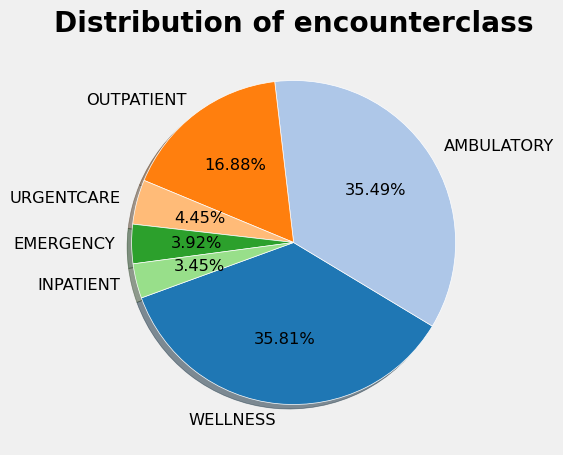

In [17]:
plt.figure(figsize=(5,5))
P.plot_pie(column='encounterclass',data = data)
plt.show()

- **nearly 70% of observations are from wellness and ambulatory class**

**base_encounter_cost**

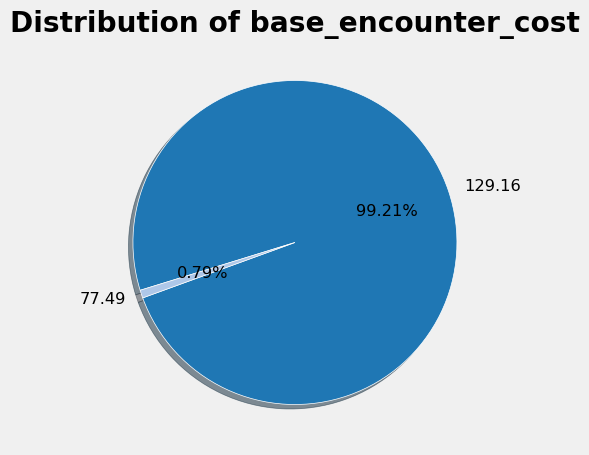

In [18]:
plt.figure(figsize=(5,5))
P.plot_pie(column='base_encounter_cost',data = data)
plt.show()

In [121]:
data['base_encounter_cost']=data['base_encounter_cost'].astype('object')

***
- **only `2 types` of cost is associated with `encounters`, and more than `99%` of them being `129.16`**
***

**payer_coverage**

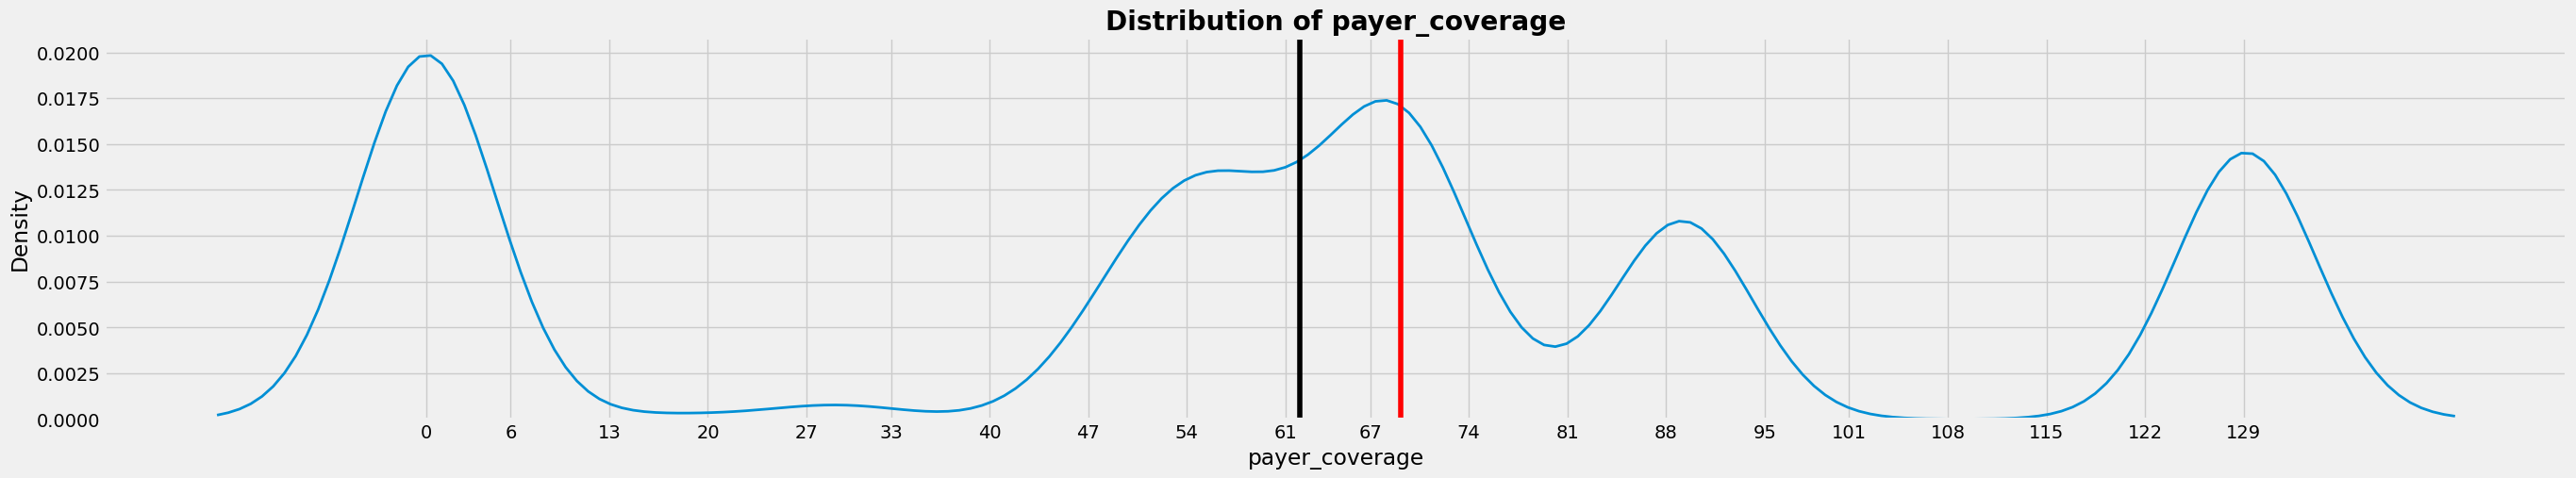

In [22]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'payer_coverage',data= data,line_val=.50)
plt.axvline(data['payer_coverage'].mean(),color = 'black')
plt.show()

- **there is peak in both the end as well as in the middle**

**duration**

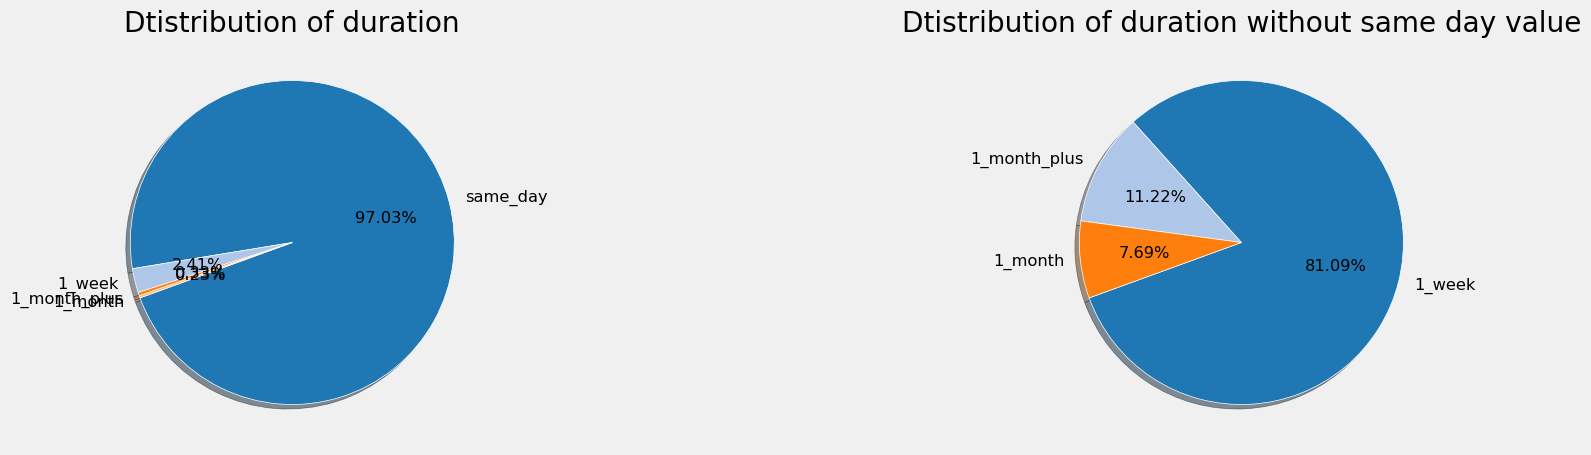

In [29]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
P.plot_pie(column='duration',data = data)
plt.title('Dtistribution of duration')
plt.subplot(1,2,2)
P.plot_pie(column='duration',data = data[data['duration'] != 'same_day'])
plt.title('Dtistribution of duration without same day value')
plt.show()

***
- **more than `97%` of encounter have `same day duration`, and among other duration category `1 week` is most frequent**
***

**total_procedures**

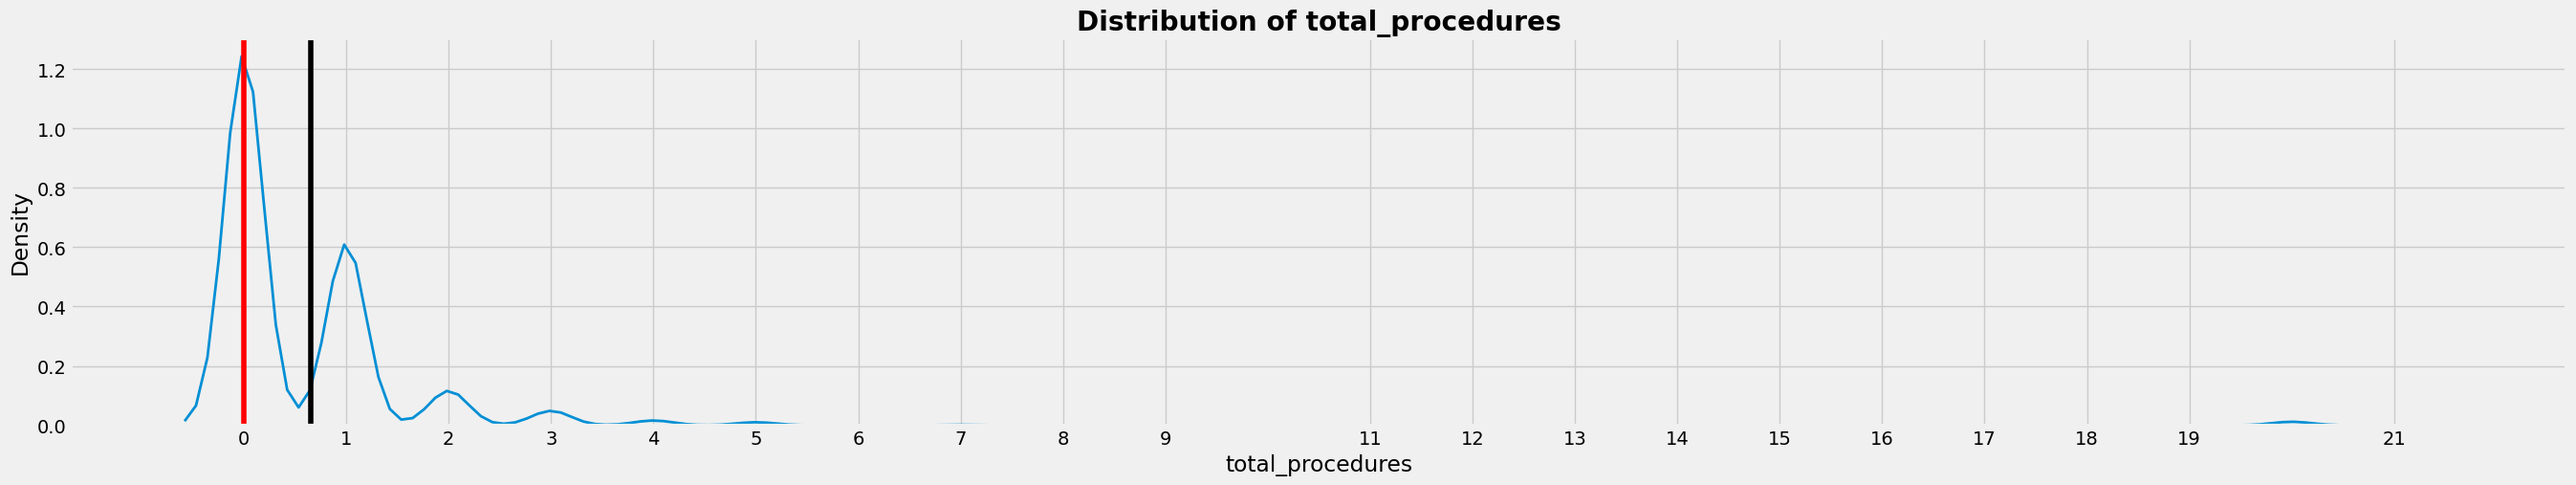

In [30]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_procedures',data= data,line_val=.50)
plt.axvline(data['total_procedures'].mean(),color = 'black')
plt.show()

In [32]:
data.groupby('total_procedures').size()

total_procedures
0     32274
1     15787
2      3000
3      1255
4       415
5       264
6         2
7        42
20      306
21        1
dtype: int64

In [33]:
data['total_procedures']=data['total_procedures'].apply(lambda x: '5+' if x>5 else str(x))

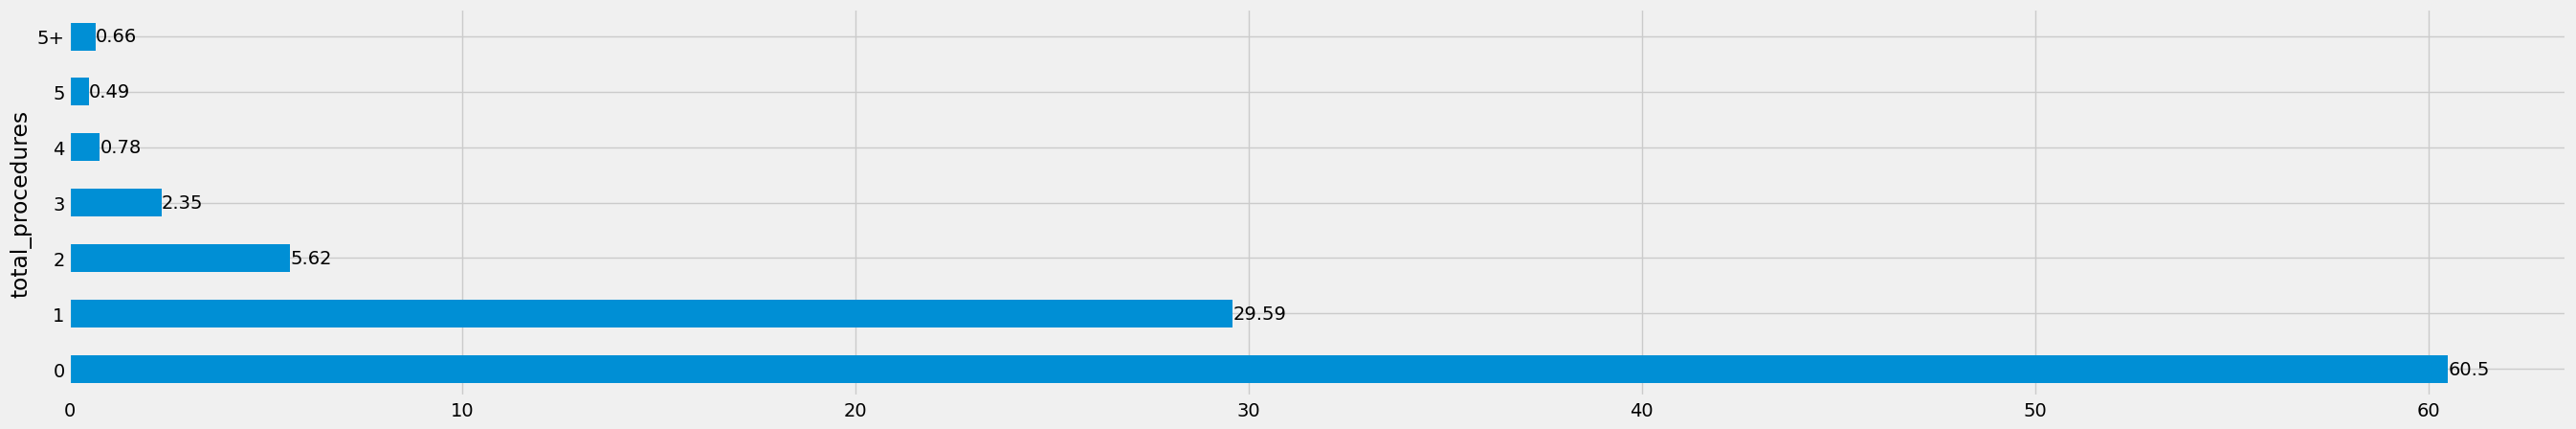

In [34]:
plt.figure(figsize=(30,5))
ax = data.groupby('total_procedures').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **`60%` of encounter do not included with any kind of `procedures`**
***

**avg_procedure_cost**

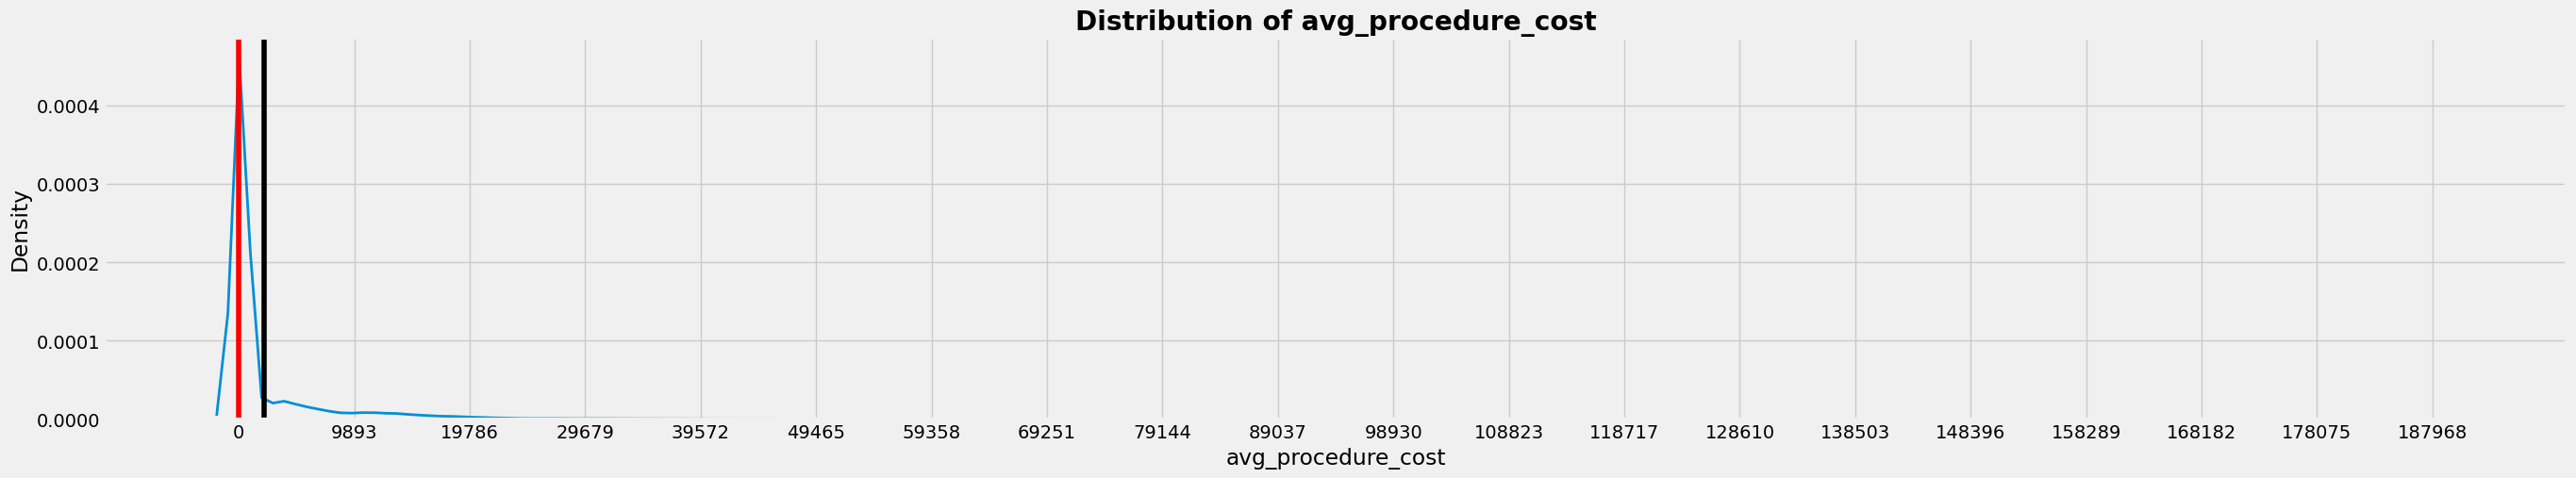

In [39]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_procedure_cost',data= data,line_val=.50)
plt.axvline(data['avg_procedure_cost'].mean(),color = 'black')
plt.show()

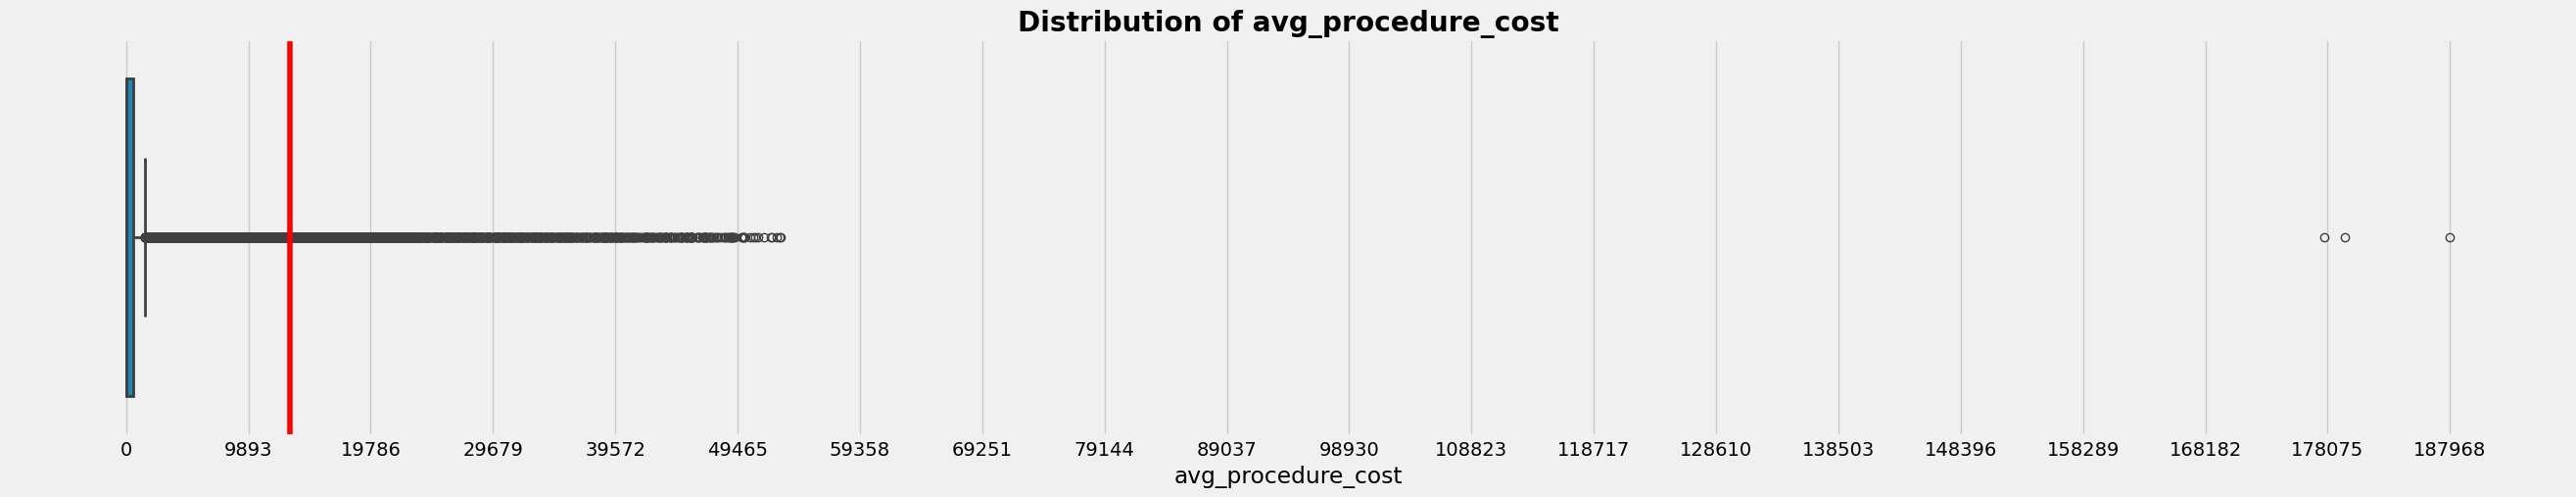

In [40]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_procedure_cost',data= data)
plt.show()

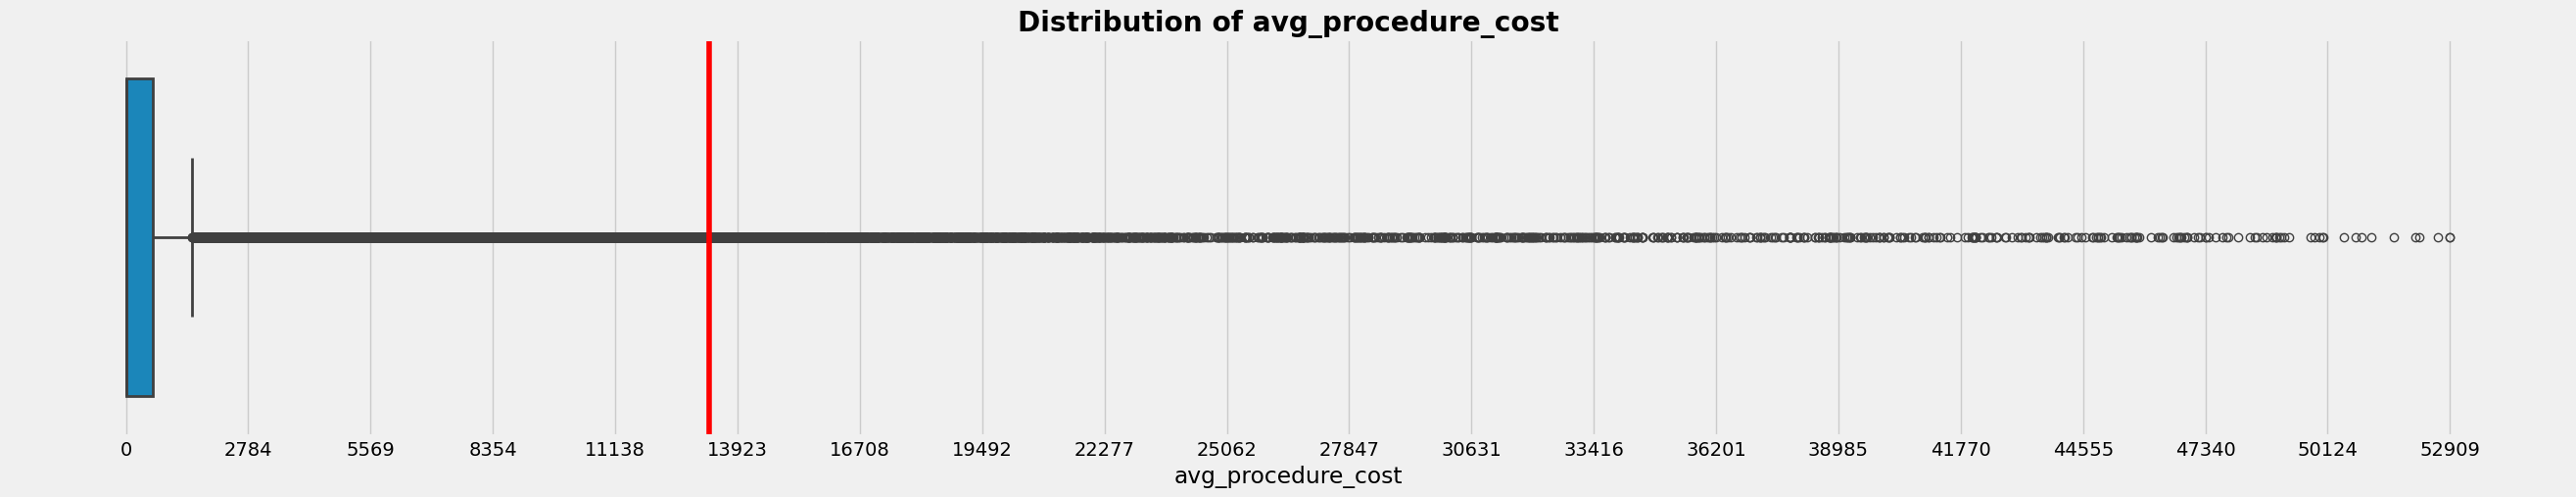

In [42]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_procedure_cost',data= data[data['avg_procedure_cost'] < 100000])
plt.show()

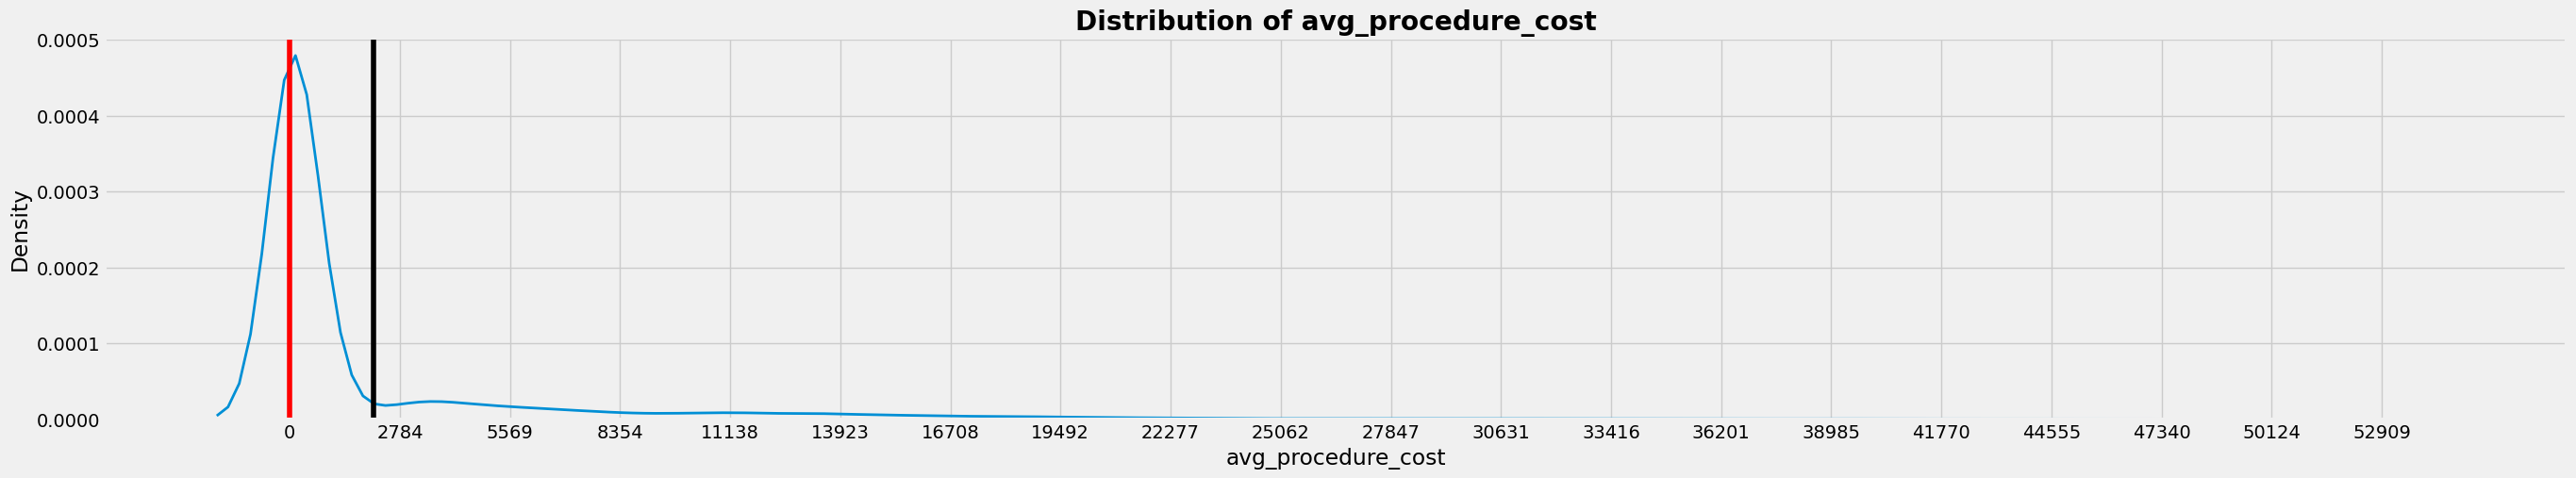

In [43]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_procedure_cost',data= data[data['avg_procedure_cost'] < 100000],line_val=.50)
plt.axvline(data[data['avg_procedure_cost'] < 100000]['avg_procedure_cost'].mean(),color = 'black')
plt.show()

In [45]:
data[data['avg_procedure_cost'] > 100000]

encounter_start encounterclass  base_encounter_cost  payer_coverage  \
3214  1991-06-21 20:51:21      INPATIENT               129.16             0.0   
4447  1993-08-18 16:26:18      INPATIENT               129.16             0.0   
9318  2014-09-13 15:02:20      INPATIENT               129.16             0.0   

     duration total_procedures  avg_procedure_cost  total_medicines  \
3214   1_week                1           187968.69                0   
4447   1_week                1           177834.83                0   
9318   1_week                1           179470.09                0   

      avg_base_medicine_cost  avg_total_medicine_cost  \
3214                     0.0                      0.0   
4447                     0.0                      0.0   
9318                     0.0                      0.0   

      reasons_for_medications  is_ongoing_condition  total_conditions  \
3214                        0                    -1                 0   
4447                        0                    -1                 0   
9318                        0                    -1                 0   

      is_ongoing_careplan  total_careplans  age_as_2022  marital   race  \
3214                   -1                0           54  MARRIED  BLACK   
4447                   -1                0           41   SINGLE  WHITE   
9318                   -1                0           67   SINGLE  WHITE   

        ethnicity patient_gender provider_gender  utilization  \
3214  NONHISPANIC              F               F         1314   
4447  NONHISPANIC              M               M         1643   
9318     HISPANIC              M               F         2225   

      caused_readmission  condition_duration  careplan_duration  
3214                   0                   0                  0  
4447                   1                   0                  0  
9318                   1                   0                  0

In [50]:
data[data['avg_procedure_cost'] < 100000]['avg_procedure_cost'].describe().round(2)

count    53343.00
mean      2119.35
std       5431.67
min          0.00
25%          0.00
50%          0.00
75%        601.96
max      52909.50
Name: avg_procedure_cost, dtype: float64

In [51]:
data['avg_procedure_cost'].describe().round(2)

count     53346.00
mean       2129.45
std        5596.18
min           0.00
25%           0.00
50%           0.00
75%         602.04
max      187968.69
Name: avg_procedure_cost, dtype: float64

***
- **There are 3 `extreme outliers` in `avg_procedure_cost` column, and data is skewed towards right**
***

**total_medicines**

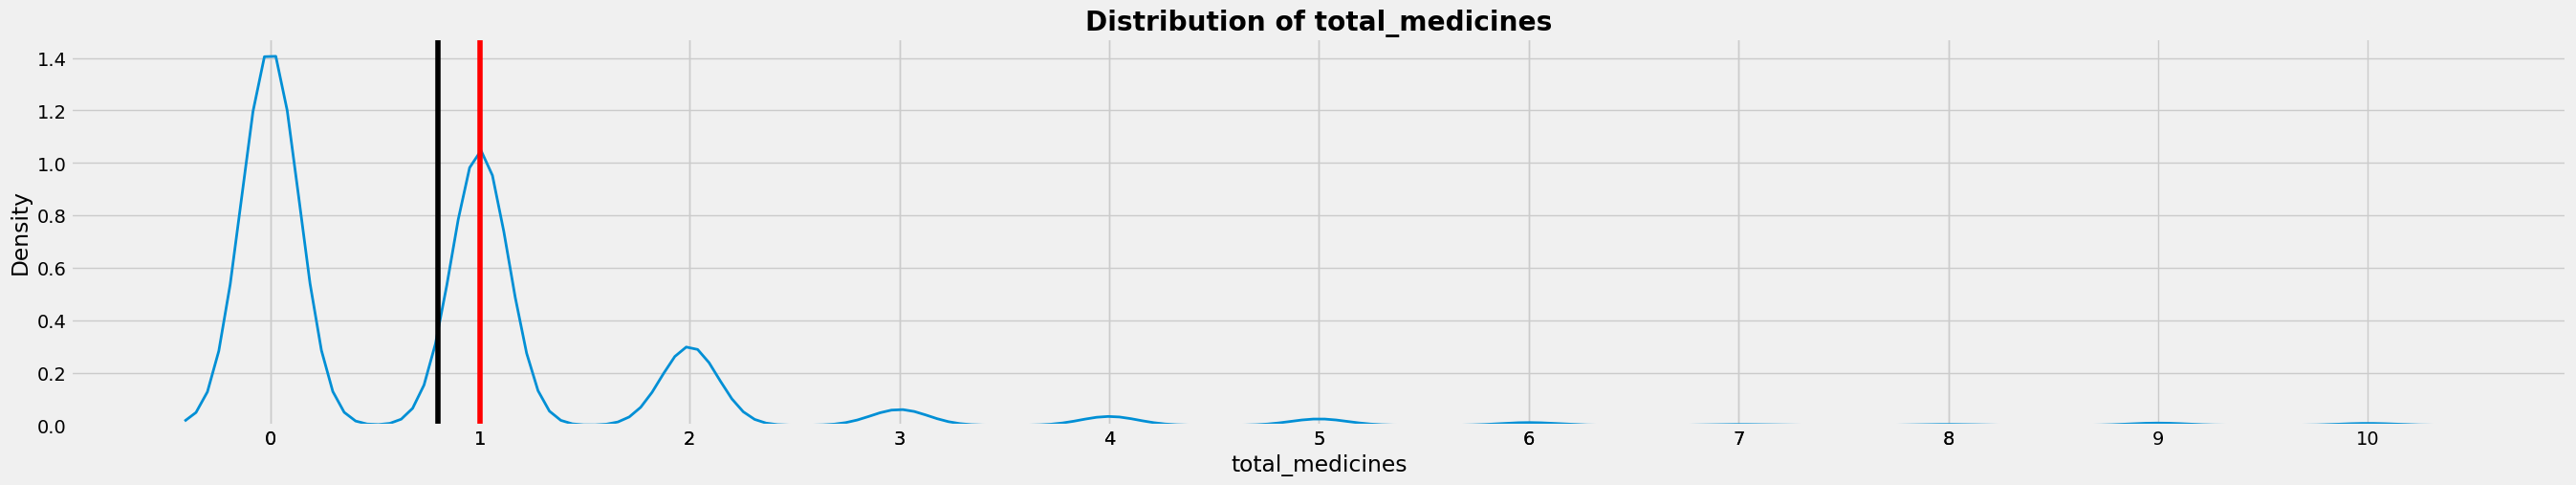

In [53]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_medicines',data= data,line_val=.50)
plt.axvline(data['total_medicines'].mean(),color = 'black')
plt.show()

In [68]:
temp = data.groupby('total_medicines').size().reset_index(name = 'values')
temp['cumsum'] = np.cumsum(temp['values'])
temp

total_medicines  values  cumsum
0                 0   26077   26077
1                 1   19062   45139
2                 2    5463   50602
3                 3    1095   51697
4                 4     613   52310
5                 5     441   52751
6                 6     190   52941
7                 7      58   52999
8                 8      61   53060
9                 9     154   53214
10               10     132   53346

In [69]:
data['total_medicines']=data['total_medicines'].apply(lambda x: '5+' if (x>5)  else str(x))

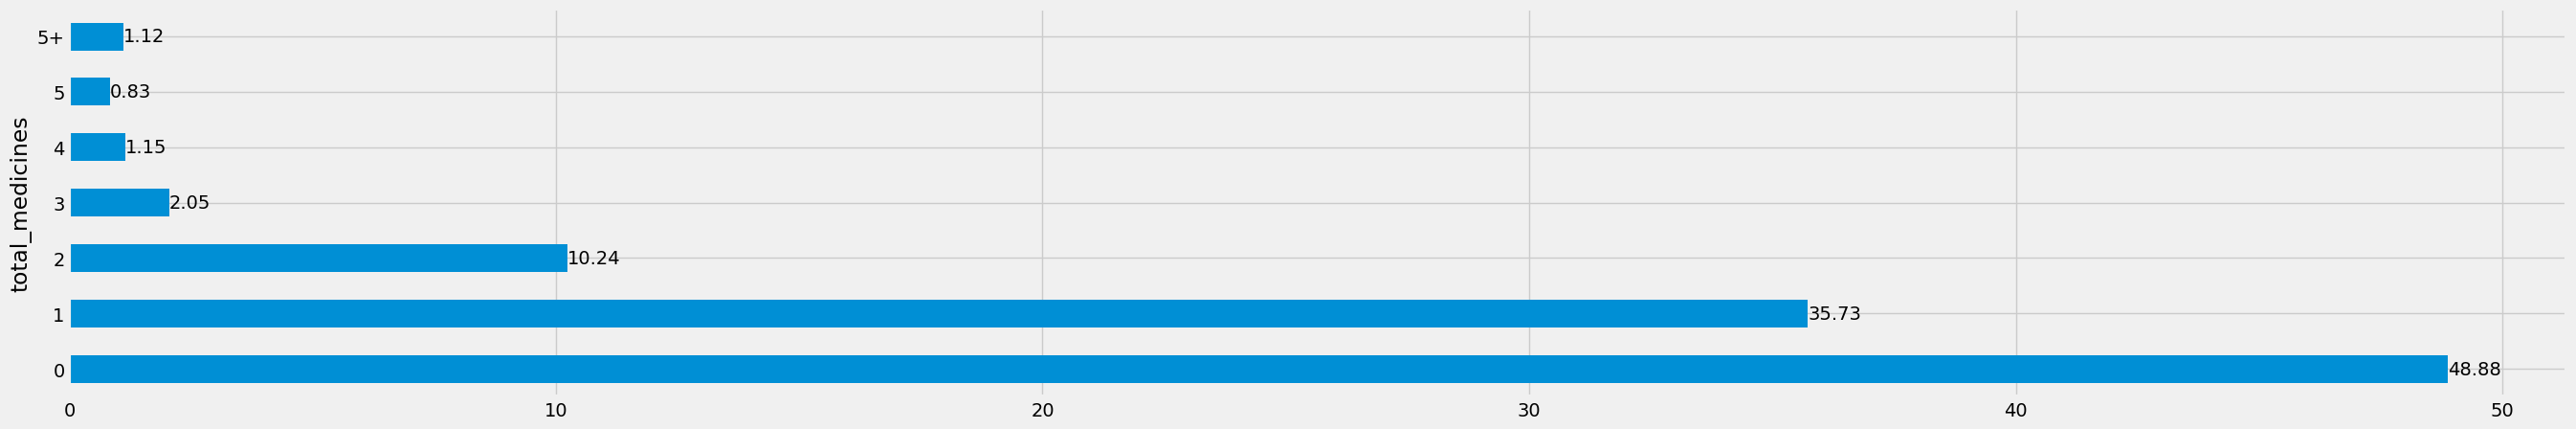

In [70]:
plt.figure(figsize=(30,5))
ax = data.groupby('total_medicines').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **nearly half the times, total medicine `0` occurs**
***

**avg_base_medicine_cost**

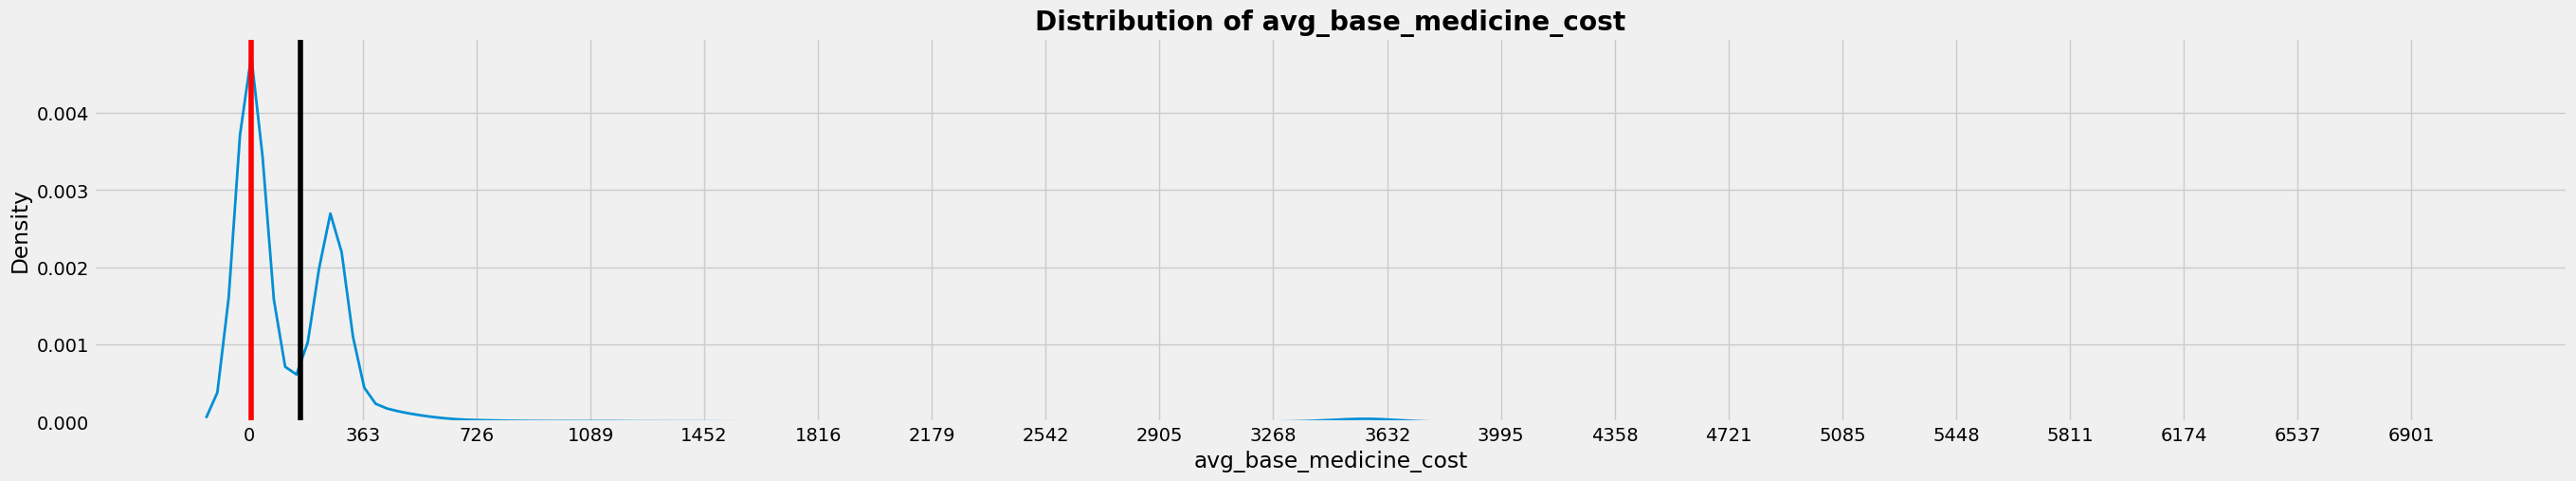

In [71]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_base_medicine_cost',data= data,line_val=.50)
plt.axvline(data['avg_base_medicine_cost'].mean(),color = 'black')
plt.show()

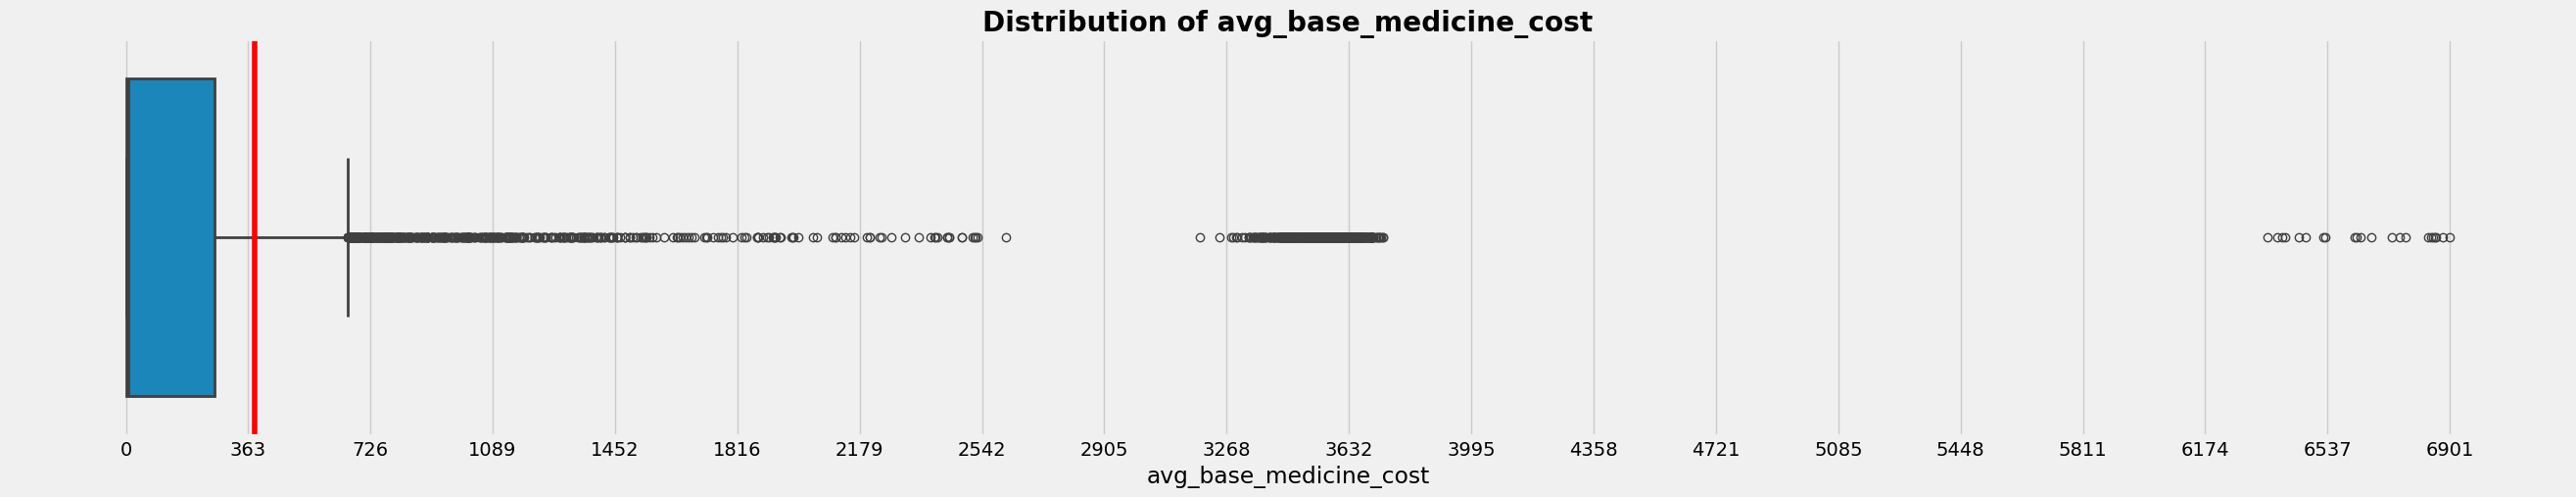

In [72]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_base_medicine_cost',data= data)
plt.show()

- **There are outliers in 2 separate groups**

**avg_total_medicine_cost**

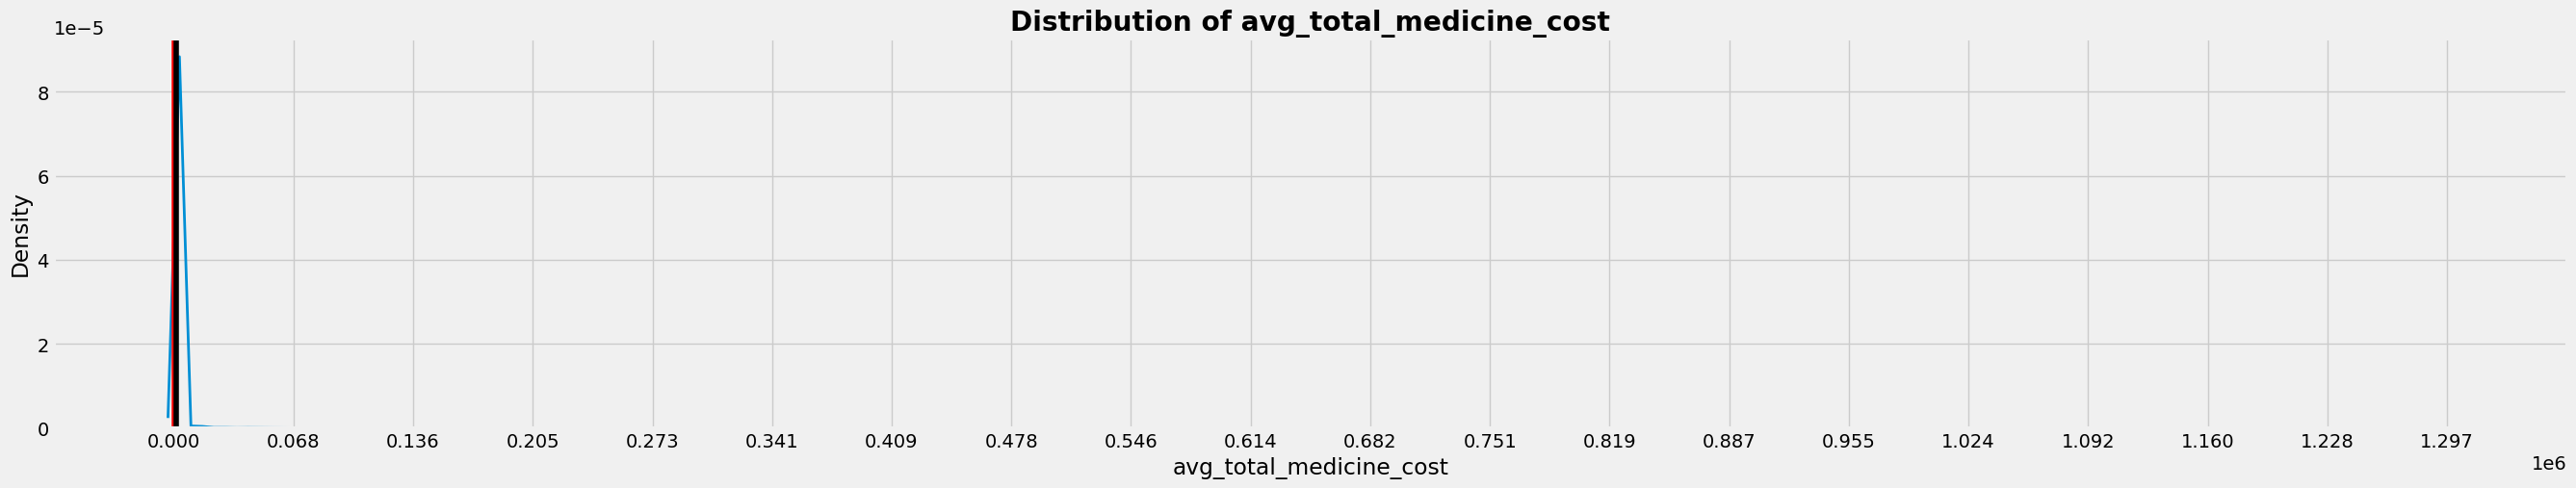

In [73]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'avg_total_medicine_cost',data= data,line_val=.50)
plt.axvline(data['avg_total_medicine_cost'].mean(),color = 'black')
plt.show()

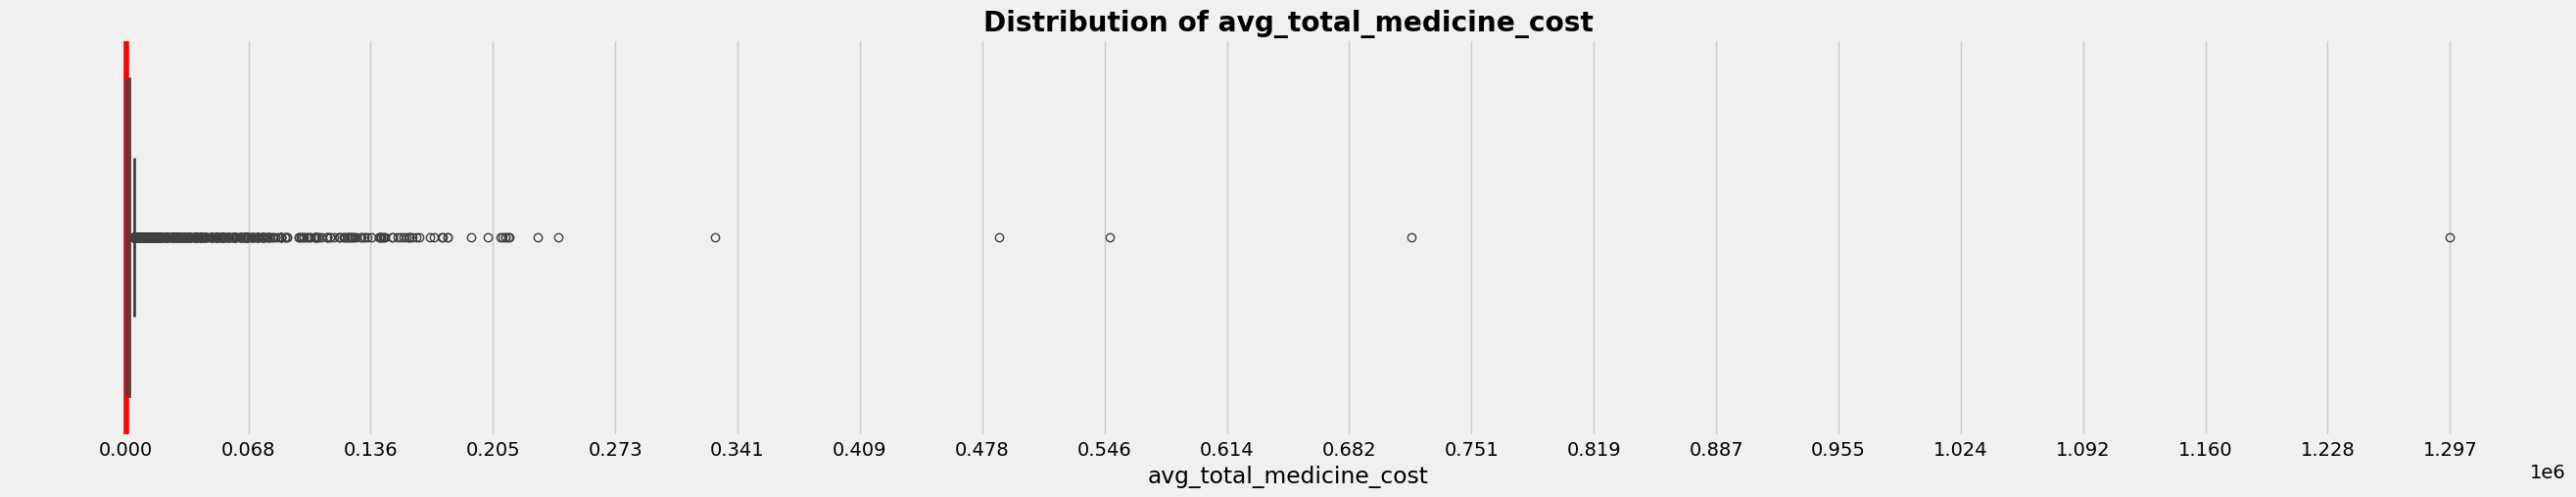

In [74]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'avg_total_medicine_cost',data= data,line_val=.50)
plt.show()

- **There are some extreme outliers**

**reasons_for_medications**

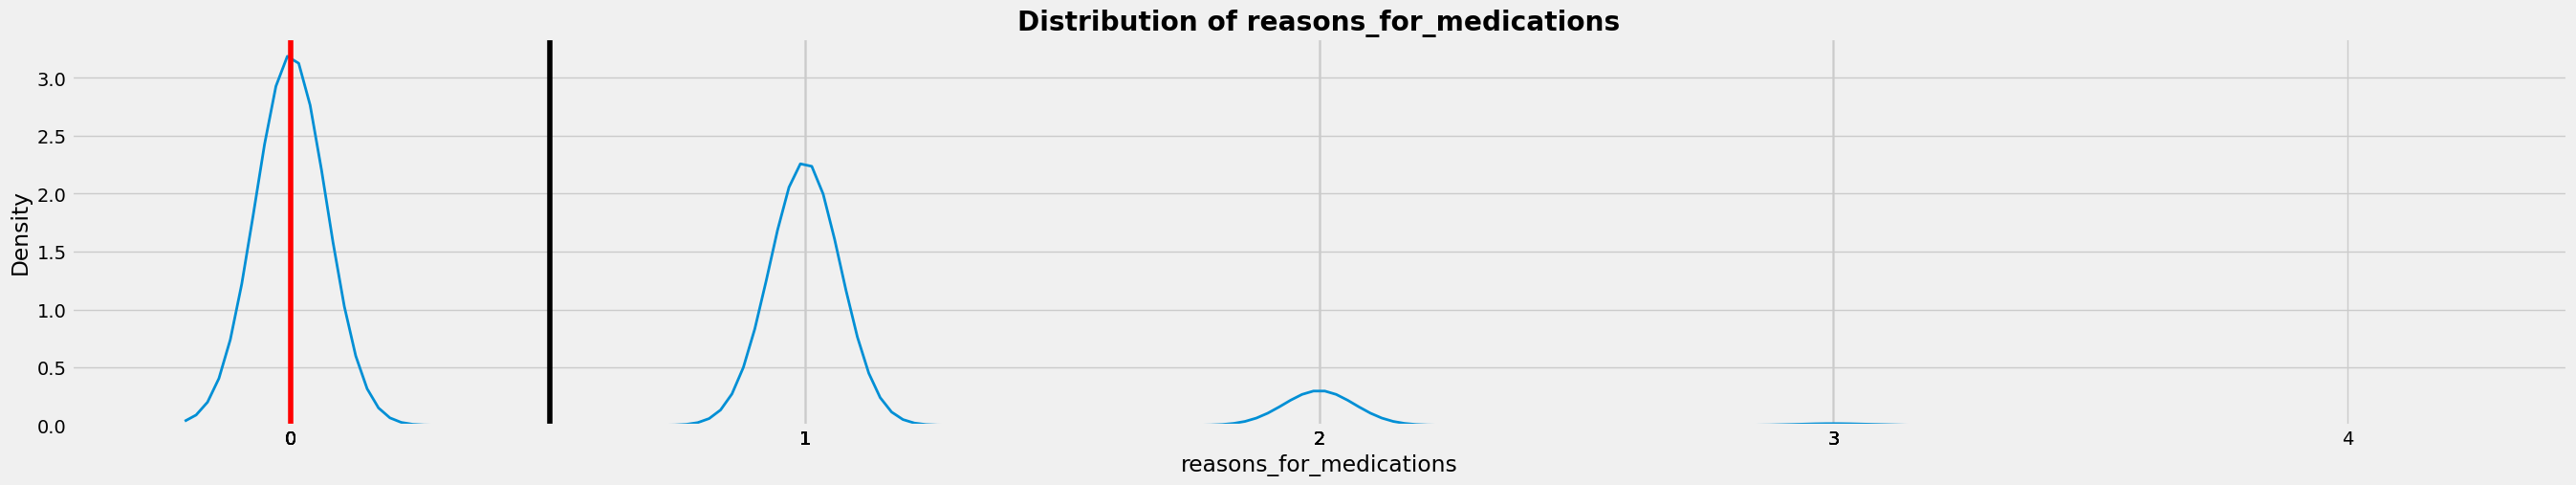

In [76]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'reasons_for_medications',data= data,line_val=.50)
plt.axvline(data['reasons_for_medications'].mean(),color = 'black')
plt.show()

In [78]:
data.groupby('reasons_for_medications').size()

reasons_for_medications
0    29485
1    20967
2     2758
3      135
4        1
dtype: int64

In [ ]:
data['reasons_for_medications']=data['reasons_for_medications'].apply(lambda x: '2+' if (x>2)  else str(x))

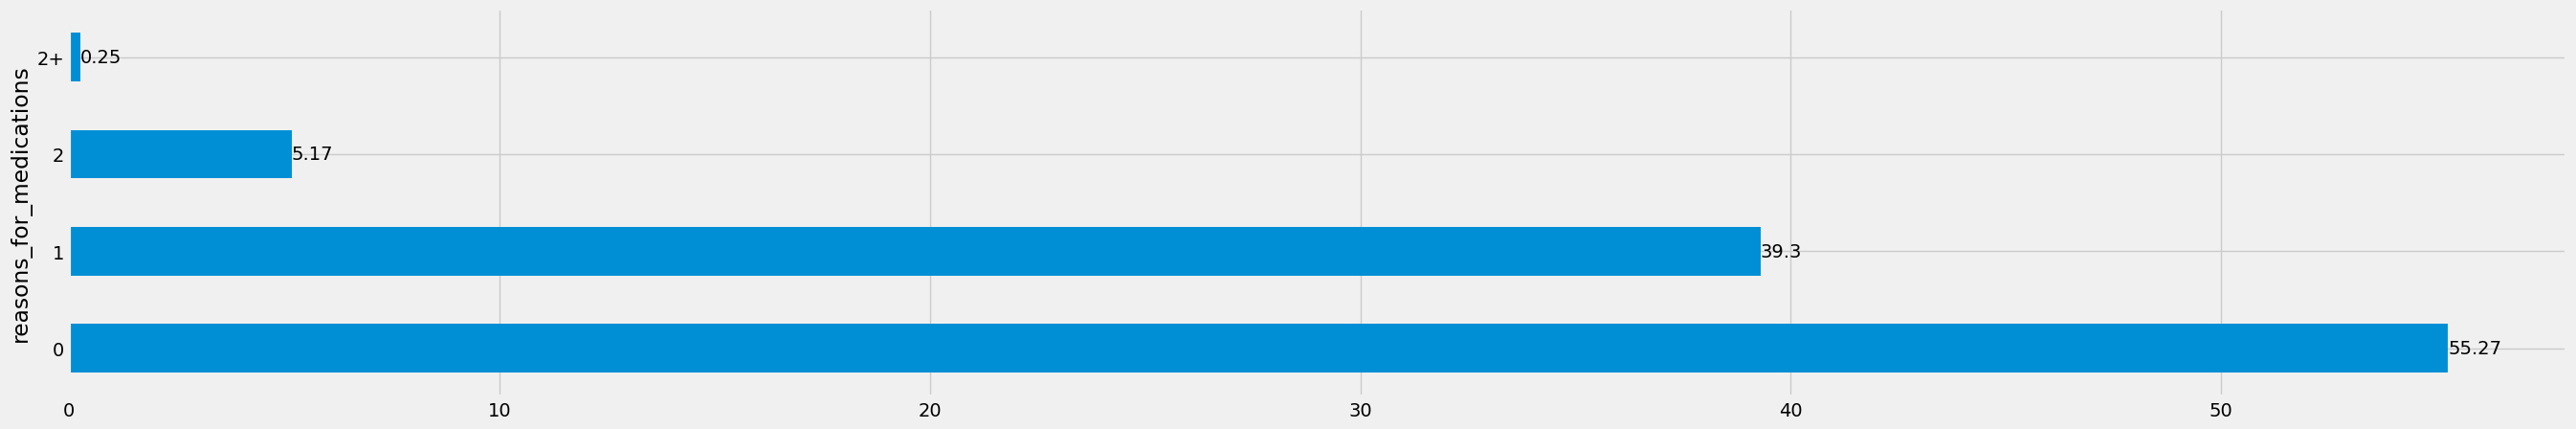

In [80]:
plt.figure(figsize=(30,5))
ax = data.groupby('reasons_for_medications').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

- **for almost half of the observation have 0 medications reason**

**is_ongoing_condition**

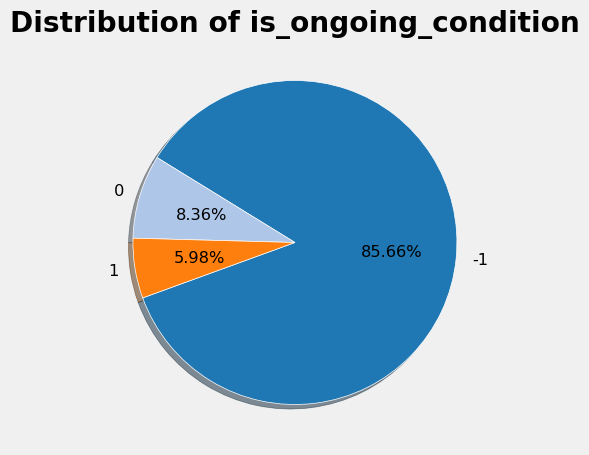

In [81]:
plt.figure(figsize=(5,5))
P.plot_pie(column='is_ongoing_condition',data = data)
plt.show()

In [84]:
data['is_ongoing_condition']=np.where(data['is_ongoing_condition'] == 1, 'YES',np.where(data['is_ongoing_condition']== 0,'FINISHED','NOTHING'))

***
- **`is_ongoing_condition` have `nothing` as most frequent values, and `ongoing` have the least value**
***

**total_conditions**

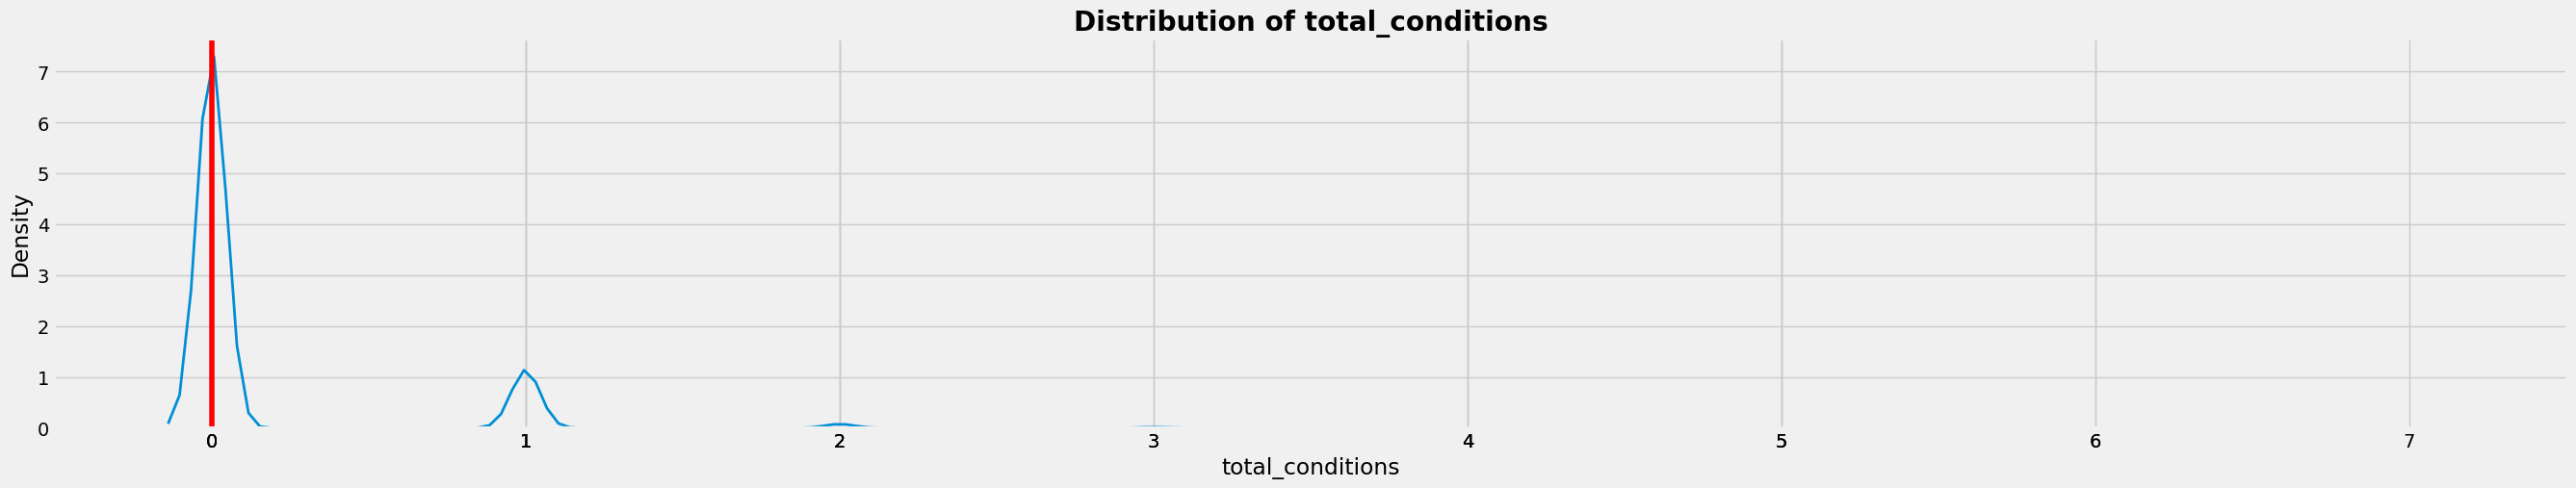

In [87]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_conditions',data= data,line_val=.50)
plt.show()

In [88]:
data.groupby('total_conditions').size()

total_conditions
0    45696
1     7066
2      468
3       96
4       16
5        3
7        1
dtype: int64

In [ ]:
data['total_conditions']=data['total_conditions'].apply(lambda x: '1+' if (x>1)  else str(x))

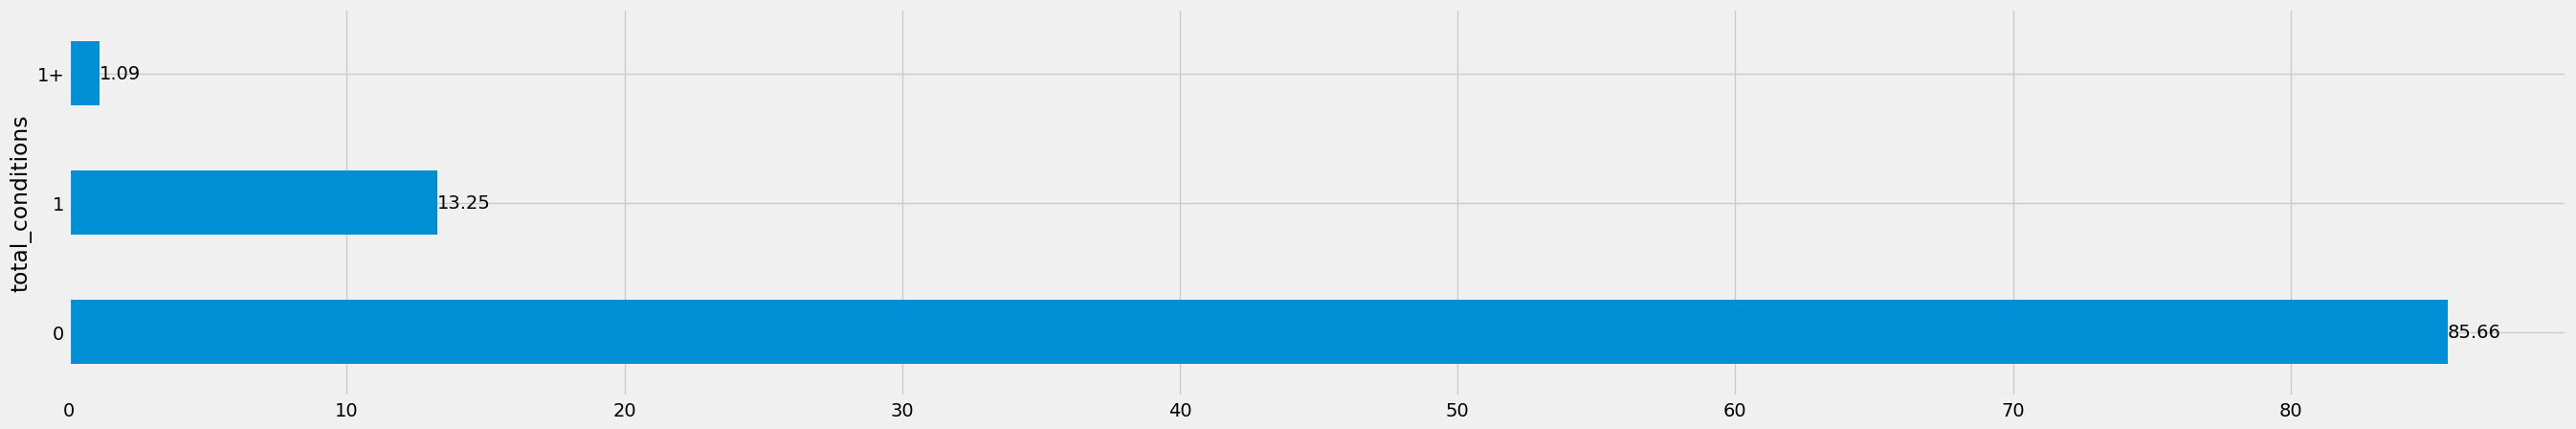

In [90]:
plt.figure(figsize=(30,5))
ax = data.groupby('total_conditions').size().div(len(data)).mul(100).round(2).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

***
- **in about `85%` of `observations` have `total conditions` as `0`**
***

**is_ongoing_careplan**

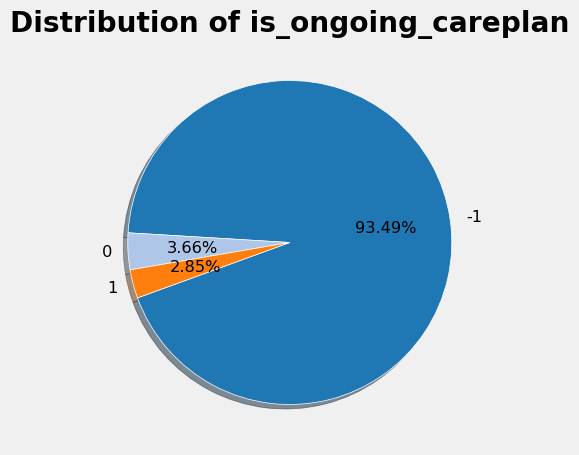

In [91]:
plt.figure(figsize=(5,5))
P.plot_pie(column='is_ongoing_careplan',data = data)
plt.show()

In [92]:
data['is_ongoing_careplan']=np.where(data['is_ongoing_careplan'] == 1, 'YES',np.where(data['is_ongoing_careplan']== 0,'FINISHED','NOTHING'))

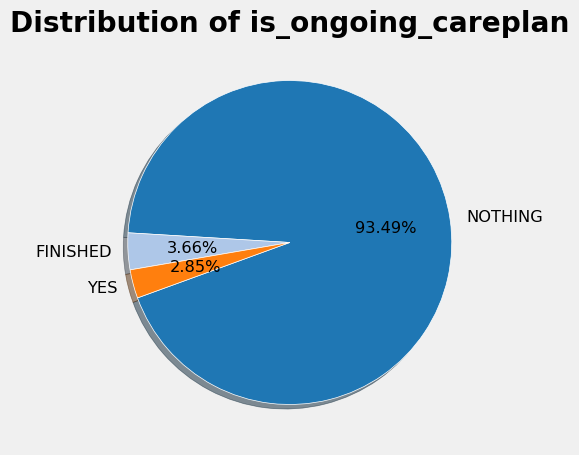

In [93]:
plt.figure(figsize=(5,5))
P.plot_pie(column='is_ongoing_careplan',data = data)
plt.show()

- **more than 90% of observations have nothing value**

**total_careplans**

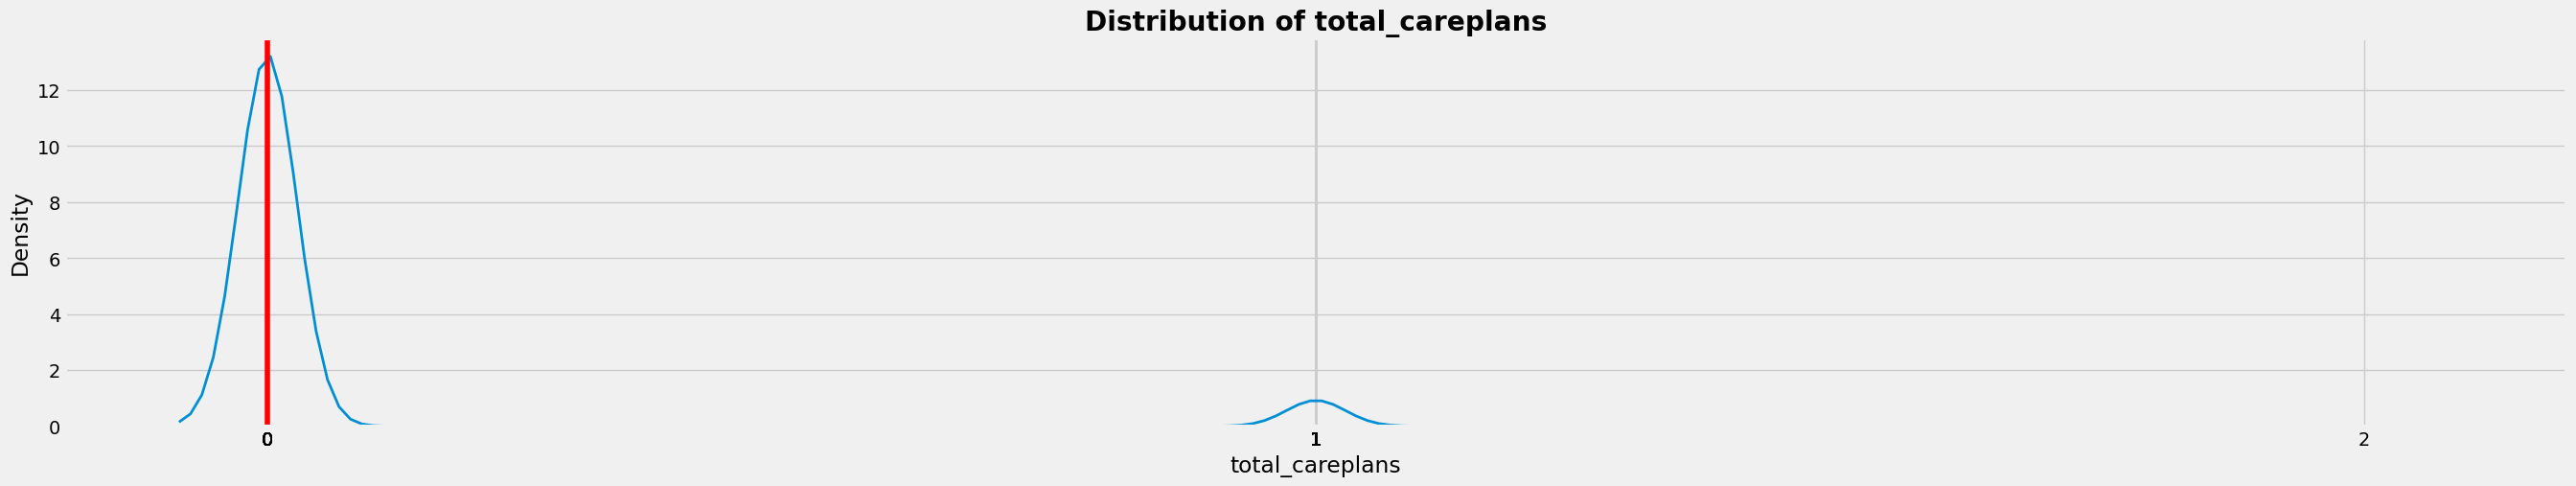

In [95]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'total_careplans',data= data,line_val=.50)
plt.show()

In [96]:
data.groupby('total_careplans').size()

total_careplans
0    49874
1     3461
2       11
dtype: int64

In [120]:
data['total_careplans']=data['total_careplans'].astype('object')

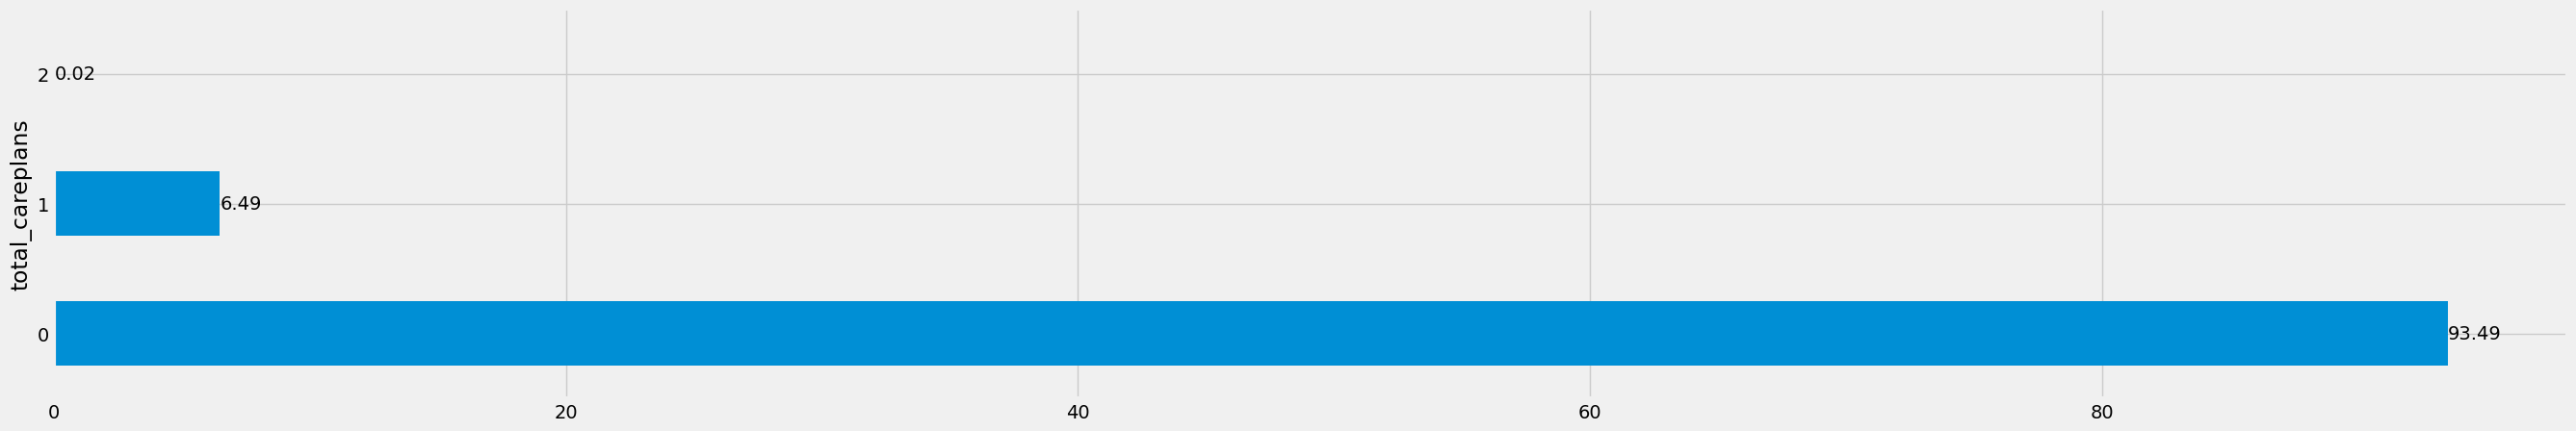

In [115]:
plt.figure(figsize=(30,5))
ax = data.groupby('total_careplans').size().div(len(data)).mul(100).round(2).sort_values(ascending=False).plot(kind = 'barh')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

**age_as_2022**

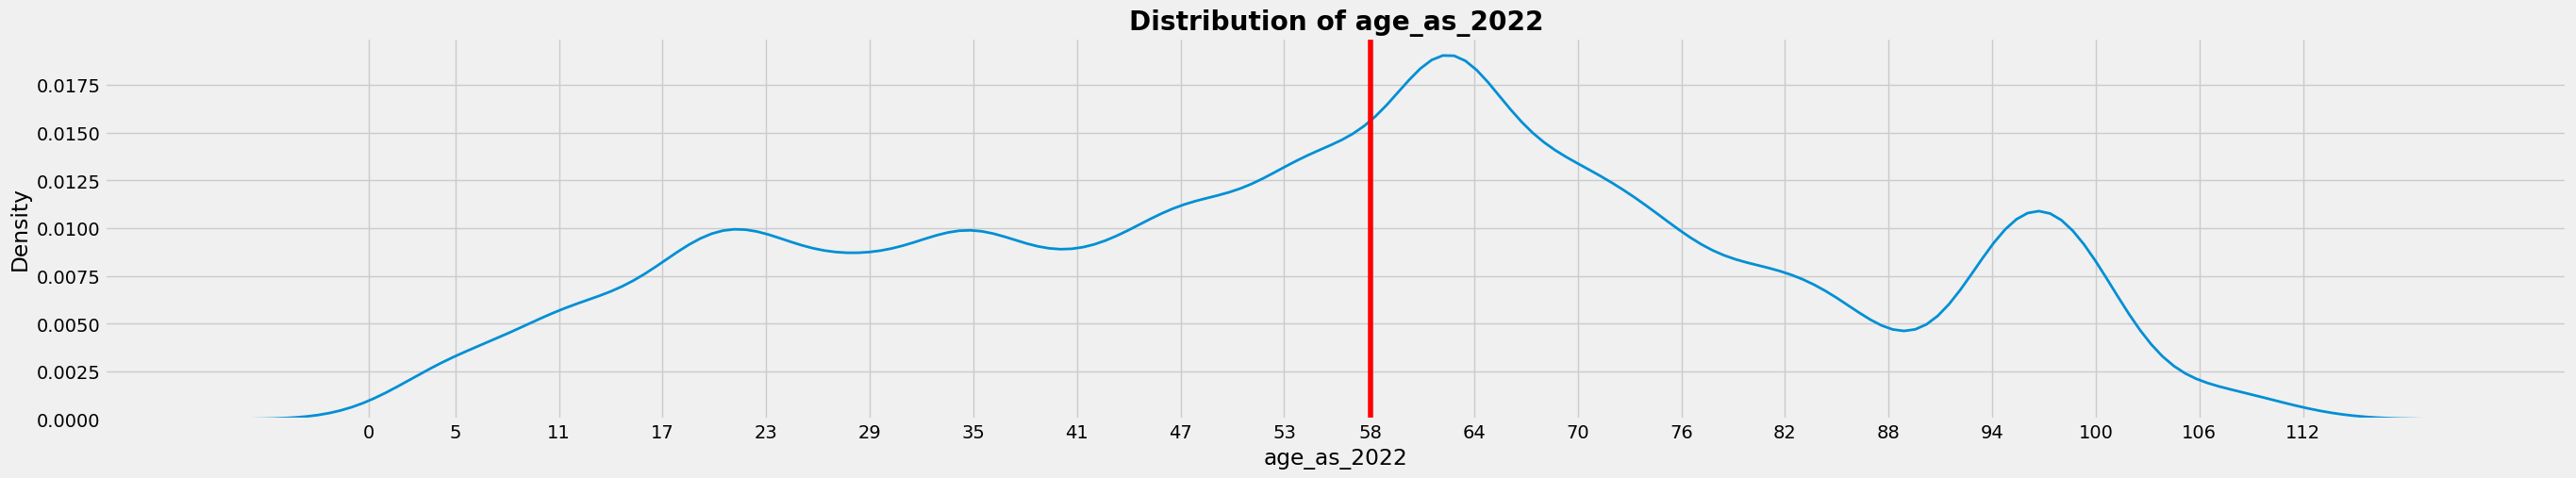

In [98]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'age_as_2022',data= data,line_val=.50)
plt.show()

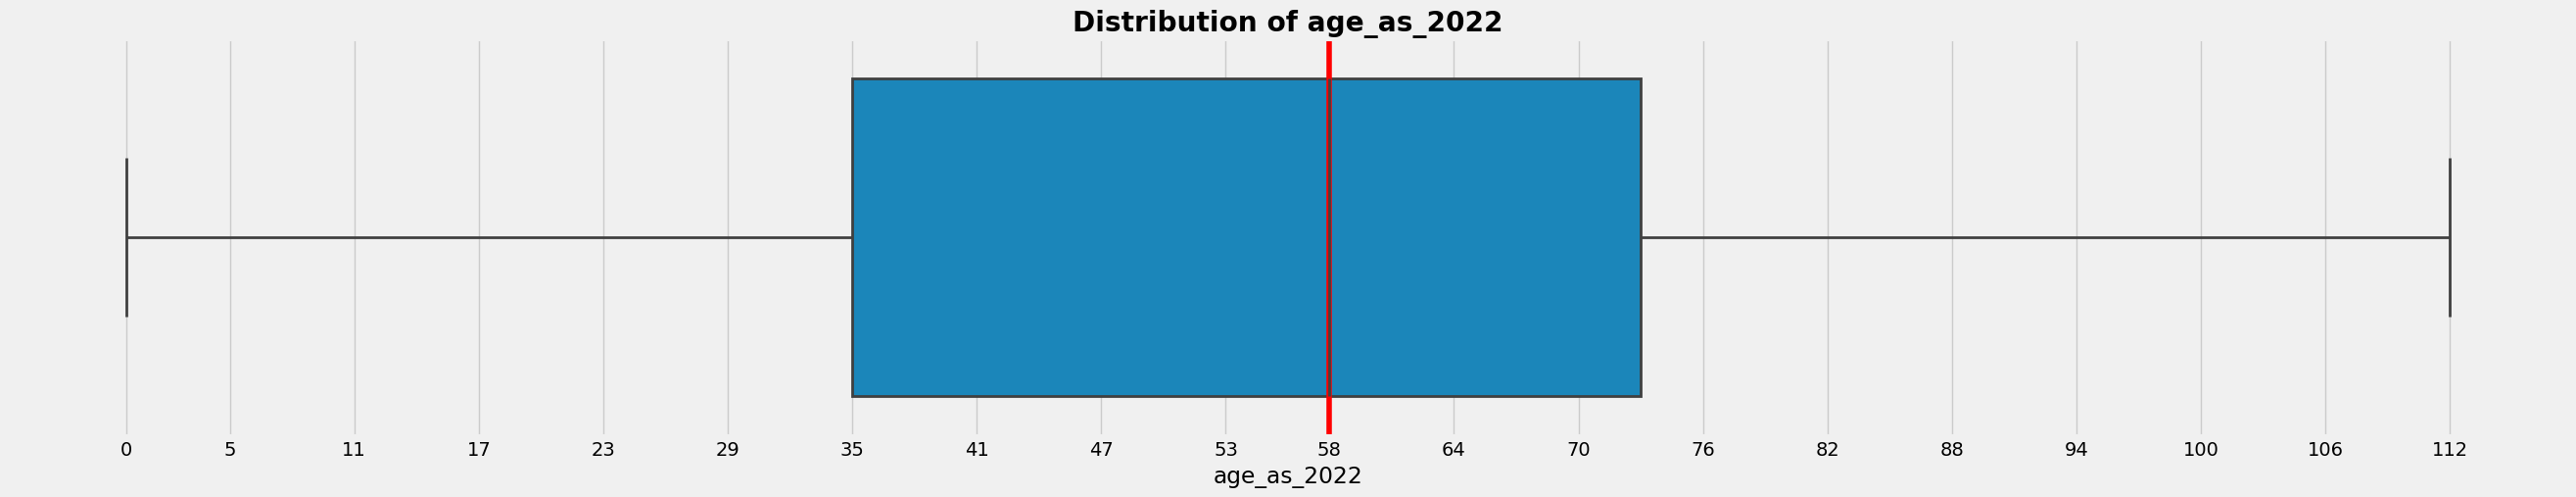

In [99]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'age_as_2022',data= data,line_val=.50)
plt.show()

- **age column do not have outliers, and there is a small peak at around 100**

**marital**

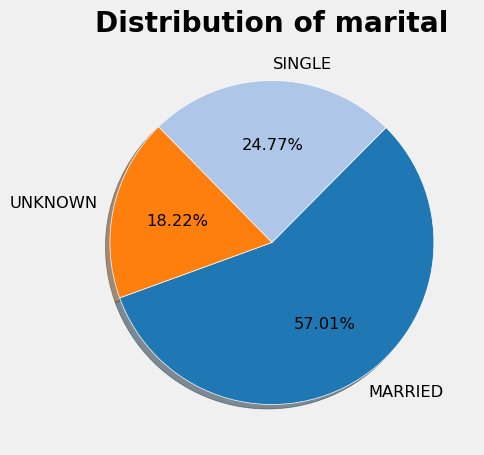

In [100]:
plt.figure(figsize=(5,5))
P.plot_pie(column='marital',data = data)
plt.show()

- **more than 50% of observations have value as married**

**race**

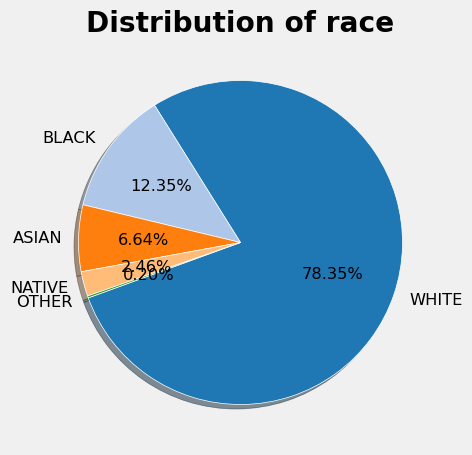

In [101]:
plt.figure(figsize=(5,5))
P.plot_pie(column='race',data = data)
plt.show()

- **approx 79% of observations are from white race**

**ethnicity**

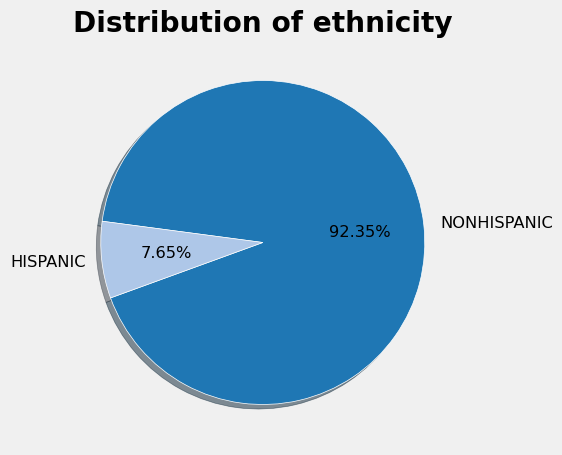

In [102]:
plt.figure(figsize=(5,5))
P.plot_pie(column='ethnicity',data = data)
plt.show()

- **more than 90% of observations are from non hispanic ethnicity**

**patient_gender**

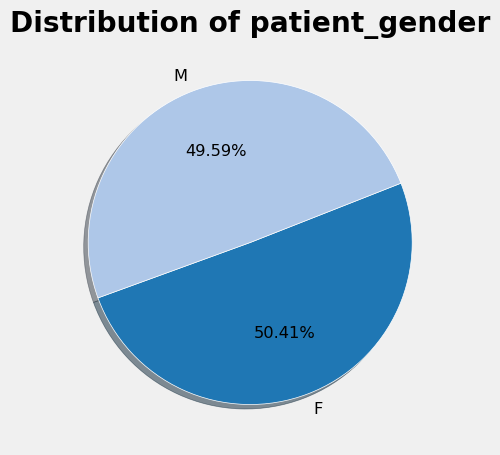

In [103]:
plt.figure(figsize=(5,5))
P.plot_pie(column='patient_gender',data = data)
plt.show()

- **patient gender is almost equally distributed**

**provider_gender**

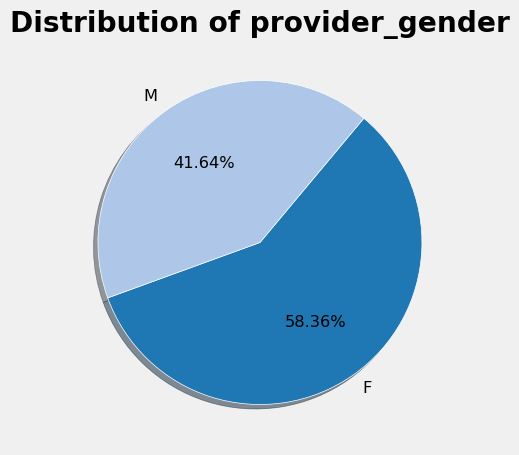

In [104]:
plt.figure(figsize=(5,5))
P.plot_pie(column='provider_gender',data = data)
plt.show()

- **more female provider gender compared to male gender**

**utilization**

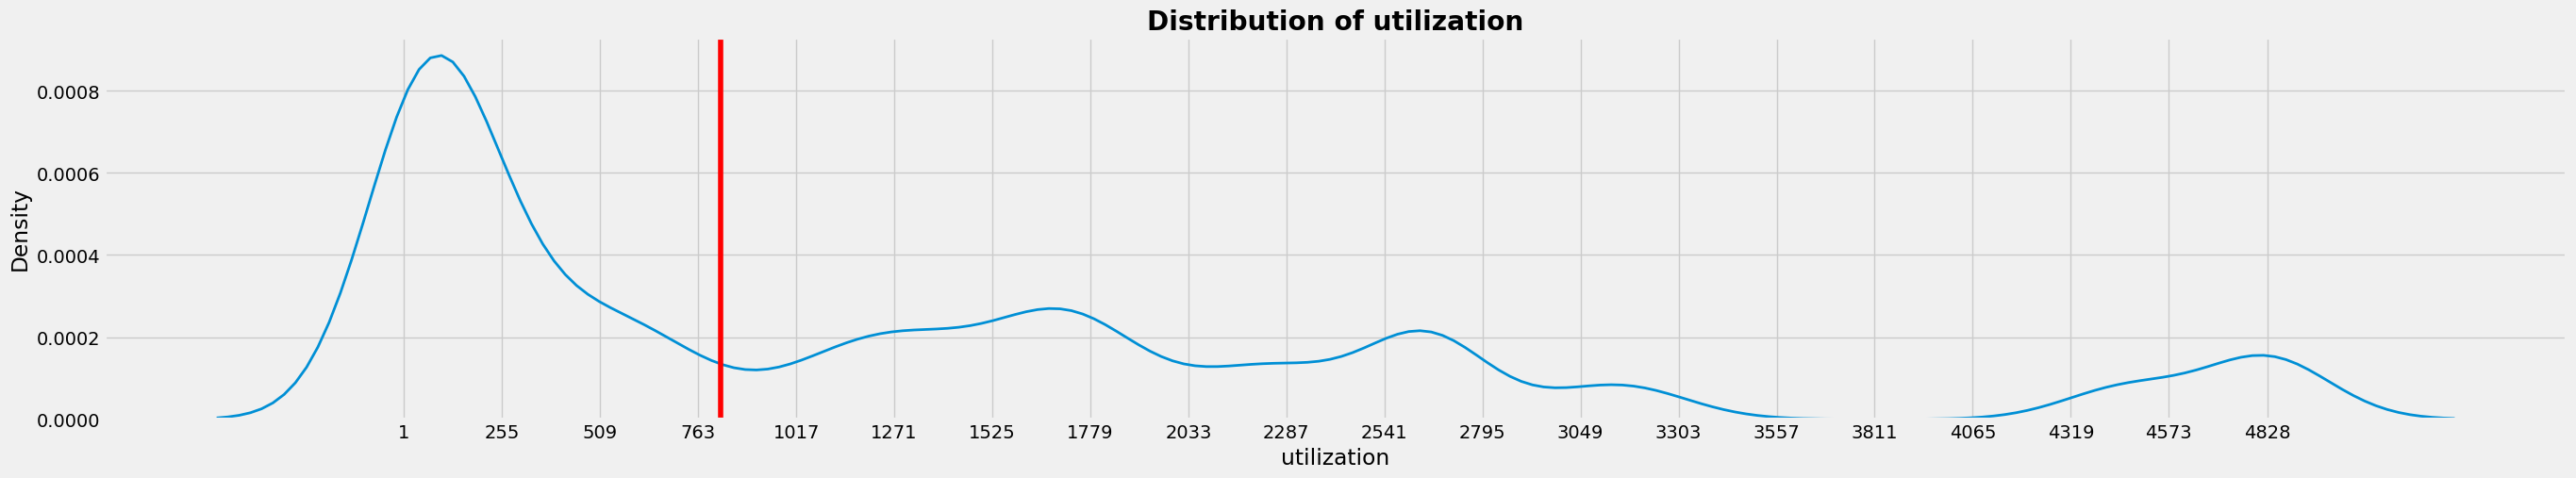

In [105]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'utilization',data= data,line_val=.50)
plt.show()

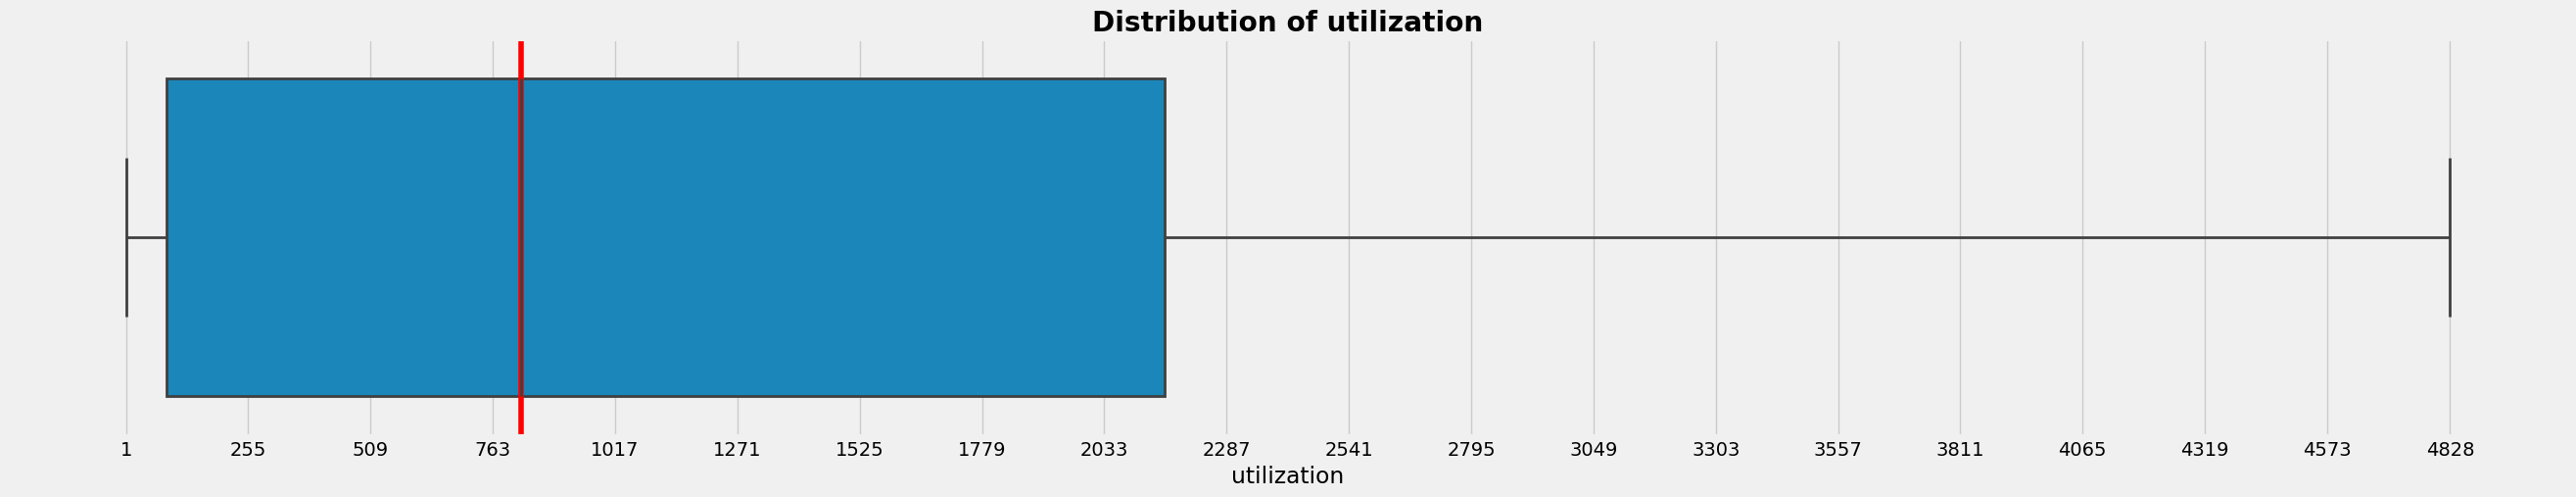

In [106]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'utilization',data= data,line_val=.50)
plt.show()

- **utilization column do not have outlier, but values are more around the lower end**

**caused_readmission**

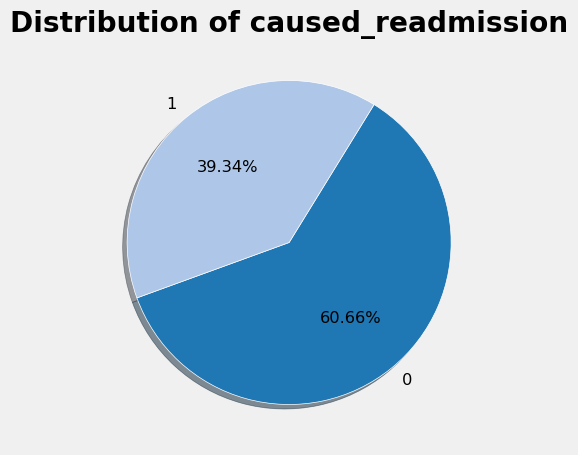

In [107]:
plt.figure(figsize=(5,5))
P.plot_pie(column='caused_readmission',data = data)
plt.show()

***
- **`almost` `40%` of encounter are reason for `readmissions`**
***

**condition_duration**

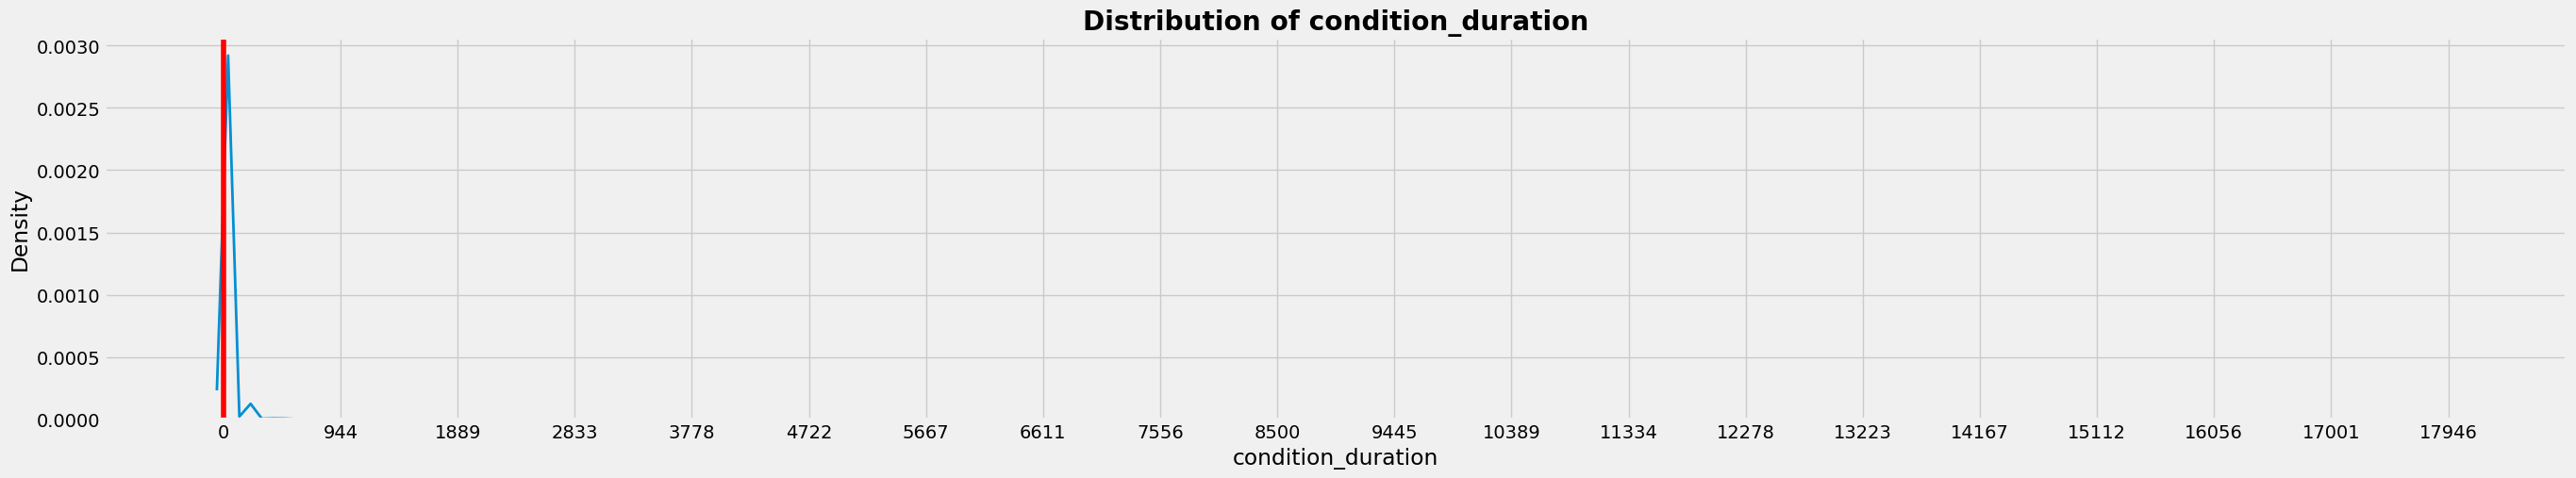

In [108]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'condition_duration',data= data,line_val=.50)
plt.show()

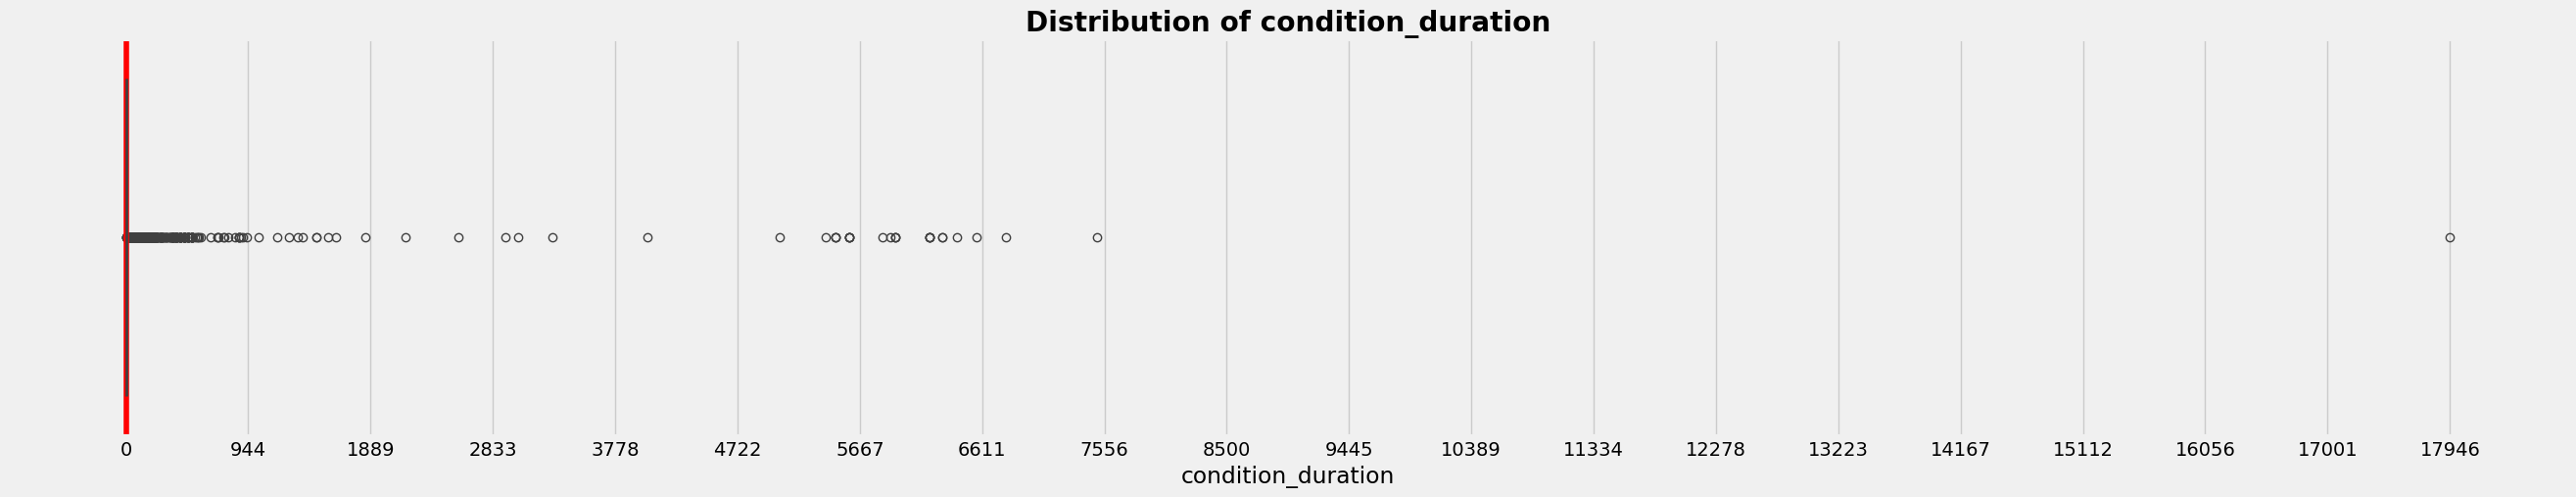

In [109]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'condition_duration',data= data,line_val=.50)
plt.show()

- **too many outiers**

**careplan_duration**

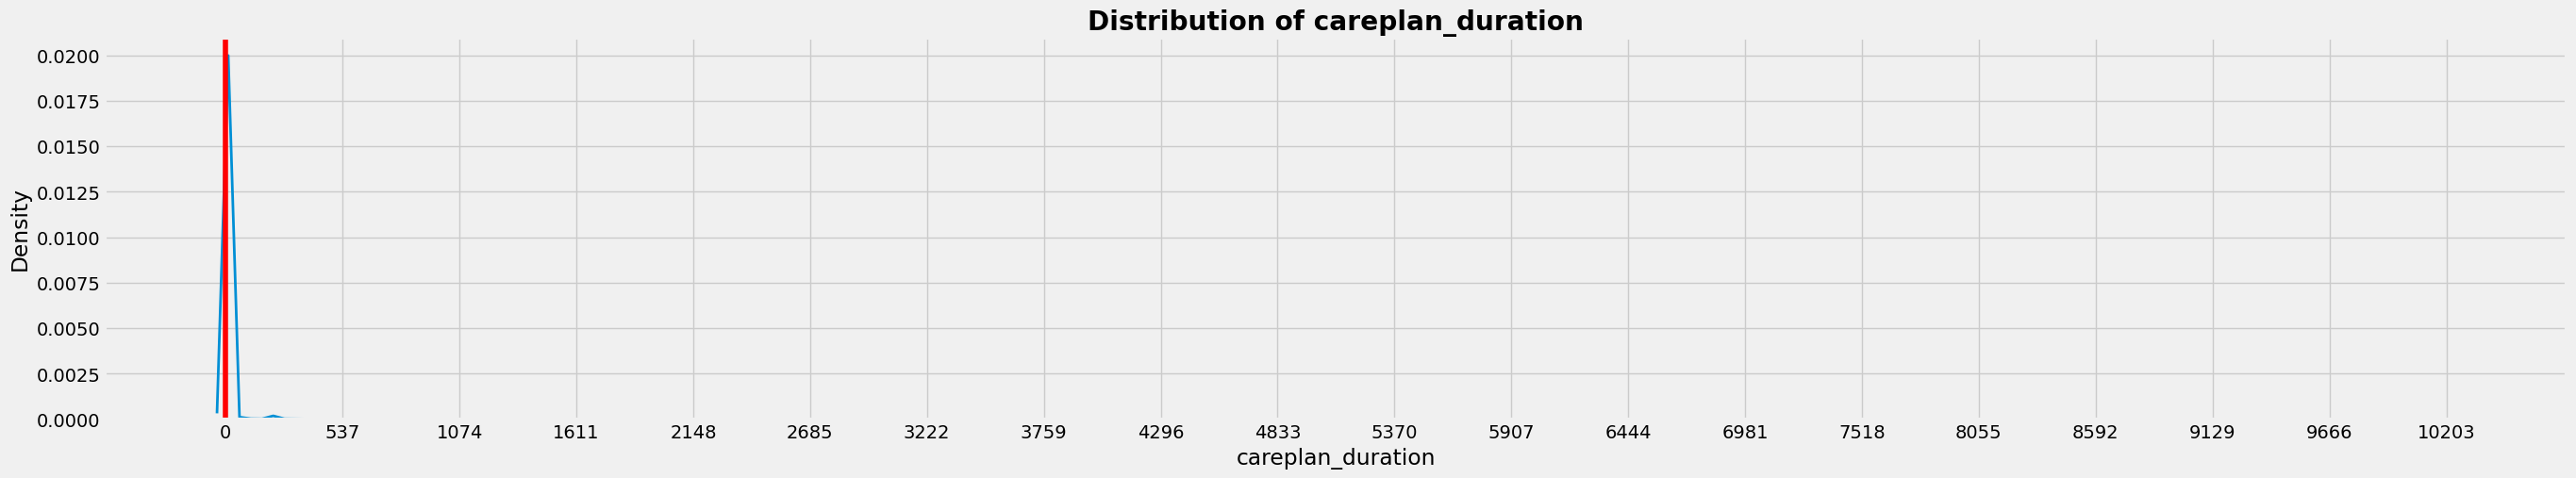

In [110]:
plt.figure(figsize=(30,5))
P.plot_kde(column= 'careplan_duration',data= data,line_val=.50)
plt.show()

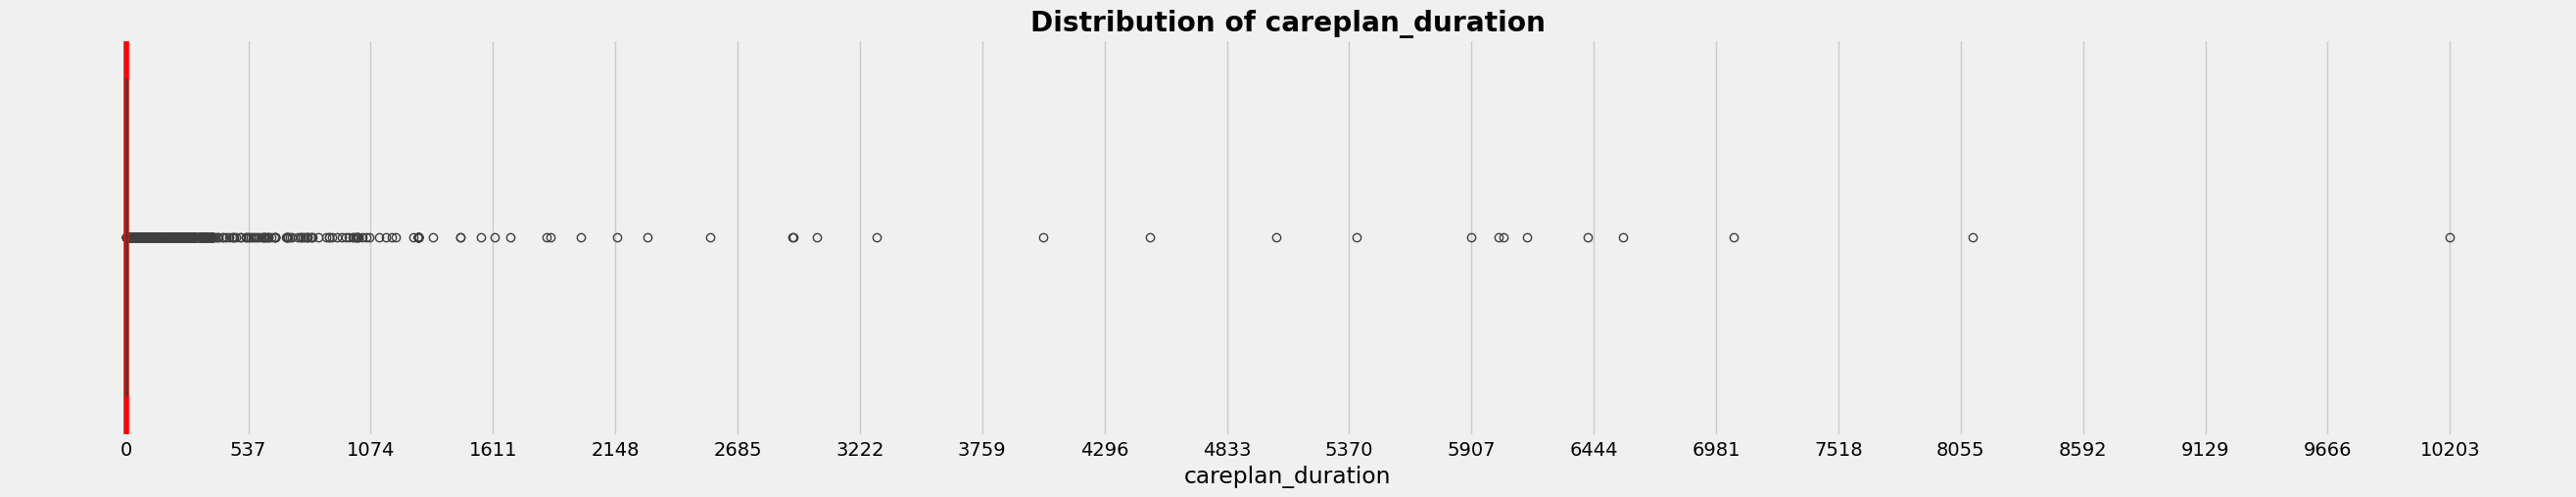

In [111]:
plt.figure(figsize=(30,5))
P.plot_box(column= 'careplan_duration',data= data,line_val=.50)
plt.show()

- **many outliers too**

In [122]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')

index  total_unique_values
0           payer_coverage                   15
1       avg_procedure_cost                15909
2   avg_base_medicine_cost                11010
3  avg_total_medicine_cost                11986
4              age_as_2022                  108
5              utilization                  220
6       caused_readmission                    2
7       condition_duration                  222
8        careplan_duration                  357

In [123]:
data.select_dtypes(include='object').nunique().reset_index(name = 'total_unique_values')

index  total_unique_values
0           encounter_start                50029
1            encounterclass                    6
2       base_encounter_cost                    2
3                  duration                    4
4          total_procedures                    7
5           total_medicines                    7
6   reasons_for_medications                    4
7      is_ongoing_condition                    3
8          total_conditions                    3
9       is_ongoing_careplan                    3
10          total_careplans                    3
11                  marital                    3
12                     race                    5
13                ethnicity                    2
14           patient_gender                    2
15          provider_gender                    2

In [131]:
data.select_dtypes(include='number').nunique().reset_index(name = 'total_unique_values')['index'].values.tolist()

['payer_coverage',
 'avg_procedure_cost',
 'avg_base_medicine_cost',
 'avg_total_medicine_cost',
 'age_as_2022',
 'utilization',
 'caused_readmission',
 'condition_duration',
 'careplan_duration']

In [132]:
cat_cols = ['encounterclass','base_encounter_cost','duration','total_procedures','total_medicines','reasons_for_medications','is_ongoing_condition',
 'total_conditions','is_ongoing_careplan','total_careplans','marital','race','ethnicity','patient_gender','provider_gender']

In [133]:
num_cols = ['payer_coverage','avg_procedure_cost','avg_base_medicine_cost','avg_total_medicine_cost','age_as_2022',
 'utilization','condition_duration','careplan_duration']

In [134]:
target_col = ['caused_readmission']

***

## **Bivariate Analysis with `caused_readmission` column**

### **Categorical Columns with Target**

**encounterclass**

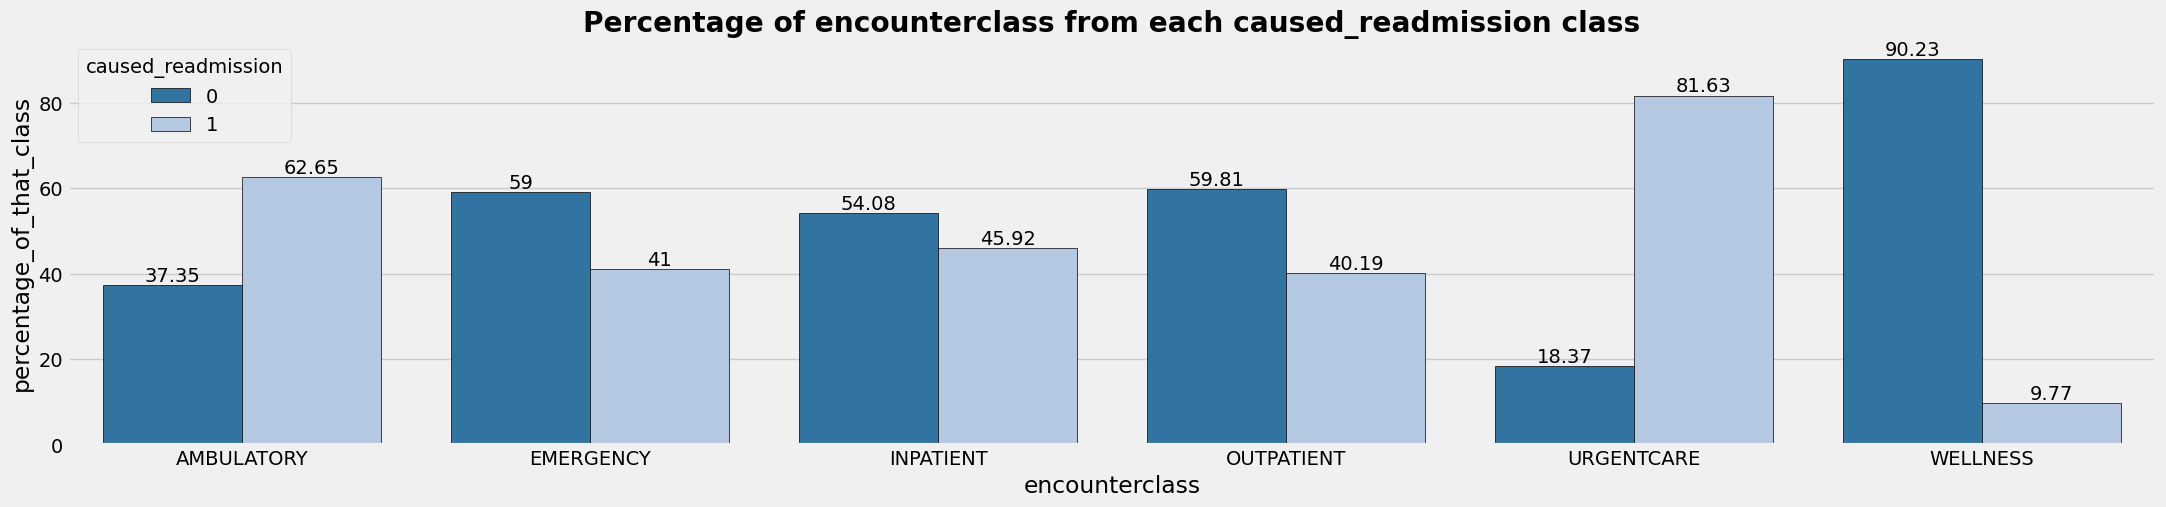

In [138]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='encounterclass',data=data,target='caused_readmission',orient='v')

In [139]:
urgent_care_mask = (data['encounterclass']=='URGENTCARE') | (data['encounterclass']=='AMBULATORY')
ct = pd.crosstab(urgent_care_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.424 → Strong


***
- ***according to the visuals, `ambulatory and urgentcare encounters showed the most observations for caused readmission`, after doing statistical test we can validate a `strong relationship` between `encounterclass` and `causing readmission`***
***

**duration**

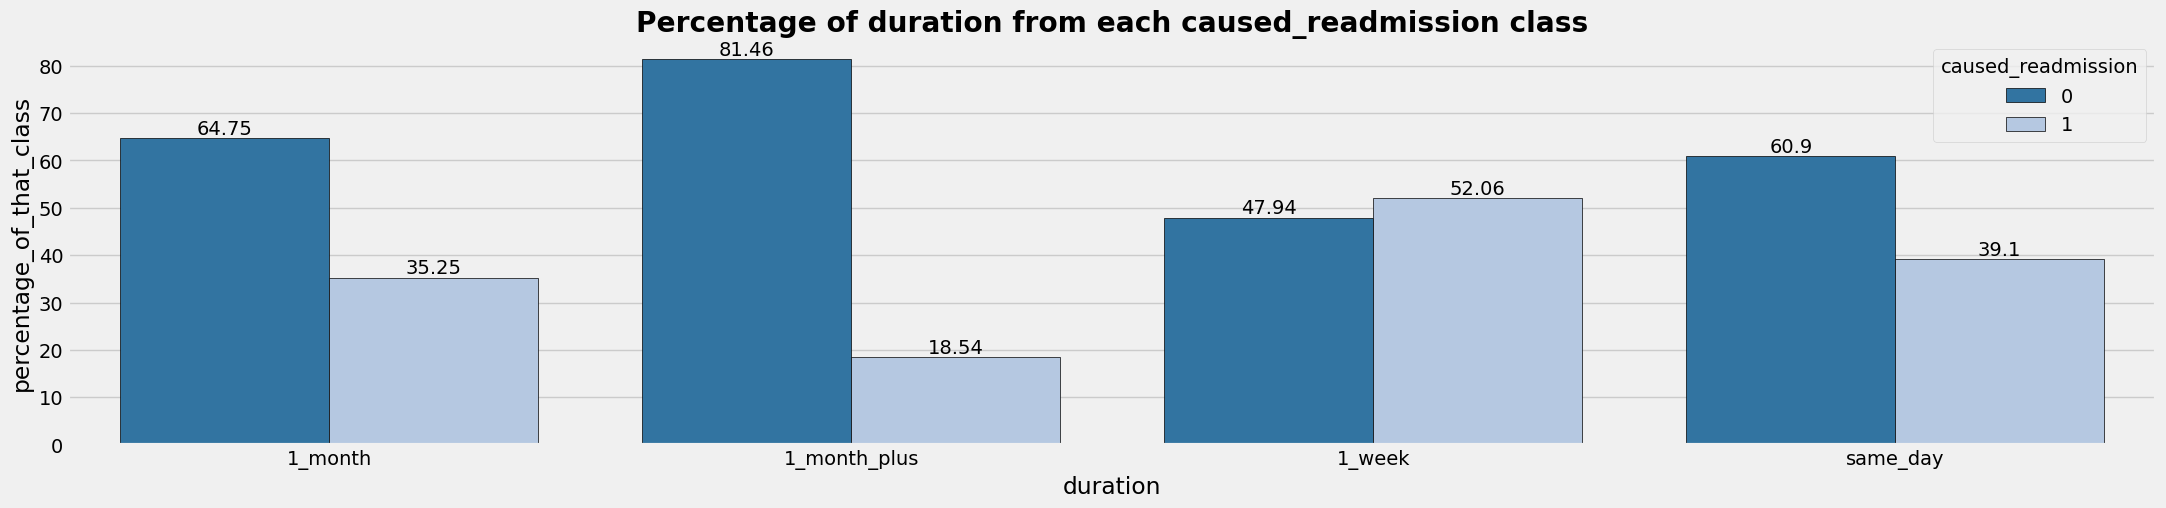

In [140]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='duration',data=data,target='caused_readmission',orient='v')

**Need to do a statistical test to check if there is any association for `1_week` class for causing readmission**

In [141]:
duration_mask = (data['duration']=='1_week')
ct = pd.crosstab(duration_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.041 → Weak


***
***By visuals I saw that `1_week duration is showing high number in causing readmission`, after doing statistical test we can validate a `weak relationship` between `duration of 1_week` and `cause_readmission` column***
***

**marital**

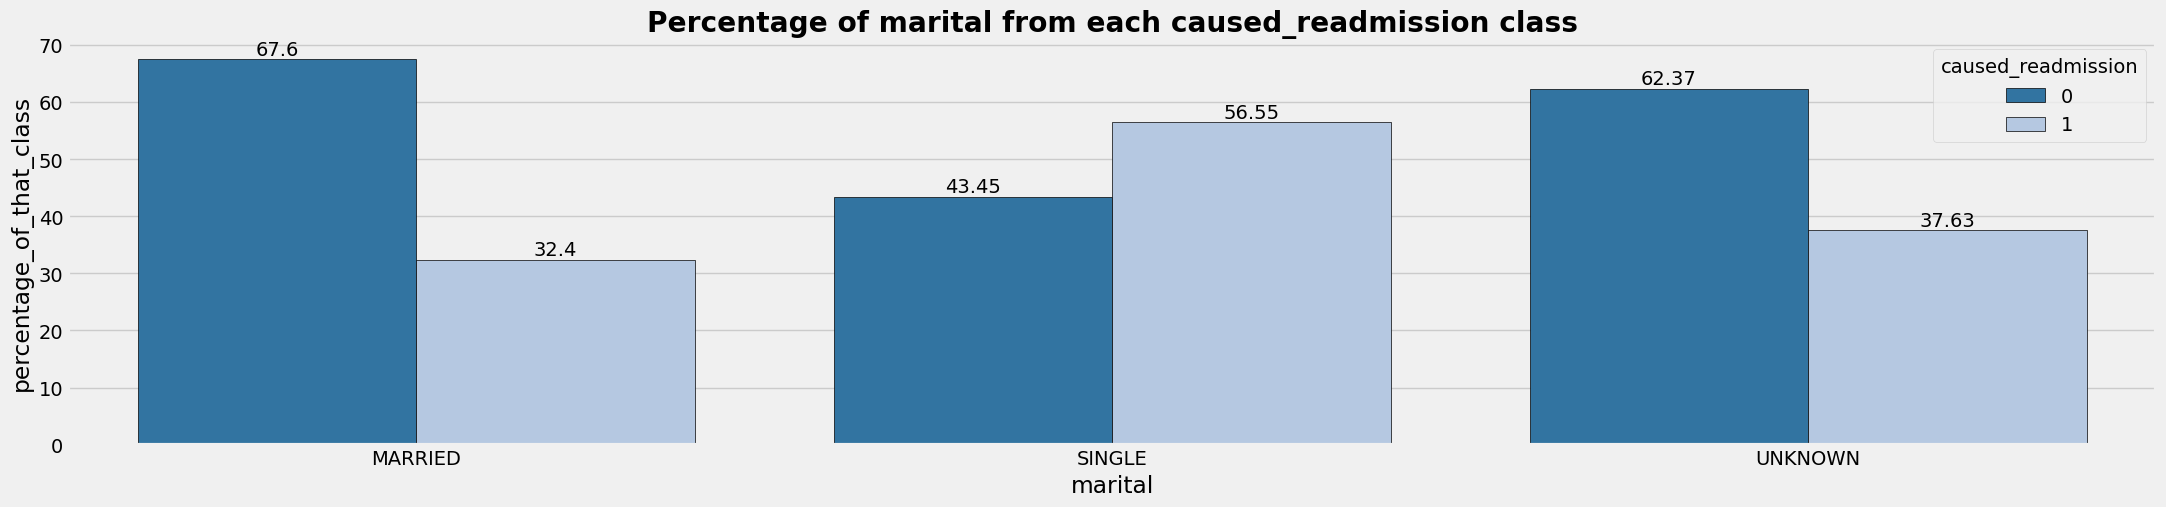

In [142]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='marital',data=data,target='caused_readmission',orient='v')

In [143]:
marital_mask = (data['marital']=='SINGLE')
ct = pd.crosstab(marital_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.202 → Moderate


***
- ***visuals showed that there is a `high percentage of causing readmission in single marital status`, by doing statistical test we can validate that `cause_readmission` column have `moderate relationship` with `marital class single`***
***

**ethnicity**

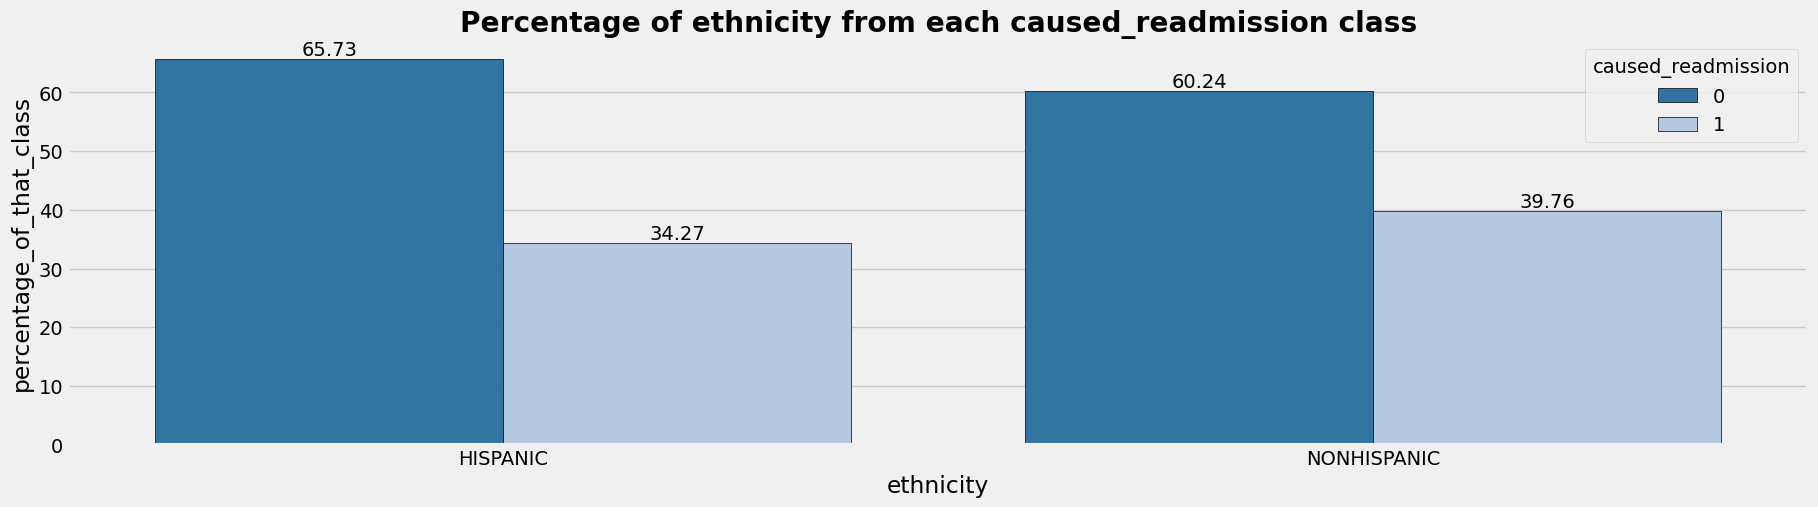

In [144]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='ethnicity',data=data,target='caused_readmission',orient='v')

- **we do not see any strong pattern in between ethnicity and caused readmission**

**race**

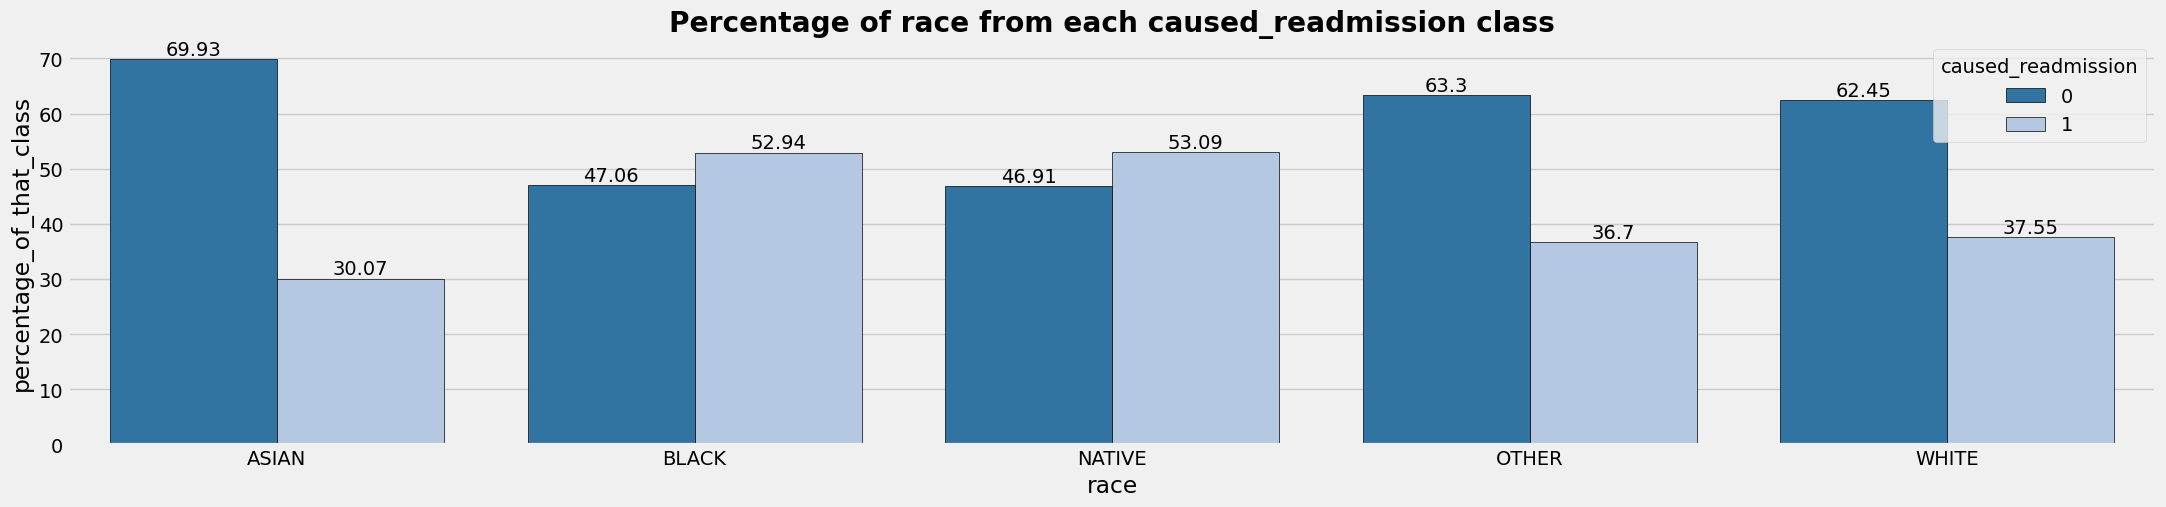

In [145]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='race',data=data,target='caused_readmission',orient='v')

In [146]:
race_mask = (data['race']=='BLACK') |(data['race']=='NATIVE')
ct = pd.crosstab(race_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.116 → Moderate


***
- ***by visuals we saw that `black and native race is showing high percentage of values in cause readmission class`, after doing statistical test we can validate that `cause_readmission` column have a `moderate relationship` with `black` and `native` race***
***

***

**patient_gender**

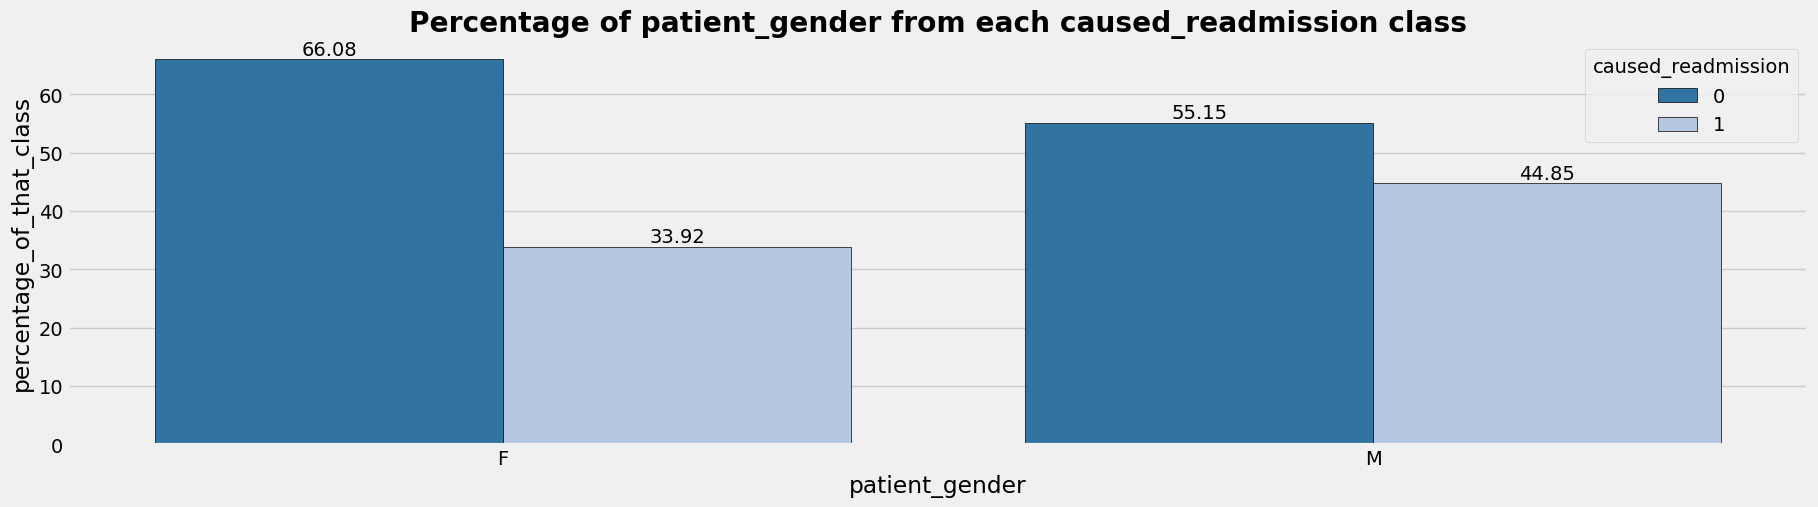

In [41]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='patient_gender',data=data,target='caused_readmission',orient='v')

**`male` gender is showing a little extra in readmission**

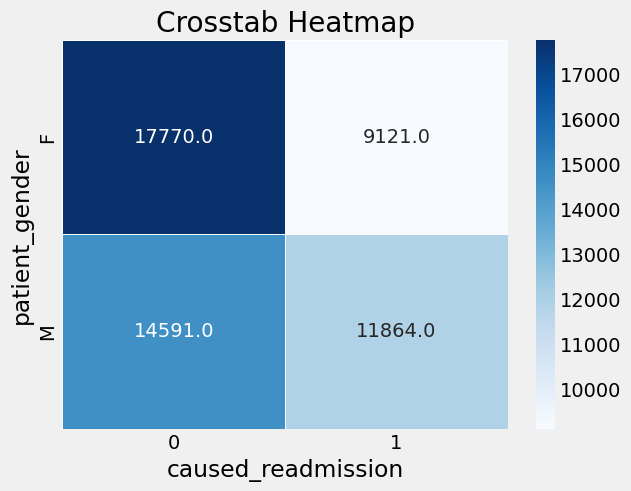

In [42]:
ct = pd.crosstab(data['patient_gender'],data['caused_readmission'])
P.plot_heatmap(ct)

**need to do a statistical test to see if there is any association between `patient_gender` and `caused_readmission`**

In [43]:
S.chi_sqared_test(pd.crosstab(data['patient_gender'],data['caused_readmission']))

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.112 → Moderate


**patient gender is showing moderate relationship with the readmission column**

***

**provider_gender**

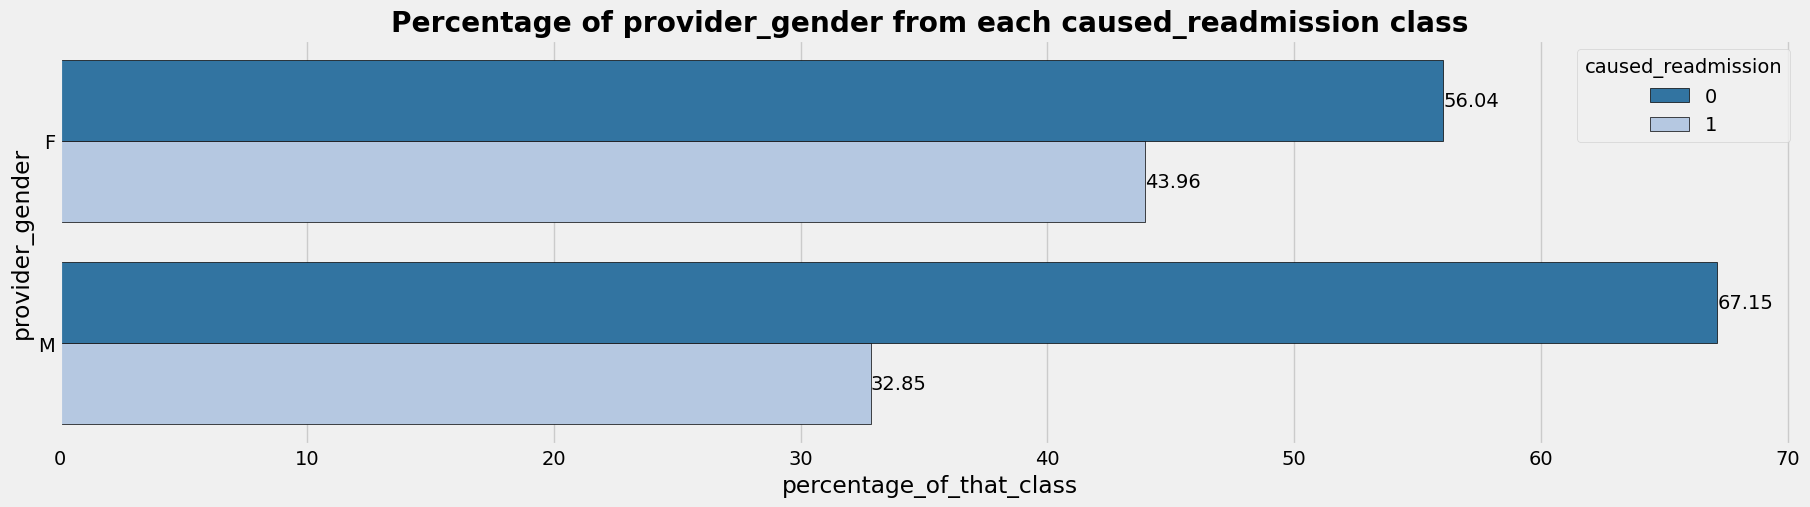

In [44]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='provider_gender',data=data,target='caused_readmission',orient='h')

**Provider gender female is showing a little high readmssion than male provider gender**

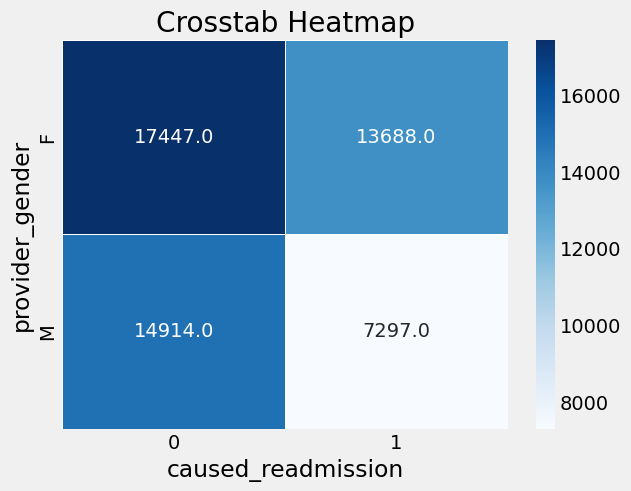

In [45]:
ct = pd.crosstab(data['provider_gender'],data['caused_readmission'])
P.plot_heatmap(ct)

**need to do a statistical test to see if there is any association between `provider_gender` and `caused_readmission`**

In [46]:
S.chi_sqared_test(pd.crosstab(data['provider_gender'],data['caused_readmission']))

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.112 → Moderate


**provider gender have moderate association on readmission**

***

**base_encounter_cost**

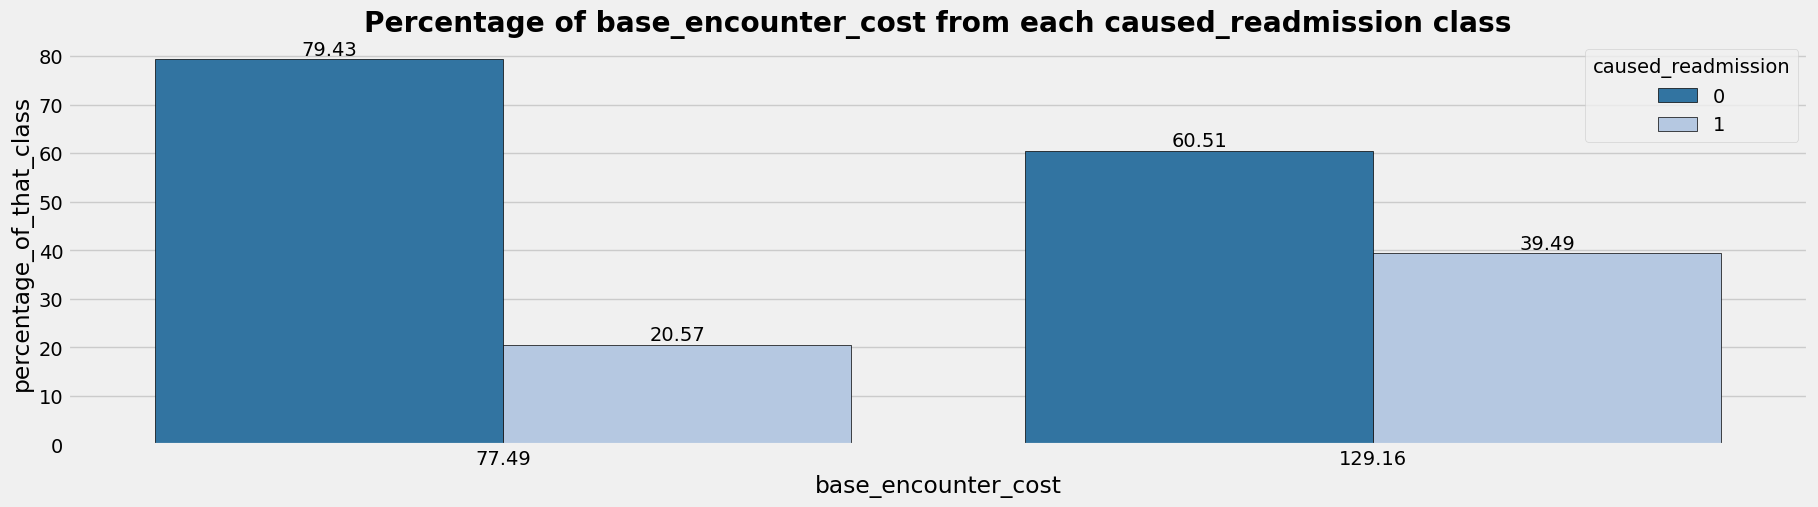

In [47]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='base_encounter_cost',data=data,target='caused_readmission',orient='v')

**base encounter cost 129 is showing relatively high percentage of caused readmission**

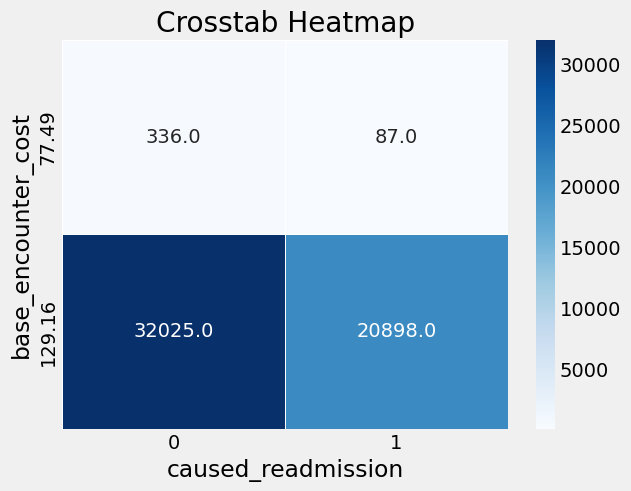

In [48]:
ct = pd.crosstab(data['base_encounter_cost'],data['caused_readmission'])
P.plot_heatmap(ct)

**need to do a statistical test to see if there is any association between `base_encounter_cost` and `caused_readmission`**

In [49]:
S.chi_sqared_test(pd.crosstab(data['base_encounter_cost'],data['caused_readmission']))

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.034 → Weak


**nothing specific found from base encounter cost, have very weak relationship with caused readmission column**

***

**reason_for_medications**

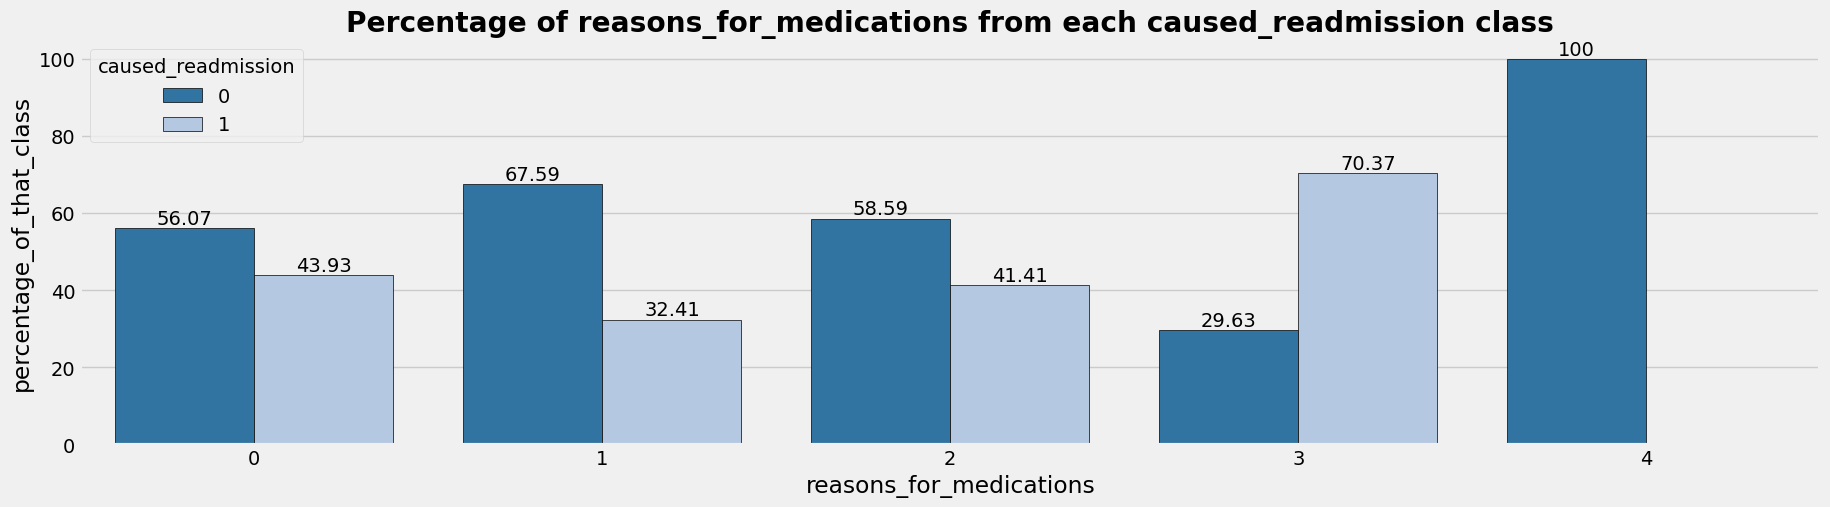

In [50]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='reasons_for_medications',data=data,target='caused_readmission',orient='v')

**medications reasons 3 is shwoing high percentage of readmission cause**

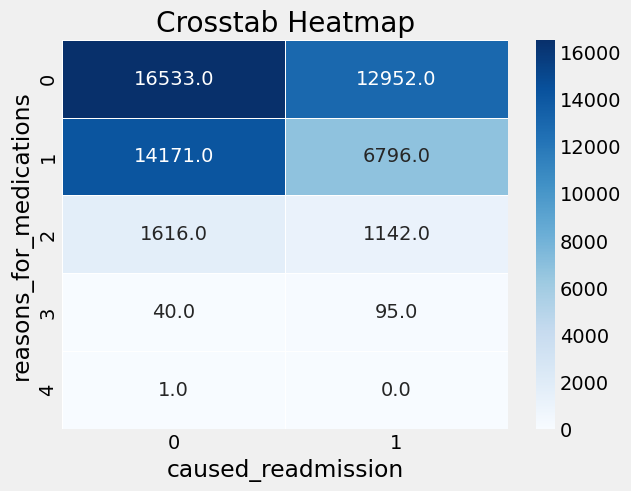

In [51]:
ct = pd.crosstab(data['reasons_for_medications'],data['caused_readmission'])
P.plot_heatmap(ct)

**need to do a statistical test to see if there is any association between `reasons_for_medications` and `caused_readmission`**

In [52]:
reason_for_medication_mask = (data['reasons_for_medications']==3)
ct = pd.crosstab(reason_for_medication_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.032 → Weak


**reason for medication class 3 have no significant impact on caused readmission**

***

**is_ongoing_condition**

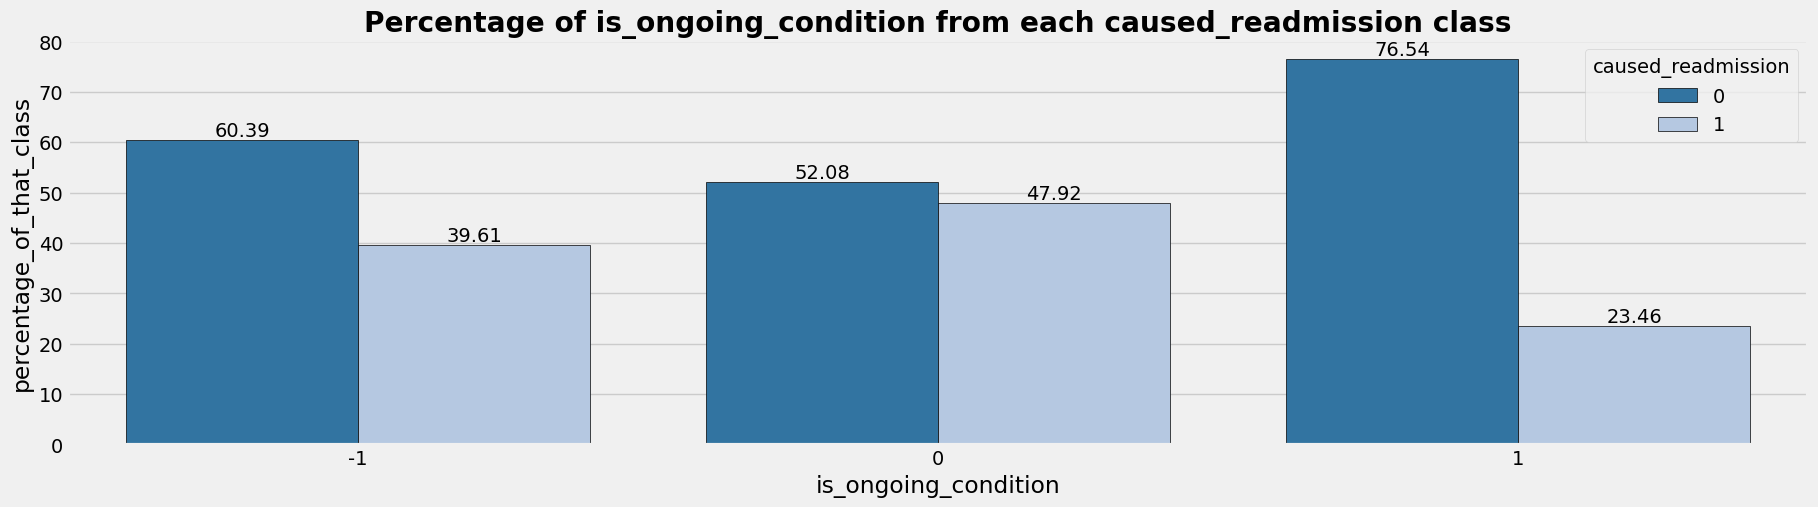

In [53]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='is_ongoing_condition',data=data,target='caused_readmission',orient='v')

**ongoing condition 0 is showing relatively high percentage of readmission**

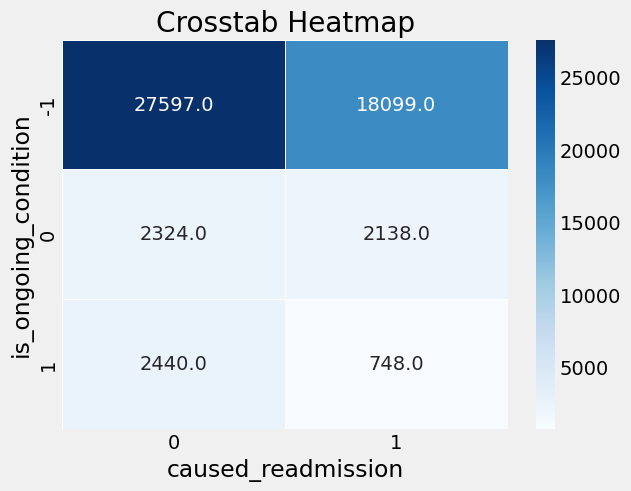

In [54]:
ct = pd.crosstab(data['is_ongoing_condition'],data['caused_readmission'])
P.plot_heatmap(ct)

**need to do a statistical test to see if there is any association between `is_ongoing_condition` and `caused_readmission`**

In [55]:
is_ongoing_condition_mask = (data['is_ongoing_condition']==0)
ct = pd.crosstab(is_ongoing_condition_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.053 → Weak


**we dont see any thing specific, both columns have very weak relationship**

***

**is_ongoing_careplan**

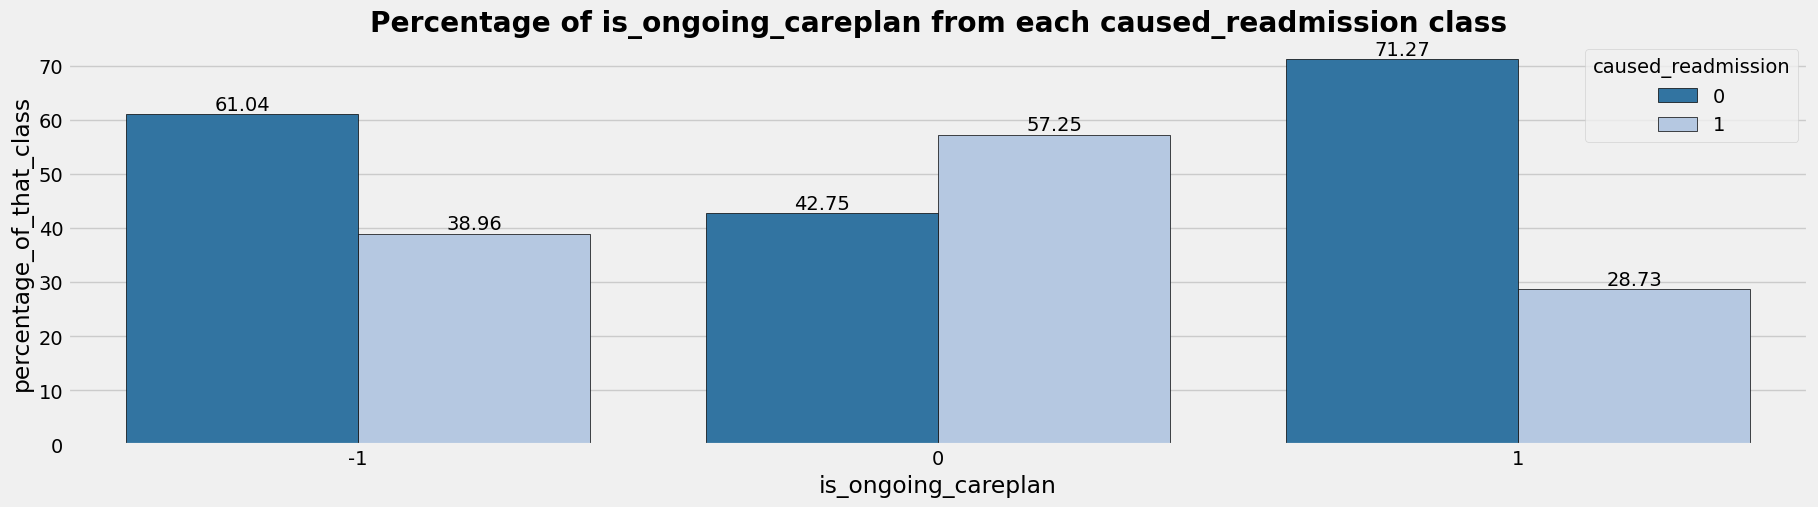

In [56]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='is_ongoing_careplan',data=data,target='caused_readmission',orient='v')

**ongoing careplan 0 is showing high percentage of readmission relative to others**

**need to do a statistical test to see if there is any association between `is_ongoing_careplan` and `caused_readmission`**

In [57]:
ongoing_careplan_mask = (data['is_ongoing_careplan']==0)
ct = pd.crosstab(ongoing_careplan_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.071 → Weak


**ongoing careplan have weak relationship with the caused readmission column**

***

**total_careplans**

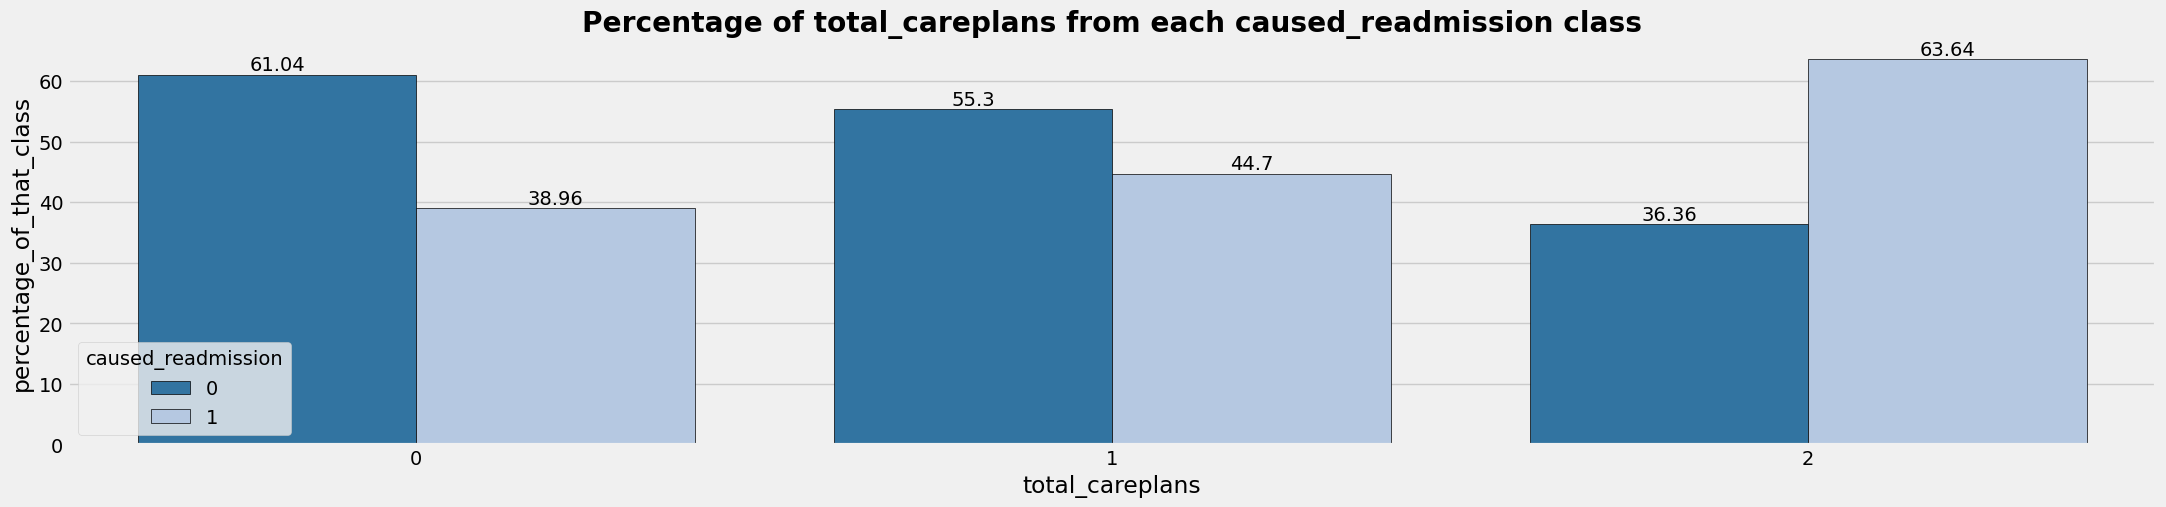

In [58]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='total_careplans',data=data,target='caused_readmission',orient='v')

**total careplan 2 is showing high percentage of readmission**

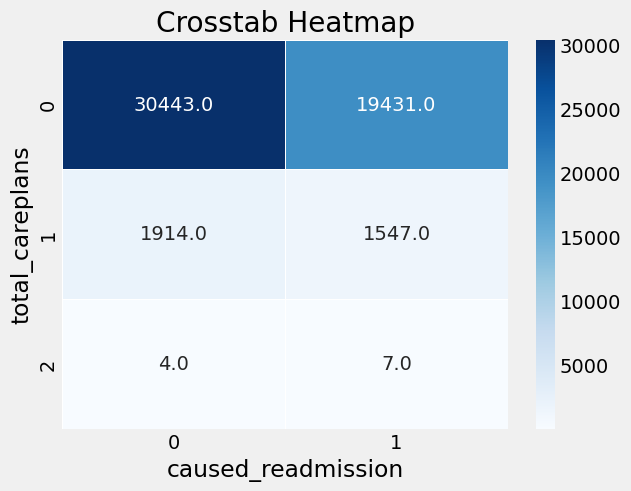

In [59]:
ct = pd.crosstab(data['total_careplans'],data['caused_readmission'])
P.plot_heatmap(ct)

**need to do a statistical test to see if there is any association between `total_careplans` and `caused_readmission`**

In [60]:
total_careplan_mask = (data['total_careplans']==1)
ct = pd.crosstab(total_careplan_mask,data['caused_readmission'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.029 → Weak


**there is very weak associatation**

***

### **Numerical Columns with target**

In [61]:
large_num_cols

['avg_procedure_cost',
 'avg_base_medicine_cost',
 'avg_total_medicine_cost',
 'age_as_2022',
 'utilization',
 'condition_duration',
 'careplan_duration']

***

**avg_procedure_cost**

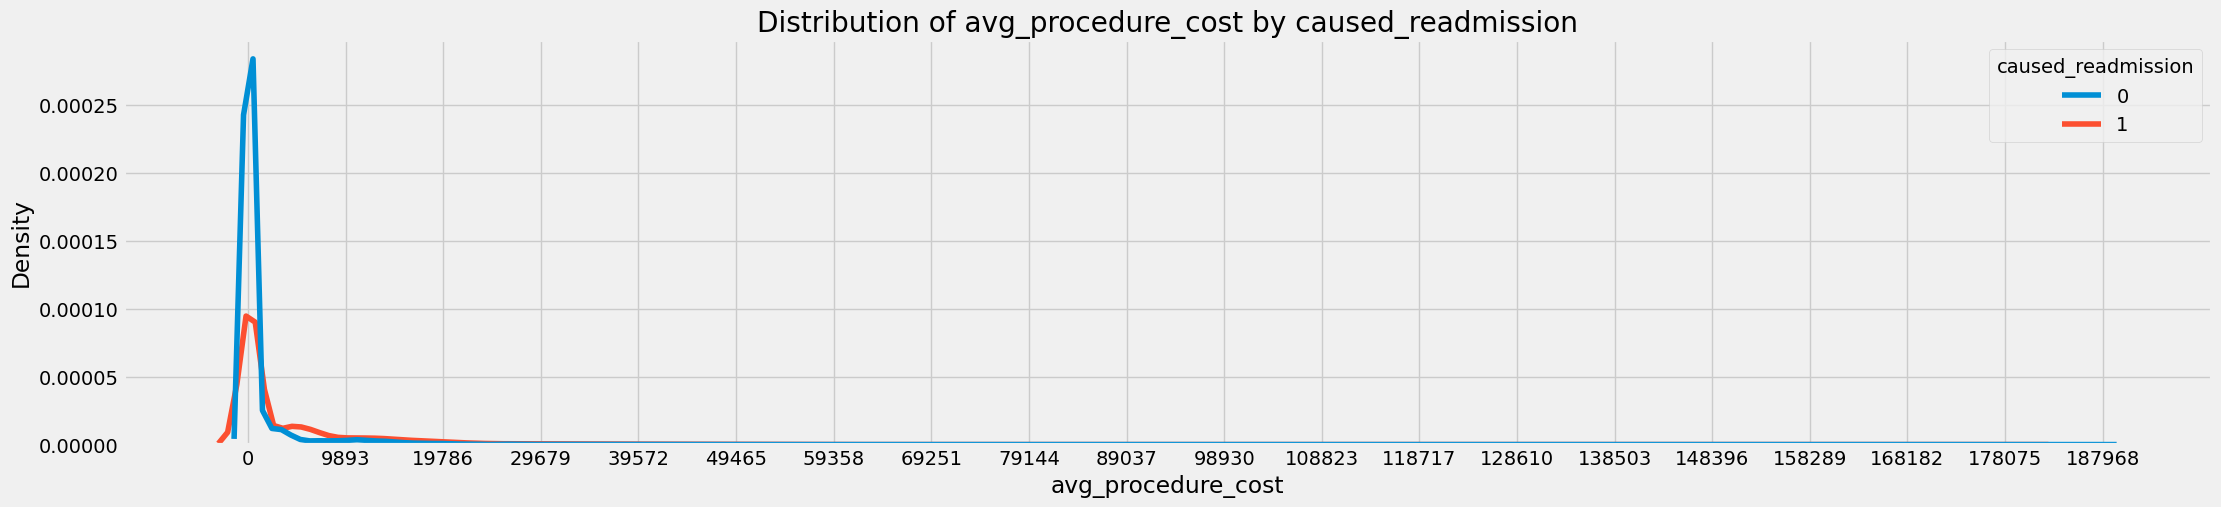

In [62]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='avg_procedure_cost',data= data,target='caused_readmission')

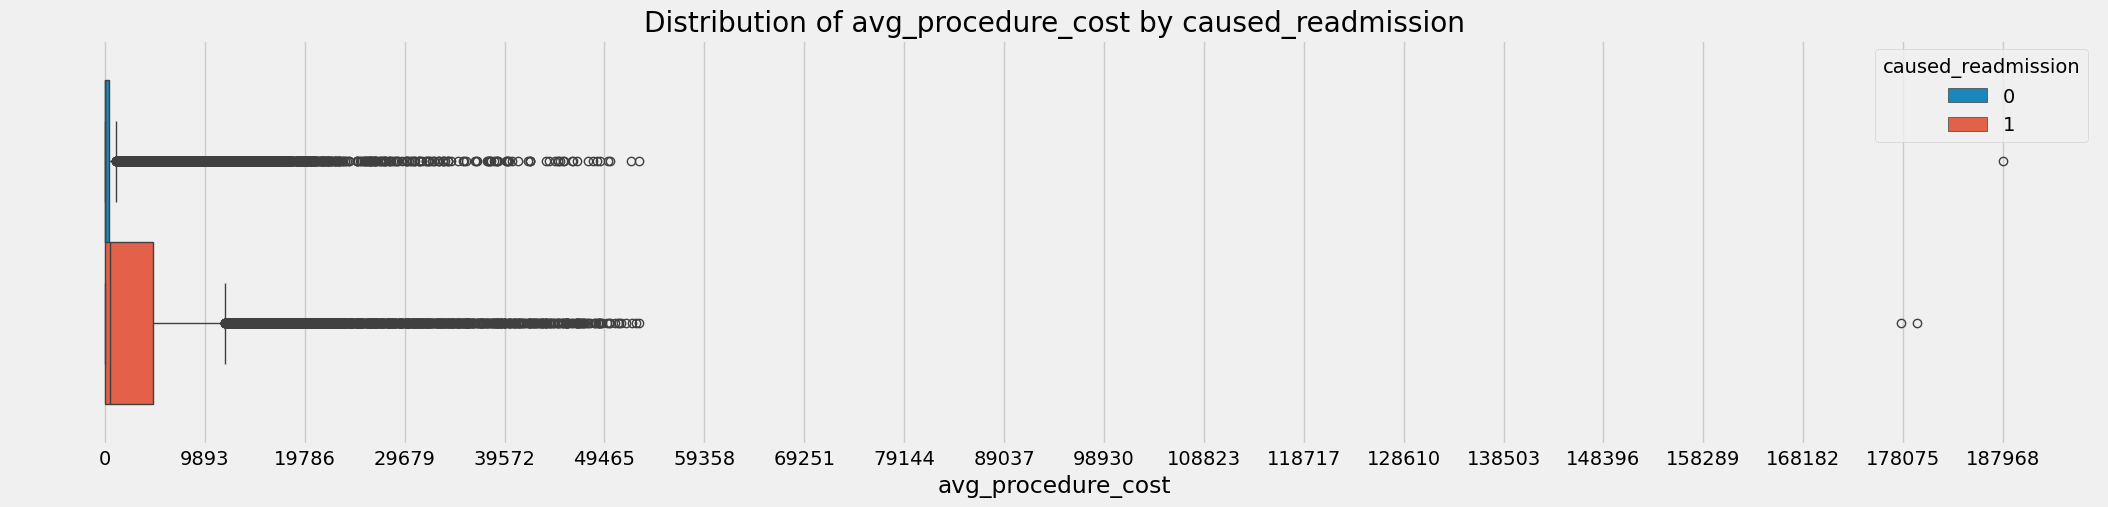

In [63]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='avg_procedure_cost',data= data,target='caused_readmission')

In [64]:
data.groupby('caused_readmission')['avg_procedure_cost'].mean().round(2)

caused_readmission
0    1078.99
1    3749.38
Name: avg_procedure_cost, dtype: float64

**avg procedure cost is showing high average for readmission cause**

In [65]:
first = data[data['caused_readmission'] == 1]['avg_procedure_cost']
second = data[data['caused_readmission'] == 0]['avg_procedure_cost']

S.is_var_same(first,second)

AttributeError: module 'src.stat_tests' has no attribute 'is_var_same'

In [ ]:
S.ttest(first=first,second= second,equal_variance=False)

T-test p-value: 0.00000 → Reject null (groups different)


**groups are different in avg_procedure cost**

***

**avg_base_medicine_cost**

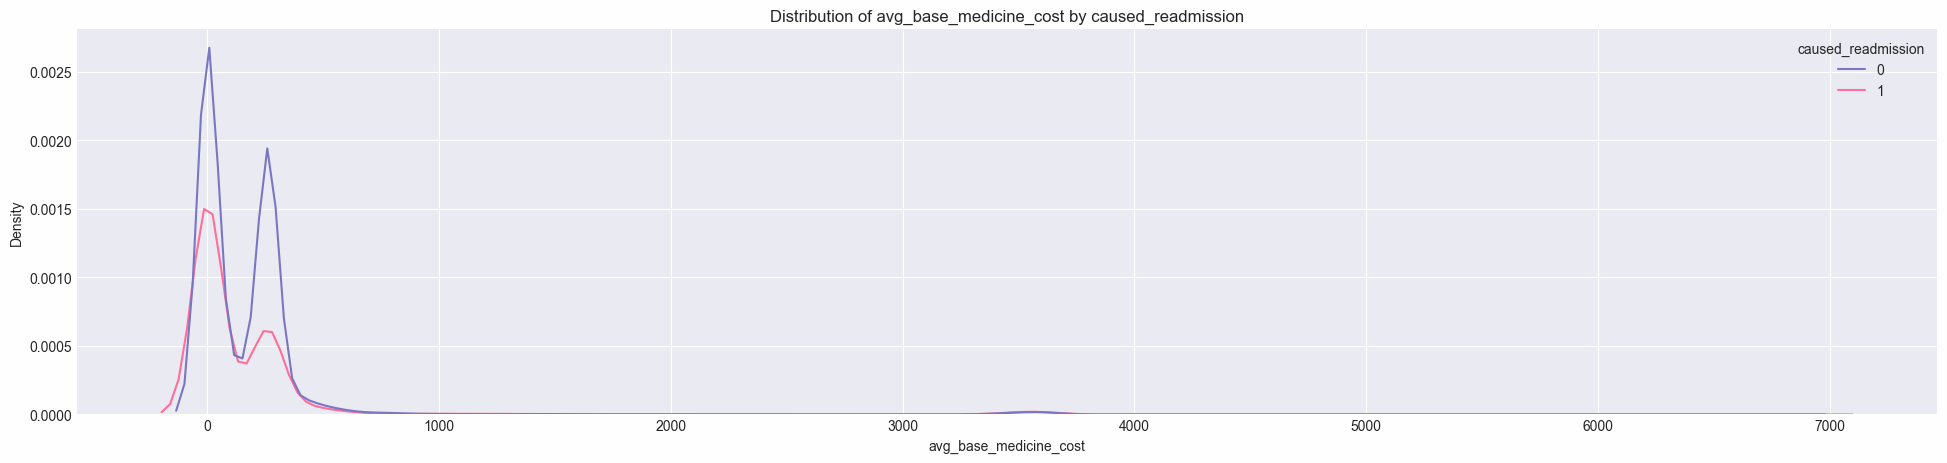

In [ ]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='avg_base_medicine_cost',data= data,target='caused_readmission')

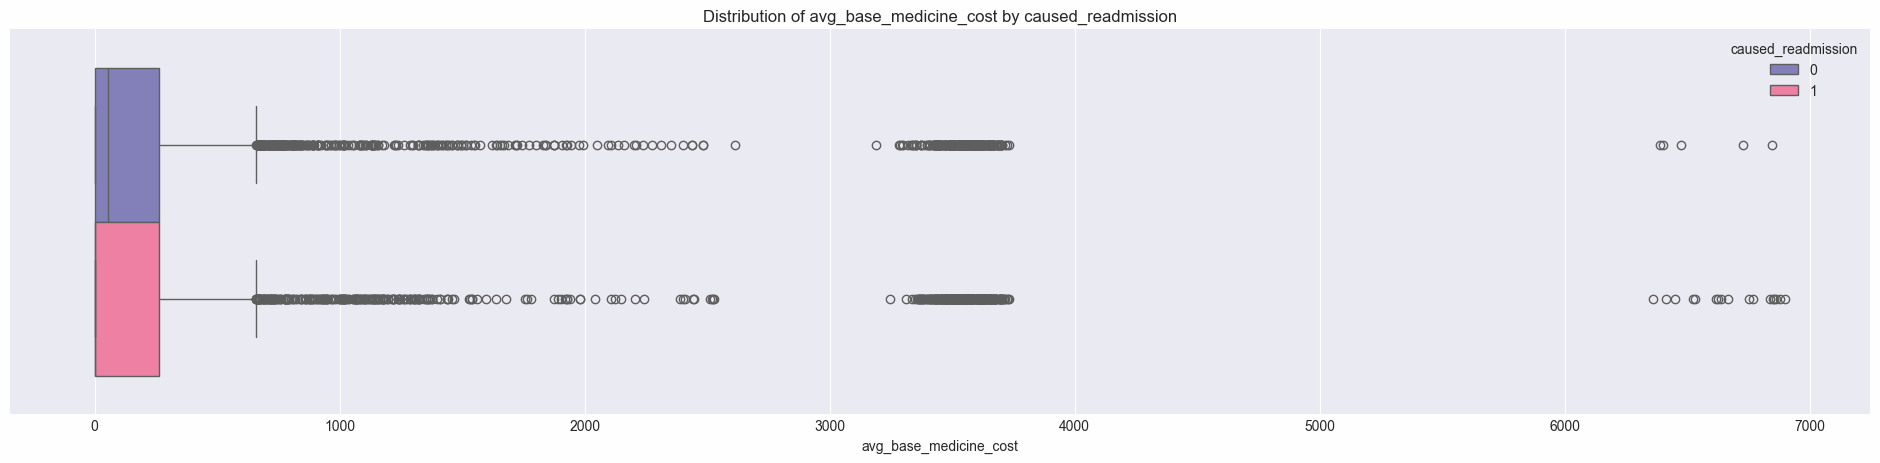

In [ ]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='avg_base_medicine_cost',data= data,target='caused_readmission')

In [ ]:
data.groupby('caused_readmission')['avg_base_medicine_cost'].mean().round(2)

caused_readmission
0    164.64
1    159.46
Name: avg_base_medicine_cost, dtype: float64

**we do not see any specific pattern**

***

**avg_total_medicine_cost**

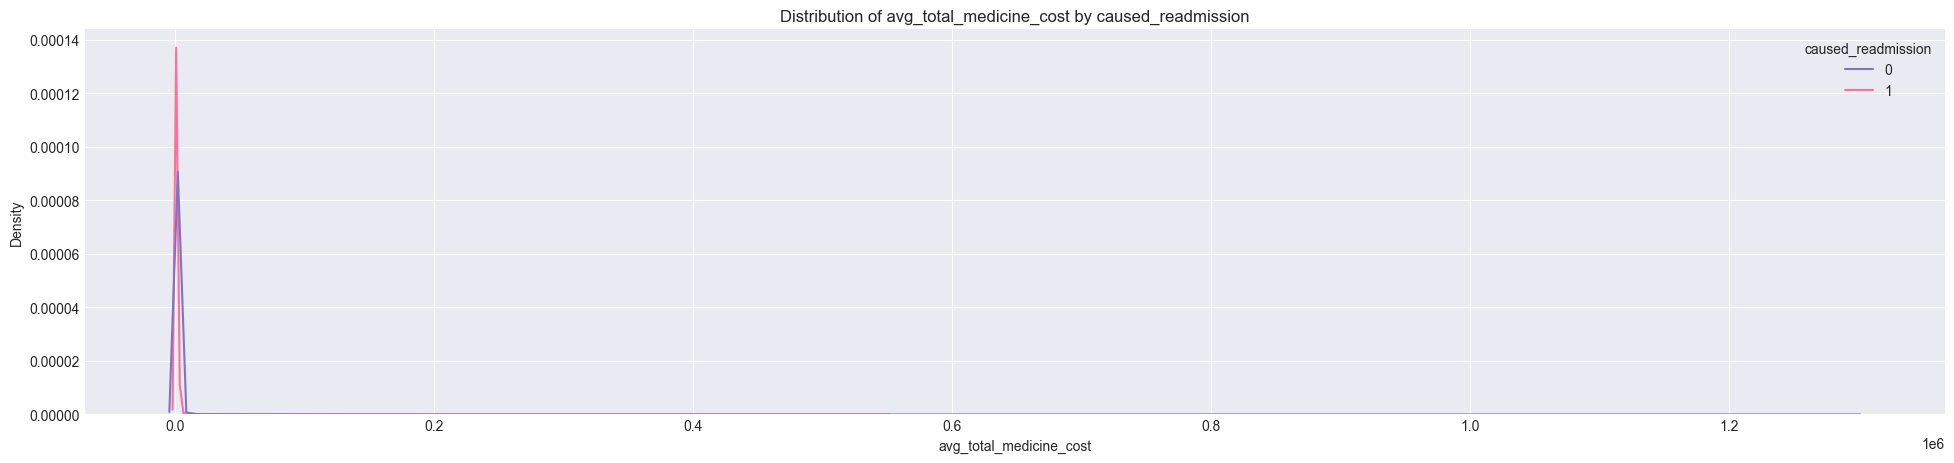

In [ ]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='avg_total_medicine_cost',data= data,target='caused_readmission')

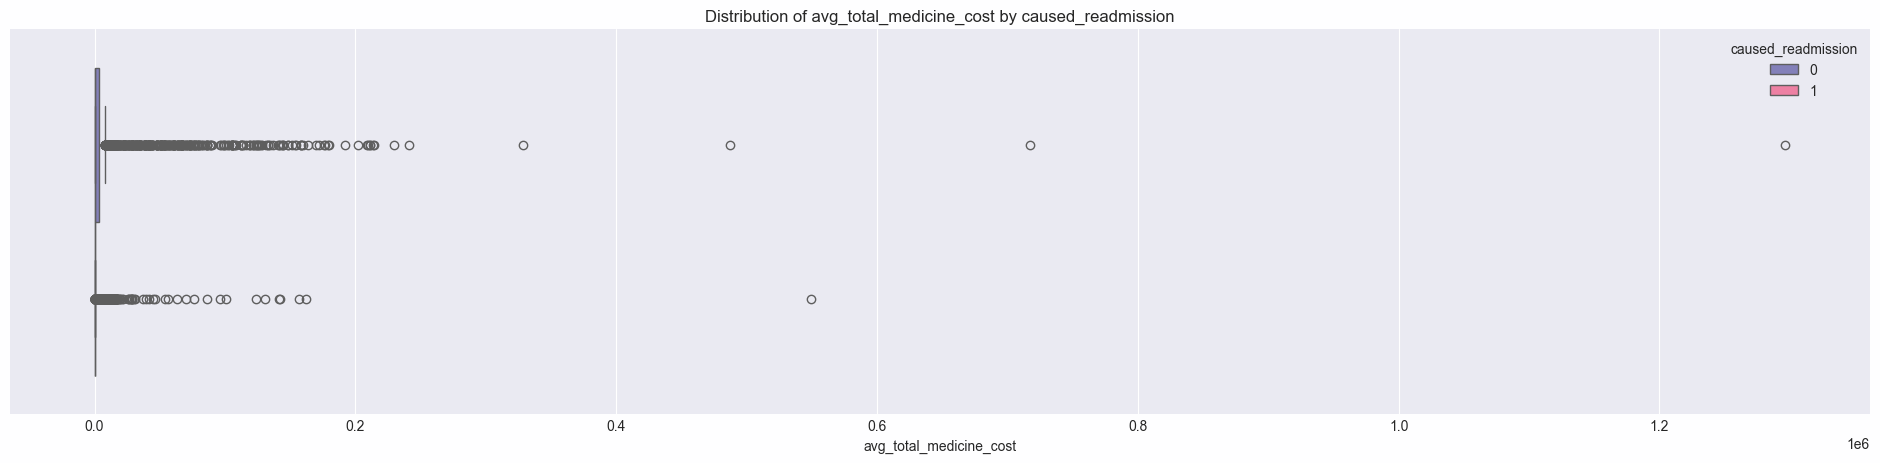

In [ ]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='avg_total_medicine_cost',data= data,target='caused_readmission')

In [ ]:
data.groupby('caused_readmission')['avg_total_medicine_cost'].mean().round(2)

caused_readmission
0    2021.88
1     521.54
Name: avg_total_medicine_cost, dtype: float64

In [ ]:
first = data[data['caused_readmission'] == 1]['avg_total_medicine_cost']
second = data[data['caused_readmission'] == 0]['avg_total_medicine_cost']

S.is_var_same(first_series=first,second_series=second)

Levene p-value: 0.00000 → Not equal variance


In [ ]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


**groups are different**

***

**age_as_2022**

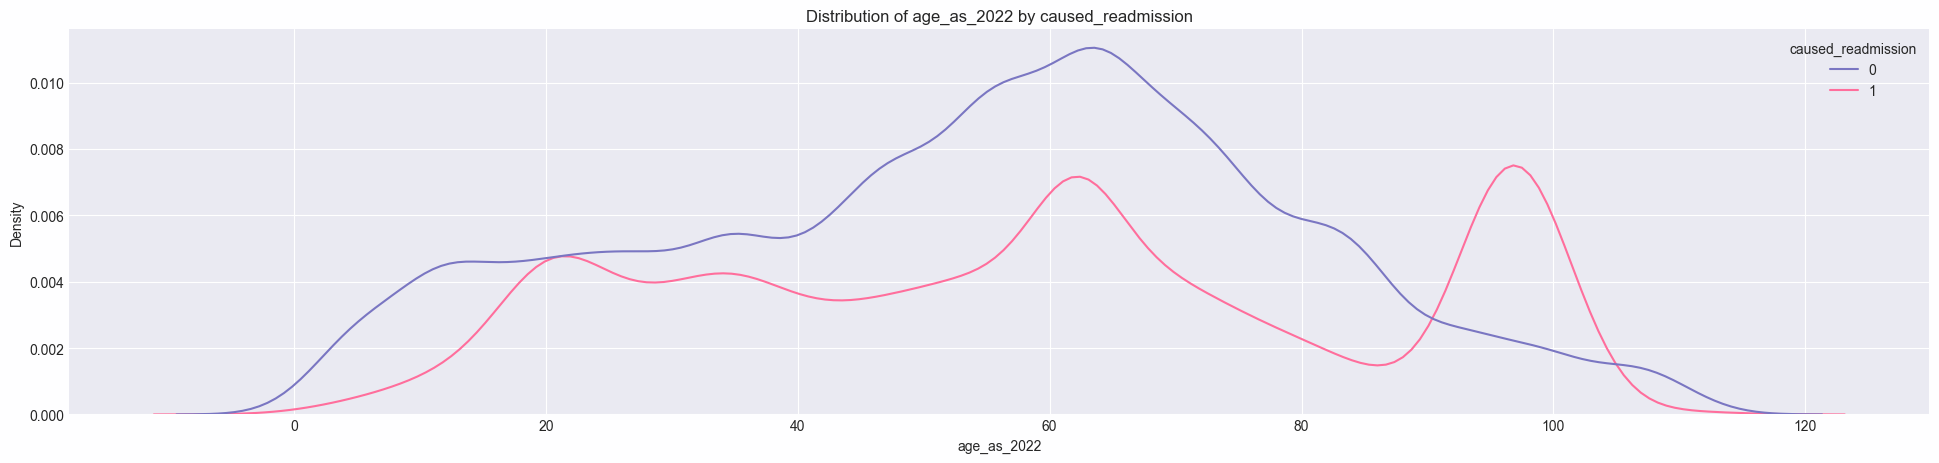

In [ ]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='age_as_2022',data= data,target='caused_readmission')

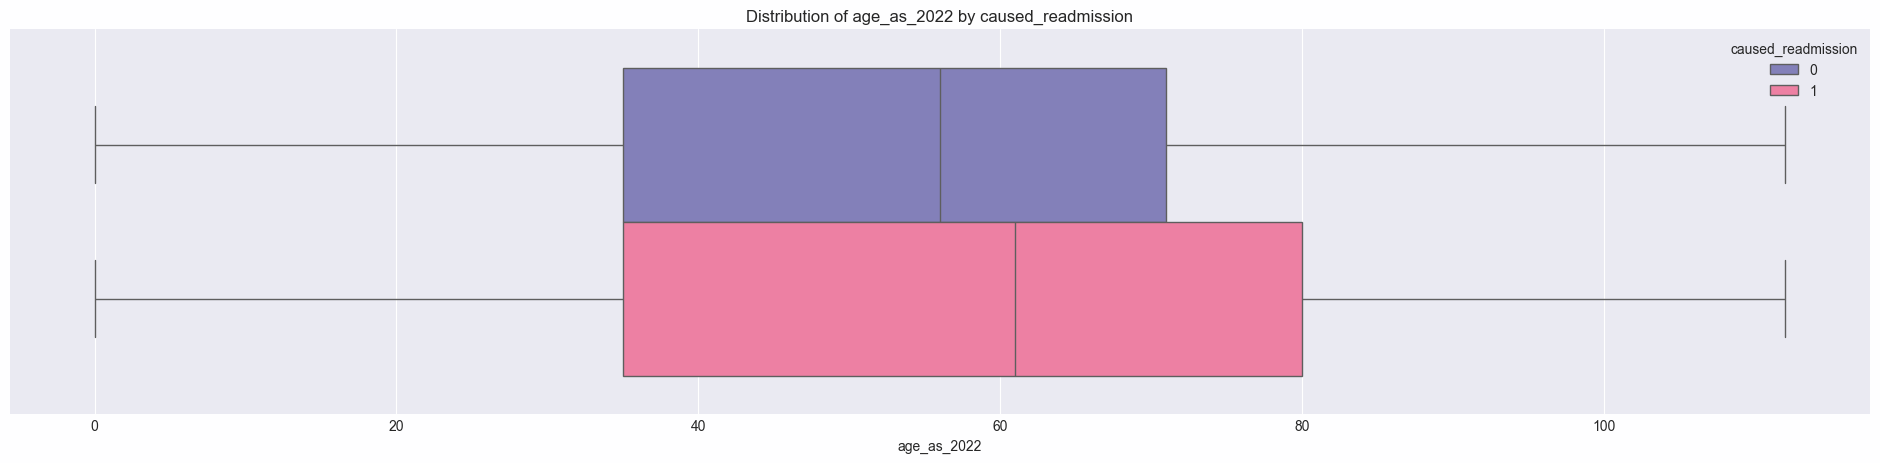

In [ ]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='age_as_2022',data= data,target='caused_readmission')

In [ ]:
data.groupby('caused_readmission')['age_as_2022'].mean().round(2)

caused_readmission
0    53.89
1    58.38
Name: age_as_2022, dtype: float64

In [ ]:
first = data[data['caused_readmission'] == 1]['age_as_2022']
second = data[data['caused_readmission'] == 0]['age_as_2022']

S.is_var_same(first,second)

Levene p-value: 0.00000 → Not equal variance


In [ ]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


**we see difference in those classes**

***

**utilization**

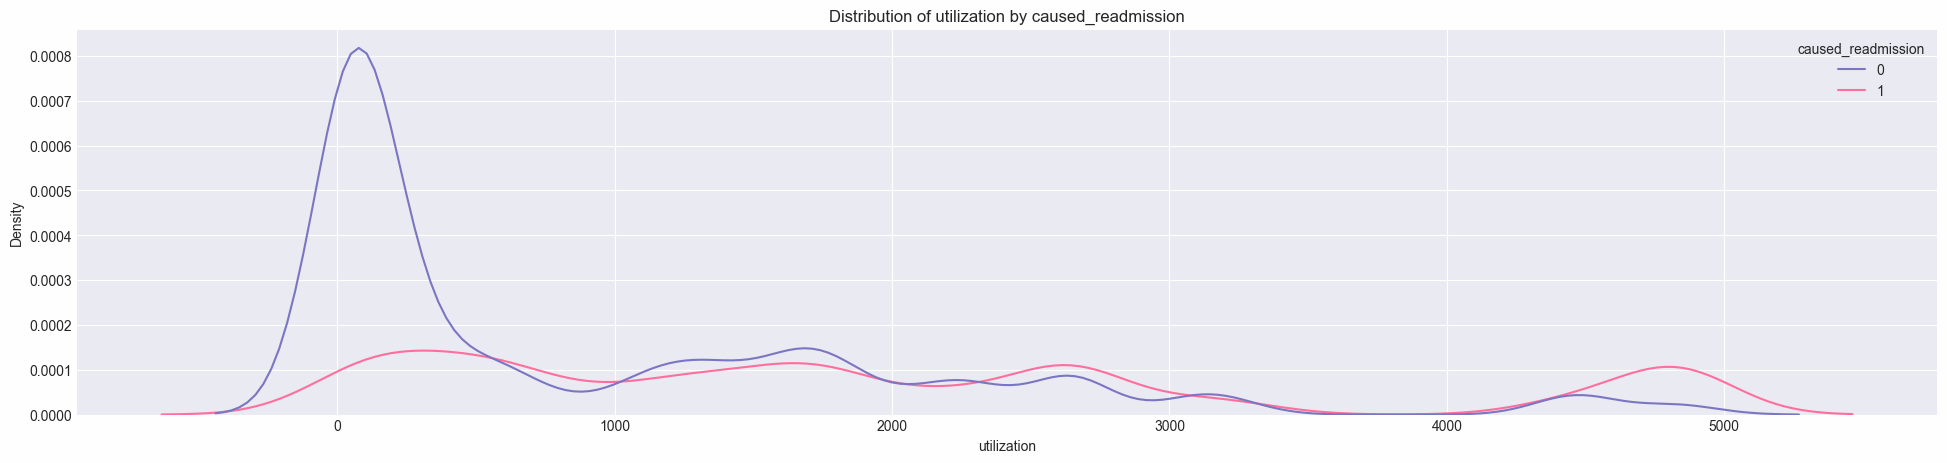

In [ ]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='utilization',data= data,target='caused_readmission')

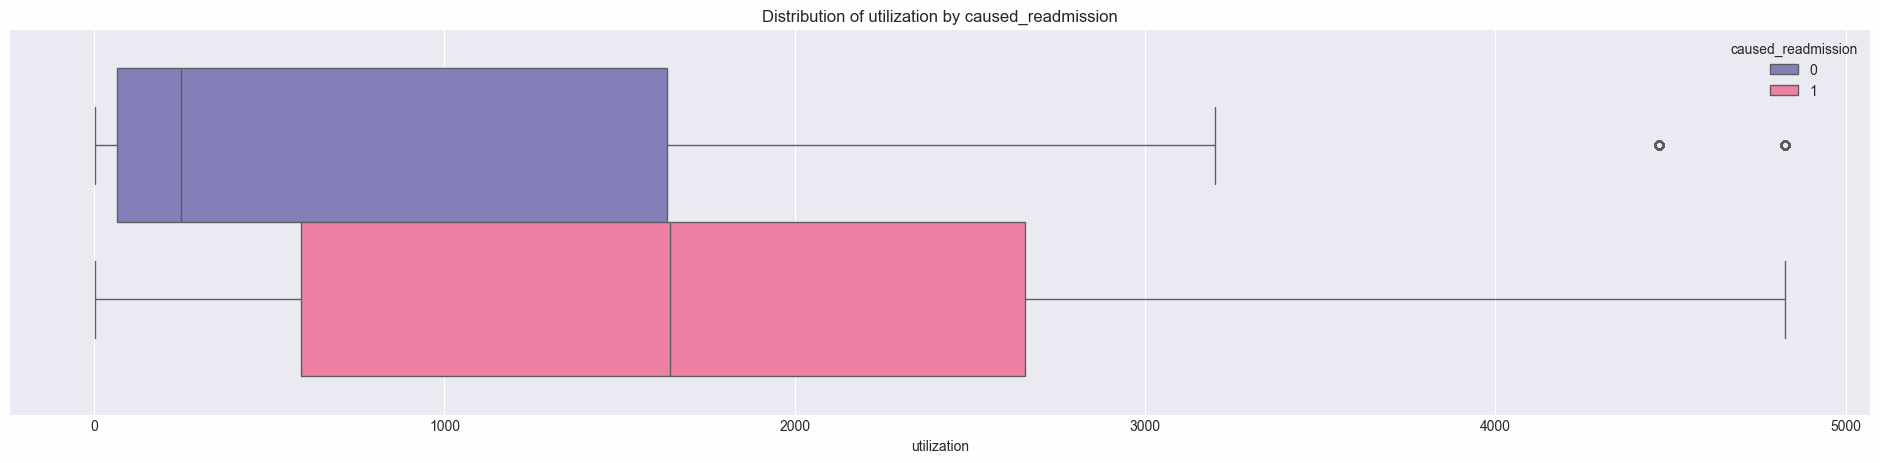

In [ ]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='utilization',data= data,target='caused_readmission')

In [ ]:
data.groupby('caused_readmission')['utilization'].mean().round(2)

caused_readmission
0     917.01
1    1966.10
Name: utilization, dtype: float64

In [ ]:
first = data[data['caused_readmission'] == 1]['utilization']
second = data[data['caused_readmission'] == 0]['utilization']

S.is_var_same(first,second)

Levene p-value: 0.00000 → Not equal variance


In [ ]:
S.ttest(first,second,False)

T-test p-value: 0.00000 → Reject null (groups different)


**groups are different**

***

**condition_duration**

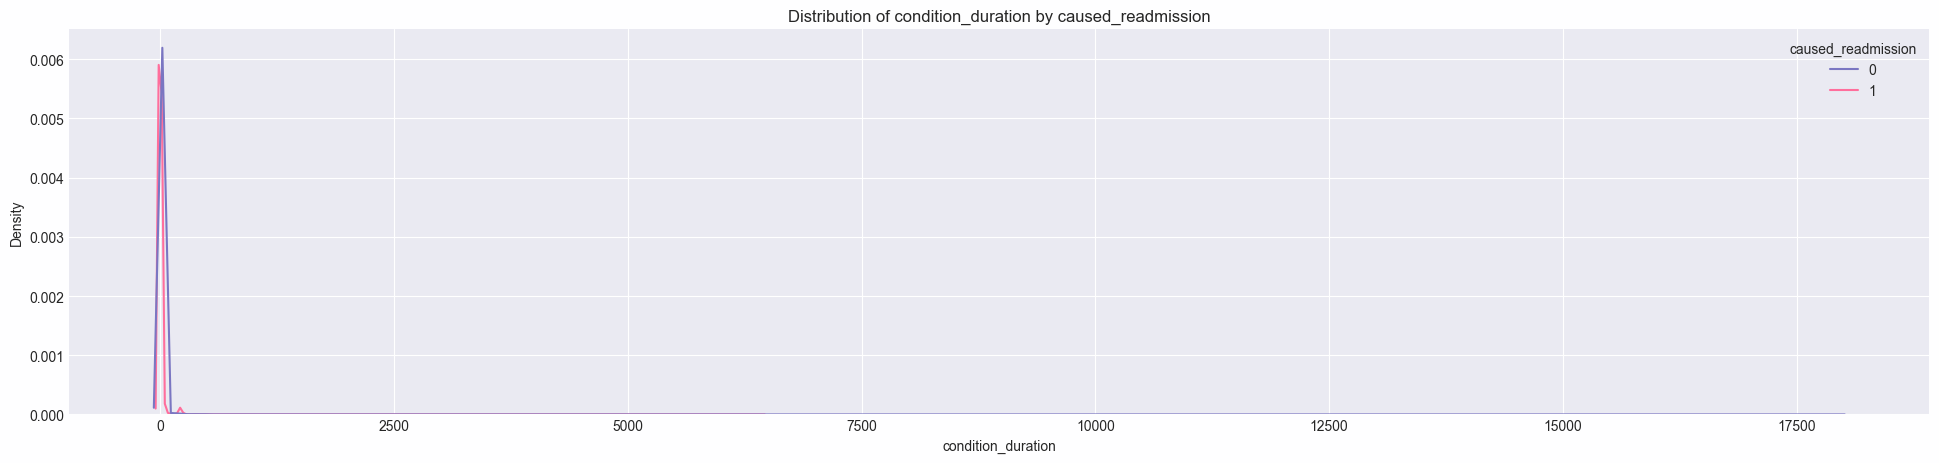

In [ ]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='condition_duration',data= data,target='caused_readmission')

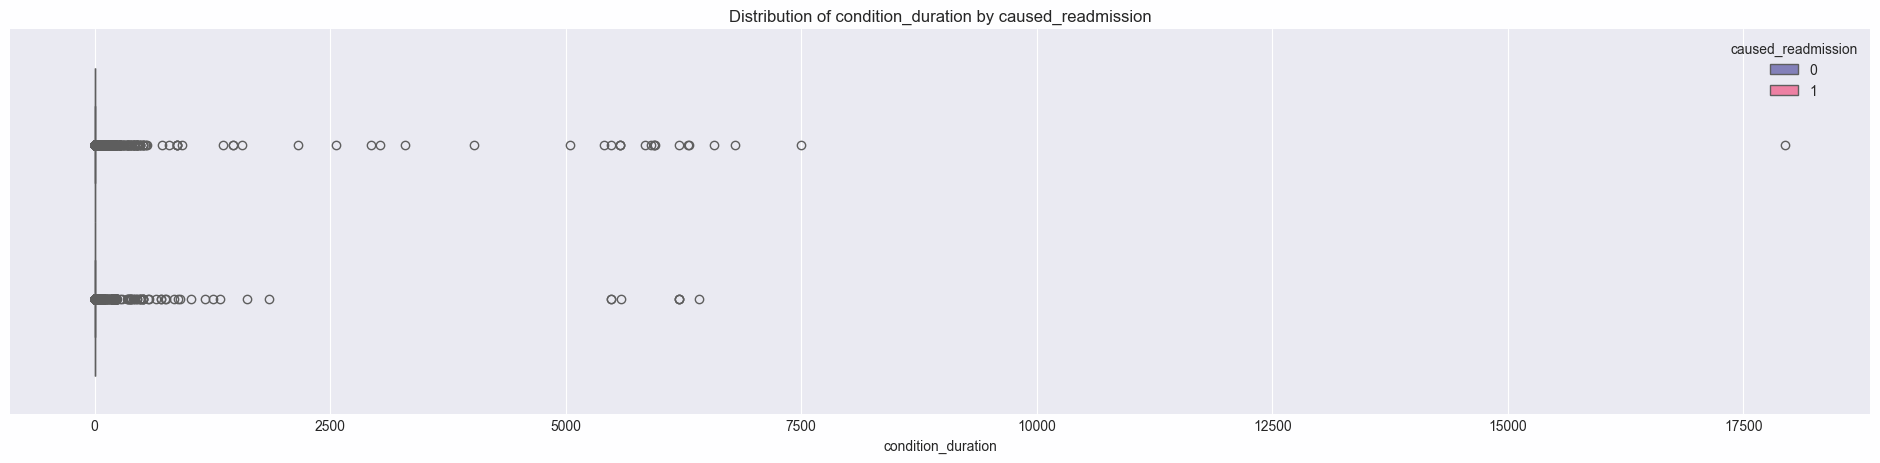

In [ ]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='condition_duration',data= data,target='caused_readmission')

In [ ]:
data.groupby('caused_readmission')['condition_duration'].mean().round(2)

caused_readmission
0    7.28
1    7.74
Name: condition_duration, dtype: Float64

**nothing specific found**

***

**careplan_duration**

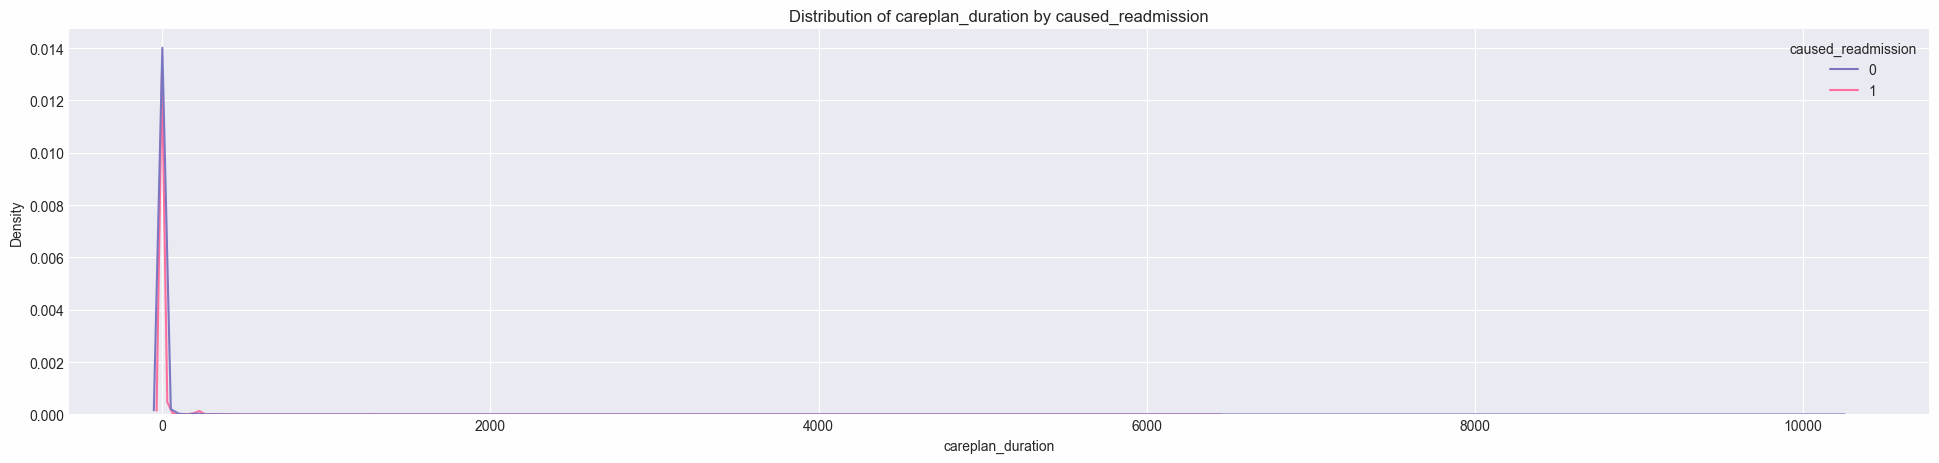

In [ ]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='careplan_duration',data= data,target='caused_readmission')

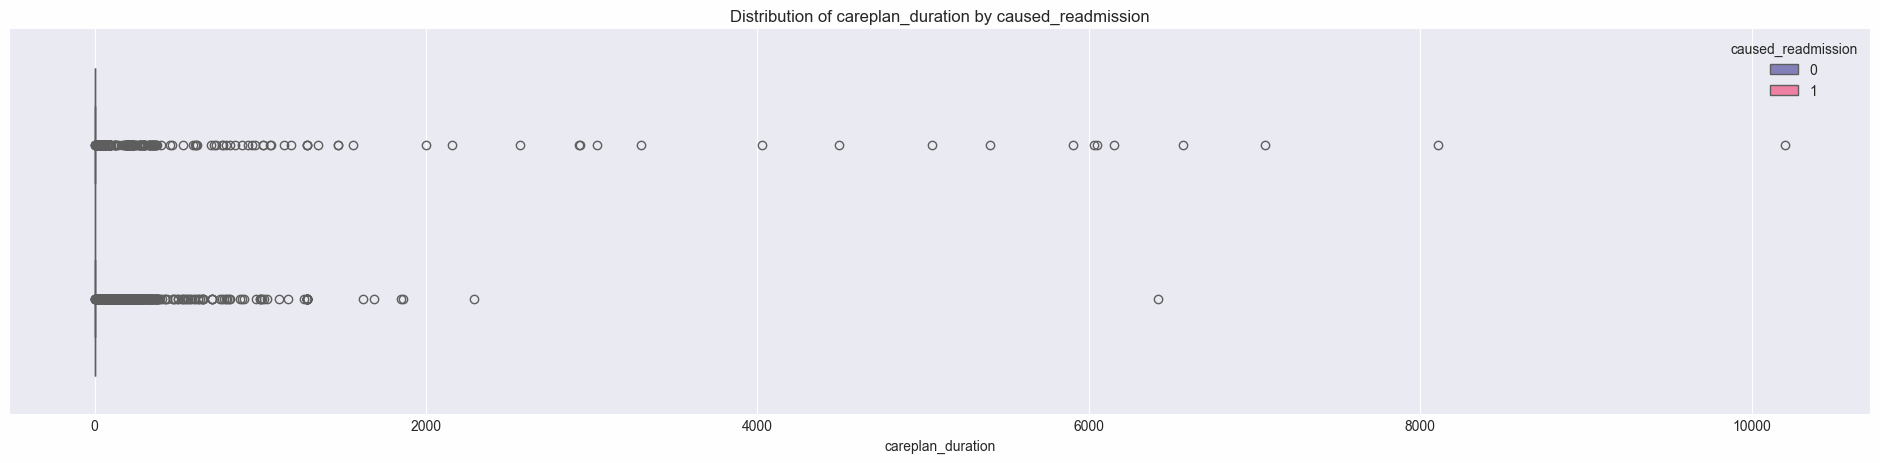

In [ ]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='careplan_duration',data= data,target='caused_readmission')

In [ ]:
data.groupby('caused_readmission')['careplan_duration'].mean().round(2)

caused_readmission
0     5.5
1    9.49
Name: careplan_duration, dtype: Float64

In [ ]:
first = data[data['caused_readmission'] == 1]['careplan_duration']
second = data[data['caused_readmission'] == 0]['careplan_duration']

S.is_var_same(first,second)

Levene p-value: 0.00013 → Not equal variance


In [ ]:
S.ttest(first,second,False)

T-test p-value: 0.00002 → Reject null (groups different)


**nothing too specific, but groups are different**

### ***Findings from bivariate analysis with causes_readmisson column***

- ***`urgentcare` and `ambulatory` class showed a high percentage of readmission, after doing statistical test, we can validate that patients of these classes are more likely to cause readmission more***

- ***`single` marital class showed a high percentage of readmission, after doing statistical test wen can validate that marital class single have a moderate impact on readmission,with single marital being cause for readmission more than other marital classes***

- ***`BLACK` and `NATIVE` classes in `race` column showed a littile more percentage in readmission class, after doing statistical test, we can validate that race has a moderate relationship with readmission, andthese 2 classes are more likely to cause readmission***

- ***`MALE` `patient_gender` showed a little more in readmission class, after doing statistical test, we can validate that patient_gender male have more chance of causing readmisssion than female***

- ***`FEMALE` `provider_gender` showed a little high readmission, after doing statistical test, we can validate that female provider in encounter leads to slighly high readmission***

- ***`avg_procedure_cost` showed high mean for causing readmission...after doing statistical test we can validate that encuonter with high average procedure cost is more likely to cause readmission***

- ***`avg_total_medicine_cost` showed low average for causing readmission case, afte doing statistical test we can validate that lower the `avg_total_medicine_cost` leads to cause readmission***

- ***`age` column showed, for high aged people there is more chance of causing readmission than lower aged people***

- ***`utilization` column showed very low mean for non readmitted patients, after doing statistical test we validate these fact..so assumption is less experienced doctors are doing less readmission than more advantage, possible cause can be high severity disease are more handeled by experienced doctors***